In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Downloading Dependencies

In [1]:


!pip install --upgrade tensorflow
!pip list

!pip install deepface
!pip install mediapipe

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.8.5
aiosignal                        1.3.1
alabaster                        0.7.13
albumentations                   1.3.1
altair                           4.2.2
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array-record                     0.4.1
arviz                            0.15.1
astropy                          5.3.2
astunparse                       1.6.3
async-timeout                    4.0.3
attrs                            23.1.0
audioread                        3.0.0
autograd                         1.6.2
Babel                            2.12.1
backcall                         0.2.0
beautifulsoup4                   4.11.2
bleach                           6.0.0
blinker                          1.4
bl

## Importing Packages/Libraries

In [2]:

from deepface import DeepFace
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import shutil

import pickle
import mediapipe as mp
import glob
from deepface import DeepFace
from collections import defaultdict

import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import confusion_matrix

from tensorflow import keras
from tensorflow.keras import layers


Directory  /root /.deepface created
Directory  /root /.deepface/weights created


In [ ]:
# !unzip "/content/drive/MyDrive/Dissertation/zips/frames_1001_1010.zip" -d "/content/drive/MyDrive/Dissertation/zips/cropped_zips/"  # folder name changed to extracted_zips, so change it next time when extracting the zips


# Extracting frames from all the videos in Jupyter notebook

In [ ]:


video_folder = "D:/ESSEX_STUDY/Dissertation/cremaD/CREMA-D/VideoFlash"
output_folder = "D:/ESSEX_STUDY/Dissertation/cremaD/CREMA-D/OutputImages"

try:
    .
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
except OSError:
    print('Error: Creating directory of data')

# Iterating over the videos in the video dataset folder
for filename in os.listdir(video_folder):
    if filename.endswith(".flv"):
        video_path = os.path.join(video_folder, filename)
        video_name = os.path.splitext(filename)[0]

        # Make a new folder for each video.
        video_output_folder = os.path.join(output_folder, video_name)
        if not os.path.exists(video_output_folder):
            os.makedirs(video_output_folder)

        # Reading the video
        vid = cv2.VideoCapture(video_path)

        # initialising the Frame counter to 0
        current_frame = 0

        # Extracting the per milisecond frames from the video at 30fps
        while True:
            success, frame = vid.read()

            if success:
                # Create an image file name

                image_name = f'frame{current_frame}.jpg'
                image_path = os.path.join(video_output_folder, image_name)
                print('Creating...' + image_path)

                # Saving the extracted image
                cv2.imwrite(image_path, frame)

                # Increasing the frame counter
                current_frame += 1
            else:
                break

        # Releasing the video object
        vid.release()

# Destroying all windows once done
cv2.destroyAllWindows()


Zipped the above extracted videos and uploaded on google colab and unzipped

In [ ]:
!unzip "/content/drive/MyDrive/Dissertation/zips/frames_1011_1030.zip" -d "/content/drive/MyDrive/Dissertation/zips/extracted_zips/"


# Taking 4000 images of each emotion and Re-labeling using deepface

In [ ]:

#Data and destination directory path
data_dir = "/content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/"
destination_dir = "/content/drive/MyDrive/Dissertation/zips/cropped_zips1/"

# labeling emotion names to emotion folders
emotions = {
    "happy": "HAP",
    "sad": "SAD",
    "neutral": "NEU",
    "fear": "FEA",
    "angry": "ANG",
    "disgust": "DIS",
    "surprise": "SUR"
}

for emotion_name, folder_name in emotions.items():
    emotion_folder_path = os.path.join(destination_dir, folder_name)
    if not os.path.exists(emotion_folder_path):
        os.makedirs(emotion_folder_path)

#total number of emotions to be collected
Total_data_counter = 4000
global_counter = defaultdict(int)    # Counter to keep track of how many photos were gathered for each emotion.



global_counter = {
  "happy" : 0,
  "sad" : 0,
  "neutral" : 0,
  "fear" : 0,
  "angry" : 0,
  "disgust" : 0,
  "surprise" : 0,
}

#function for saving images to emotion-related folders.

def save_image_based_on_emotion(image_path):
    emotion_result = DeepFace.analyze(img_path=image_path, actions=['emotion'], enforce_detection=False)
    emotion = emotion_result[0]['dominant_emotion']

    if emotion in emotions:
        destination_folder = emotions[emotion]
        if global_counter[emotion] > Total_data_counter:
            return
        final_img_name = "frame_" + str(global_counter[emotion]+1) + ".jpg"
        destination_path = os.path.join(destination_dir, destination_folder, final_img_name)

        # Simply copy the image to the destination based on emotion
        os.system(f"cp '{image_path}' '{destination_path}'")

        global_counter[emotion] += 1
        print(f"Copied {image_path} to {destination_path}")
        print(global_counter)

for folder_name in os.listdir(data_dir):
    folder_path = os.path.join(data_dir, folder_name)
    if not os.path.isdir(folder_path):
        continue
    for file_name in os.listdir(folder_path):
        if not file_name.startswith("frame"):
            continue
        image_path = os.path.join(folder_path, file_name)
        save_image_based_on_emotion(image_path)
        if all(value > 49 for value in global_counter.values()):
            break

print(global_counter)

facial_expression_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facial_expression_model_weights.h5
To: /root/.deepface/weights/facial_expression_model_weights.h5
100%|██████████| 5.98M/5.98M [00:00<00:00, 26.6MB/s]
Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  2.08it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_ITS_DIS_XX/frame39.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2007.jpg
{'angry': 2007}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.42it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_ITS_DIS_XX/frame42.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2008.jpg
{'angry': 2008}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 15.42it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_ITS_DIS_XX/frame37.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2009.jpg
{'angry': 2009}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.75it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_ITS_NEU_XX/frame45.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2010.jpg
{'angry': 2010}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.28it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_ITS_NEU_XX/frame37.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2011.jpg
{'angry': 2011}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.52it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_ITS_NEU_XX/frame72.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2012.jpg
{'angry': 2012}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.78it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_ITS_NEU_XX/frame75.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2013.jpg
{'angry': 2013}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 15.82it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_ITS_NEU_XX/frame42.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2014.jpg
{'angry': 2014}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.15it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_ITS_NEU_XX/frame83.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2015.jpg
{'angry': 2015}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.08it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_ITS_NEU_XX/frame77.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2016.jpg
{'angry': 2016}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.97it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_ITS_NEU_XX/frame67.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2017.jpg
{'angry': 2017}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 14.23it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_ITS_NEU_XX/frame66.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2018.jpg
{'angry': 2018}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.10it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_ITS_SAD_XX/frame24.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2019.jpg
{'angry': 2019}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 15.19it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_ITS_SAD_XX/frame60.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2020.jpg
{'angry': 2020}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 15.60it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_ITS_SAD_XX/frame56.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2021.jpg
{'angry': 2021}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.35it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_ITS_SAD_XX/frame58.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2022.jpg
{'angry': 2022}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.04it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_ITS_SAD_XX/frame61.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2023.jpg
{'angry': 2023}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.16it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_ITS_SAD_XX/frame51.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2024.jpg
{'angry': 2024}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 15.16it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_ITS_SAD_XX/frame28.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2025.jpg
{'angry': 2025}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 14.98it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_ITS_SAD_XX/frame53.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2026.jpg
{'angry': 2026}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 15.13it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_ITS_SAD_XX/frame45.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2027.jpg
{'angry': 2027}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 15.39it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_ITS_SAD_XX/frame30.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2028.jpg
{'angry': 2028}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.85it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_ITS_SAD_XX/frame62.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2029.jpg
{'angry': 2029}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.98it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_ITS_SAD_XX/frame27.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2030.jpg
{'angry': 2030}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.87it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_ITS_SAD_XX/frame59.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2031.jpg
{'angry': 2031}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.23it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_ITS_SAD_XX/frame50.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2032.jpg
{'angry': 2032}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.68it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_ITS_SAD_XX/frame29.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2033.jpg
{'angry': 2033}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.20it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_ITS_SAD_XX/frame52.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2034.jpg
{'angry': 2034}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.13it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_ITS_SAD_XX/frame55.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2035.jpg
{'angry': 2035}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 14.64it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_ITS_SAD_XX/frame64.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2036.jpg
{'angry': 2036}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 14.02it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_ITS_SAD_XX/frame47.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2037.jpg
{'angry': 2037}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 14.49it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_ITS_SAD_XX/frame46.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2038.jpg
{'angry': 2038}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.57it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_IWL_FEA_XX/frame69.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2039.jpg
{'angry': 2039}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.05it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_IWL_FEA_XX/frame74.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2040.jpg
{'angry': 2040}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 16.03it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_IWL_FEA_XX/frame46.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2041.jpg
{'angry': 2041}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.00it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_IWL_FEA_XX/frame37.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2042.jpg
{'angry': 2042}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.87it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_IWL_FEA_XX/frame39.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2043.jpg
{'angry': 2043}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.74it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_IWL_FEA_XX/frame51.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2044.jpg
{'angry': 2044}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.24it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_IWL_FEA_XX/frame41.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2045.jpg
{'angry': 2045}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.14it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_IWL_ANG_XX/frame42.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2046.jpg
{'angry': 2046}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.50it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_IWL_ANG_XX/frame23.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2047.jpg
{'angry': 2047}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.19it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_IWL_ANG_XX/frame38.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2048.jpg
{'angry': 2048}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 14.78it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_IWL_ANG_XX/frame56.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2049.jpg
{'angry': 2049}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 14.36it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_IWL_ANG_XX/frame48.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2050.jpg
{'angry': 2050}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 14.73it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_IWL_ANG_XX/frame37.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2051.jpg
{'angry': 2051}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.14it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_IWL_ANG_XX/frame39.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2052.jpg
{'angry': 2052}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.53it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_IWL_ANG_XX/frame36.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2053.jpg
{'angry': 2053}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.59it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_IWL_ANG_XX/frame51.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2054.jpg
{'angry': 2054}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.83it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_IWL_ANG_XX/frame35.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2055.jpg
{'angry': 2055}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 14.33it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_IWL_ANG_XX/frame40.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2056.jpg
{'angry': 2056}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 14.65it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_IWL_ANG_XX/frame49.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2057.jpg
{'angry': 2057}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.85it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_IWL_ANG_XX/frame66.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2058.jpg
{'angry': 2058}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.73it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_IWL_ANG_XX/frame19.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2059.jpg
{'angry': 2059}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.98it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_IWL_ANG_XX/frame55.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2060.jpg
{'angry': 2060}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.83it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_IWL_ANG_XX/frame50.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2061.jpg
{'angry': 2061}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.74it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_IWL_ANG_XX/frame8.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2062.jpg
{'angry': 2062}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 15.90it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_IWL_HAP_XX/frame7.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2063.jpg
{'angry': 2063}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 15.32it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_IWL_HAP_XX/frame27.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2064.jpg
{'angry': 2064}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.08it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_IWL_HAP_XX/frame32.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2065.jpg
{'angry': 2065}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.24it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_IWL_NEU_XX/frame11.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2066.jpg
{'angry': 2066}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 14.24it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_IWL_NEU_XX/frame9.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2067.jpg
{'angry': 2067}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.35it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_IWL_NEU_XX/frame10.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2068.jpg
{'angry': 2068}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.30it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_IWL_SAD_XX/frame9.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2069.jpg
{'angry': 2069}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.12it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_IWL_SAD_XX/frame52.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2070.jpg
{'angry': 2070}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.82it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_IWL_SAD_XX/frame54.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2071.jpg
{'angry': 2071}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.30it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_IWL_SAD_XX/frame64.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2072.jpg
{'angry': 2072}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 14.02it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_IWL_SAD_XX/frame65.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2073.jpg
{'angry': 2073}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 14.71it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_IWL_SAD_XX/frame7.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2074.jpg
{'angry': 2074}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.52it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_IWL_SAD_XX/frame20.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2075.jpg
{'angry': 2075}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 14.03it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_IWL_SAD_XX/frame53.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2076.jpg
{'angry': 2076}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 14.93it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_IWL_SAD_XX/frame67.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2077.jpg
{'angry': 2077}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.80it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_IWL_SAD_XX/frame56.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2078.jpg
{'angry': 2078}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.10it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_IWL_SAD_XX/frame63.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2079.jpg
{'angry': 2079}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 14.37it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_IWL_SAD_XX/frame51.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2080.jpg
{'angry': 2080}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 15.79it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_IWL_SAD_XX/frame21.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2081.jpg
{'angry': 2081}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.15it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_IWL_SAD_XX/frame66.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2082.jpg
{'angry': 2082}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.07it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_IWL_SAD_XX/frame10.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2083.jpg
{'angry': 2083}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.32it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_IWW_FEA_XX/frame57.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2084.jpg
{'angry': 2084}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.53it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_IWW_FEA_XX/frame25.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2085.jpg
{'angry': 2085}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.80it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_IWW_FEA_XX/frame24.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2086.jpg
{'angry': 2086}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 14.65it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_IWW_FEA_XX/frame45.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2087.jpg
{'angry': 2087}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.96it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_IWW_SAD_XX/frame48.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2088.jpg
{'angry': 2088}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 14.66it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_IWW_SAD_XX/frame31.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2089.jpg
{'angry': 2089}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.85it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_IWW_SAD_XX/frame17.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2090.jpg
{'angry': 2090}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.16it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_IWW_SAD_XX/frame51.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2091.jpg
{'angry': 2091}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.64it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_IWW_SAD_XX/frame35.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2092.jpg
{'angry': 2092}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.36it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_IWW_SAD_XX/frame50.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2093.jpg
{'angry': 2093}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.65it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_IWW_SAD_XX/frame16.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2094.jpg
{'angry': 2094}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.26it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_IWW_SAD_XX/frame23.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2095.jpg
{'angry': 2095}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.26it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_IWW_SAD_XX/frame14.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2096.jpg
{'angry': 2096}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 15.18it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_IWW_SAD_XX/frame30.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2097.jpg
{'angry': 2097}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 15.68it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_IWW_SAD_XX/frame12.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2098.jpg
{'angry': 2098}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 15.24it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_IWW_HAP_XX/frame21.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2099.jpg
{'angry': 2099}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.01it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_IWW_HAP_XX/frame25.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2100.jpg
{'angry': 2100}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.98it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_IWW_HAP_XX/frame38.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2101.jpg
{'angry': 2101}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.62it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_IWW_NEU_XX/frame52.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2102.jpg
{'angry': 2102}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.26it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_IWW_NEU_XX/frame59.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2103.jpg
{'angry': 2103}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.53it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_IWW_NEU_XX/frame27.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2104.jpg
{'angry': 2104}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.33it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_IWW_NEU_XX/frame34.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2105.jpg
{'angry': 2105}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.63it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_IWW_NEU_XX/frame50.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2106.jpg
{'angry': 2106}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 14.93it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_IWW_NEU_XX/frame51.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2107.jpg
{'angry': 2107}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.54it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_IWW_NEU_XX/frame49.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2108.jpg
{'angry': 2108}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 14.90it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_IWW_NEU_XX/frame33.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2109.jpg
{'angry': 2109}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.45it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_IWW_NEU_XX/frame21.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2110.jpg
{'angry': 2110}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 14.16it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_IWW_NEU_XX/frame42.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2111.jpg
{'angry': 2111}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.01it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_IWW_NEU_XX/frame35.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2112.jpg
{'angry': 2112}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.83it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_IWW_NEU_XX/frame23.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2113.jpg
{'angry': 2113}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.30it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_IWW_NEU_XX/frame61.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2114.jpg
{'angry': 2114}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.58it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_IWW_NEU_XX/frame58.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2115.jpg
{'angry': 2115}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.45it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_IWW_NEU_XX/frame62.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2116.jpg
{'angry': 2116}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.76it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_IWW_NEU_XX/frame72.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2117.jpg
{'angry': 2117}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.53it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_IWW_NEU_XX/frame69.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2118.jpg
{'angry': 2118}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 15.16it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_IWW_NEU_XX/frame46.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2119.jpg
{'angry': 2119}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.13it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_IWW_NEU_XX/frame53.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2120.jpg
{'angry': 2120}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.05it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_IWW_NEU_XX/frame66.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2121.jpg
{'angry': 2121}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 14.10it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_IWW_NEU_XX/frame57.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2122.jpg
{'angry': 2122}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 14.77it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_IWW_NEU_XX/frame56.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2123.jpg
{'angry': 2123}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 14.26it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_IWW_NEU_XX/frame48.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2124.jpg
{'angry': 2124}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 14.01it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_IWW_NEU_XX/frame20.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2125.jpg
{'angry': 2125}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 14.31it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_IWW_NEU_XX/frame24.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2126.jpg
{'angry': 2126}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.13it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_IWW_NEU_XX/frame39.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2127.jpg
{'angry': 2127}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.12it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_IWW_NEU_XX/frame44.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2128.jpg
{'angry': 2128}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 14.39it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_IWW_NEU_XX/frame60.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2129.jpg
{'angry': 2129}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.10it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_IWW_NEU_XX/frame68.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2130.jpg
{'angry': 2130}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.49it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_IWW_NEU_XX/frame43.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2131.jpg
{'angry': 2131}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.40it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_IWW_NEU_XX/frame22.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2132.jpg
{'angry': 2132}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.32it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_IWW_NEU_XX/frame41.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2133.jpg
{'angry': 2133}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.54it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_IWW_NEU_XX/frame47.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2134.jpg
{'angry': 2134}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.60it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_IWW_NEU_XX/frame36.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2135.jpg
{'angry': 2135}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.34it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_MTI_DIS_XX/frame58.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2136.jpg
{'angry': 2136}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.54it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_MTI_DIS_XX/frame51.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2137.jpg
{'angry': 2137}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 14.61it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_MTI_DIS_XX/frame46.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2138.jpg
{'angry': 2138}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 15.36it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_MTI_DIS_XX/frame39.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2139.jpg
{'angry': 2139}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.18it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_MTI_DIS_XX/frame53.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2140.jpg
{'angry': 2140}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.86it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_MTI_DIS_XX/frame20.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2141.jpg
{'angry': 2141}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.74it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_MTI_DIS_XX/frame64.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2142.jpg
{'angry': 2142}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.52it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_MTI_DIS_XX/frame41.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2143.jpg
{'angry': 2143}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.52it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_MTI_DIS_XX/frame59.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2144.jpg
{'angry': 2144}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.73it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_MTI_DIS_XX/frame52.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2145.jpg
{'angry': 2145}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.75it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_MTI_DIS_XX/frame18.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2146.jpg
{'angry': 2146}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.11it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_MTI_DIS_XX/frame65.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2147.jpg
{'angry': 2147}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.78it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_MTI_DIS_XX/frame38.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2148.jpg
{'angry': 2148}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.68it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_MTI_DIS_XX/frame63.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2149.jpg
{'angry': 2149}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.99it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_MTI_DIS_XX/frame60.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2150.jpg
{'angry': 2150}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.27it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_MTI_DIS_XX/frame19.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2151.jpg
{'angry': 2151}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 14.66it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_MTI_DIS_XX/frame57.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2152.jpg
{'angry': 2152}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 14.14it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_MTI_DIS_XX/frame45.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2153.jpg
{'angry': 2153}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.55it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_MTI_DIS_XX/frame43.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2154.jpg
{'angry': 2154}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 14.67it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_MTI_DIS_XX/frame25.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2155.jpg
{'angry': 2155}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.90it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_MTI_DIS_XX/frame50.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2156.jpg
{'angry': 2156}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.58it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_MTI_DIS_XX/frame55.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2157.jpg
{'angry': 2157}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.24it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_MTI_DIS_XX/frame56.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2158.jpg
{'angry': 2158}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.14it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_MTI_DIS_XX/frame62.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2159.jpg
{'angry': 2159}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.36it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_MTI_DIS_XX/frame61.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2160.jpg
{'angry': 2160}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.67it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_MTI_DIS_XX/frame47.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2161.jpg
{'angry': 2161}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.23it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_MTI_DIS_XX/frame54.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2162.jpg
{'angry': 2162}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.53it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_MTI_FEA_XX/frame46.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2163.jpg
{'angry': 2163}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 14.37it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_MTI_FEA_XX/frame32.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2164.jpg
{'angry': 2164}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 14.34it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_MTI_FEA_XX/frame31.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2165.jpg
{'angry': 2165}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.92it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_MTI_FEA_XX/frame49.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2166.jpg
{'angry': 2166}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.58it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_MTI_ANG_XX/frame41.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2167.jpg
{'angry': 2167}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 15.00it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_MTI_ANG_XX/frame52.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2168.jpg
{'angry': 2168}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.78it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_MTI_ANG_XX/frame48.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2169.jpg
{'angry': 2169}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.00it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_MTI_ANG_XX/frame46.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2170.jpg
{'angry': 2170}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.91it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_MTI_ANG_XX/frame51.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2171.jpg
{'angry': 2171}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.82it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_MTI_ANG_XX/frame50.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2172.jpg
{'angry': 2172}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.40it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_MTI_ANG_XX/frame49.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2173.jpg
{'angry': 2173}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 14.75it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_MTI_ANG_XX/frame43.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2174.jpg
{'angry': 2174}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 14.31it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_MTI_ANG_XX/frame42.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2175.jpg
{'angry': 2175}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.38it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_MTI_ANG_XX/frame39.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2176.jpg
{'angry': 2176}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.77it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_MTI_ANG_XX/frame44.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2177.jpg
{'angry': 2177}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.70it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_MTI_ANG_XX/frame26.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2178.jpg
{'angry': 2178}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.47it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_MTI_ANG_XX/frame45.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2179.jpg
{'angry': 2179}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.93it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_MTI_ANG_XX/frame34.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2180.jpg
{'angry': 2180}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.45it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_MTI_ANG_XX/frame40.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2181.jpg
{'angry': 2181}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 14.96it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_MTI_ANG_XX/frame22.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2182.jpg
{'angry': 2182}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 15.21it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_MTI_ANG_XX/frame47.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2183.jpg
{'angry': 2183}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.83it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TAI_ANG_XX/frame50.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2184.jpg
{'angry': 2184}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.62it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TAI_ANG_XX/frame48.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2185.jpg
{'angry': 2185}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.68it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TAI_ANG_XX/frame65.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2186.jpg
{'angry': 2186}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.50it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TAI_ANG_XX/frame59.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2187.jpg
{'angry': 2187}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.35it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TAI_ANG_XX/frame47.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2188.jpg
{'angry': 2188}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.34it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TAI_ANG_XX/frame60.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2189.jpg
{'angry': 2189}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 14.58it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TAI_ANG_XX/frame51.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2190.jpg
{'angry': 2190}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 14.87it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TAI_ANG_XX/frame58.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2191.jpg
{'angry': 2191}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.59it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TAI_ANG_XX/frame63.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2192.jpg
{'angry': 2192}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.26it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TAI_ANG_XX/frame53.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2193.jpg
{'angry': 2193}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.37it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TAI_ANG_XX/frame73.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2194.jpg
{'angry': 2194}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.34it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TAI_ANG_XX/frame45.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2195.jpg
{'angry': 2195}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.23it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TAI_ANG_XX/frame61.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2196.jpg
{'angry': 2196}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.38it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TAI_ANG_XX/frame49.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2197.jpg
{'angry': 2197}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.92it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TAI_ANG_XX/frame68.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2198.jpg
{'angry': 2198}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.22it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TAI_ANG_XX/frame44.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2199.jpg
{'angry': 2199}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.22it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TAI_ANG_XX/frame52.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2200.jpg
{'angry': 2200}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.31it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TAI_ANG_XX/frame46.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2201.jpg
{'angry': 2201}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.21it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TAI_ANG_XX/frame62.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2202.jpg
{'angry': 2202}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.87it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TAI_ANG_XX/frame57.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2203.jpg
{'angry': 2203}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.54it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_MTI_SAD_XX/frame20.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2204.jpg
{'angry': 2204}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 14.31it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_MTI_SAD_XX/frame19.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2205.jpg
{'angry': 2205}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.01it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_MTI_SAD_XX/frame7.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2206.jpg
{'angry': 2206}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.71it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_MTI_SAD_XX/frame15.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2207.jpg
{'angry': 2207}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 15.15it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_MTI_SAD_XX/frame12.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2208.jpg
{'angry': 2208}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.77it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_MTI_SAD_XX/frame41.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2209.jpg
{'angry': 2209}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 14.31it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_MTI_SAD_XX/frame27.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2210.jpg
{'angry': 2210}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 15.14it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_MTI_SAD_XX/frame16.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2211.jpg
{'angry': 2211}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.34it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_MTI_SAD_XX/frame42.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2212.jpg
{'angry': 2212}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.01it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_MTI_SAD_XX/frame29.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2213.jpg
{'angry': 2213}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.88it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_MTI_SAD_XX/frame3.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2214.jpg
{'angry': 2214}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.01it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_MTI_HAP_XX/frame11.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2215.jpg
{'angry': 2215}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 14.31it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_MTI_HAP_XX/frame10.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2216.jpg
{'angry': 2216}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.05it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_MTI_HAP_XX/frame12.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2217.jpg
{'angry': 2217}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.82it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_MTI_HAP_XX/frame23.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2218.jpg
{'angry': 2218}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.14it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_MTI_HAP_XX/frame48.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2219.jpg
{'angry': 2219}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.97it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_MTI_HAP_XX/frame42.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2220.jpg
{'angry': 2220}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.78it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_MTI_HAP_XX/frame41.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2221.jpg
{'angry': 2221}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.45it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_MTI_HAP_XX/frame33.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2222.jpg
{'angry': 2222}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 14.27it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_MTI_HAP_XX/frame45.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2223.jpg
{'angry': 2223}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.66it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_MTI_NEU_XX/frame20.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2224.jpg
{'angry': 2224}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.47it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_MTI_NEU_XX/frame18.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2225.jpg
{'angry': 2225}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.67it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_MTI_NEU_XX/frame35.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2226.jpg
{'angry': 2226}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.78it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_MTI_NEU_XX/frame16.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2227.jpg
{'angry': 2227}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.09it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_MTI_NEU_XX/frame36.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2228.jpg
{'angry': 2228}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.37it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_MTI_NEU_XX/frame43.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2229.jpg
{'angry': 2229}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.72it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_MTI_NEU_XX/frame25.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2230.jpg
{'angry': 2230}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.62it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_MTI_NEU_XX/frame39.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2231.jpg
{'angry': 2231}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.13it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_MTI_NEU_XX/frame41.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2232.jpg
{'angry': 2232}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.19it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_MTI_NEU_XX/frame48.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2233.jpg
{'angry': 2233}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.18it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_MTI_NEU_XX/frame21.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2234.jpg
{'angry': 2234}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.12it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_MTI_NEU_XX/frame26.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2235.jpg
{'angry': 2235}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.15it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_MTI_NEU_XX/frame17.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2236.jpg
{'angry': 2236}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 14.01it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_MTI_NEU_XX/frame24.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2237.jpg
{'angry': 2237}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 14.05it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_MTI_NEU_XX/frame34.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2238.jpg
{'angry': 2238}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 14.03it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_MTI_NEU_XX/frame32.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2239.jpg
{'angry': 2239}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 14.69it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_MTI_NEU_XX/frame44.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2240.jpg
{'angry': 2240}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 14.23it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_MTI_NEU_XX/frame22.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2241.jpg
{'angry': 2241}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.10it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_MTI_NEU_XX/frame40.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2242.jpg
{'angry': 2242}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.22it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_MTI_NEU_XX/frame33.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2243.jpg
{'angry': 2243}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 14.48it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_MTI_NEU_XX/frame5.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2244.jpg
{'angry': 2244}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.66it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_MTI_NEU_XX/frame45.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2245.jpg
{'angry': 2245}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.49it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_MTI_NEU_XX/frame3.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2246.jpg
{'angry': 2246}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.25it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_MTI_NEU_XX/frame30.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2247.jpg
{'angry': 2247}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.68it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_MTI_NEU_XX/frame19.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2248.jpg
{'angry': 2248}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.51it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_MTI_NEU_XX/frame42.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2249.jpg
{'angry': 2249}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.42it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_MTI_NEU_XX/frame23.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2250.jpg
{'angry': 2250}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.55it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TAI_FEA_XX/frame34.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2251.jpg
{'angry': 2251}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.51it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TAI_FEA_XX/frame46.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2252.jpg
{'angry': 2252}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.64it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TAI_FEA_XX/frame33.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2253.jpg
{'angry': 2253}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.81it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TAI_FEA_XX/frame45.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2254.jpg
{'angry': 2254}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.57it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TAI_FEA_XX/frame20.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2255.jpg
{'angry': 2255}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.08it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TAI_FEA_XX/frame1.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2256.jpg
{'angry': 2256}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.61it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TAI_FEA_XX/frame44.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2257.jpg
{'angry': 2257}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.75it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TAI_HAP_XX/frame13.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2258.jpg
{'angry': 2258}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.99it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TAI_HAP_XX/frame14.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2259.jpg
{'angry': 2259}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.89it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TAI_HAP_XX/frame11.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2260.jpg
{'angry': 2260}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.96it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TAI_HAP_XX/frame12.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2261.jpg
{'angry': 2261}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.09it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TAI_NEU_XX/frame11.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2262.jpg
{'angry': 2262}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 14.40it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TAI_NEU_XX/frame17.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2263.jpg
{'angry': 2263}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 14.42it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TAI_NEU_XX/frame37.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2264.jpg
{'angry': 2264}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.64it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TAI_NEU_XX/frame23.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2265.jpg
{'angry': 2265}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.37it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TAI_NEU_XX/frame7.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2266.jpg
{'angry': 2266}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.54it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TAI_NEU_XX/frame4.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2267.jpg
{'angry': 2267}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.53it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TAI_NEU_XX/frame39.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2268.jpg
{'angry': 2268}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.91it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TAI_NEU_XX/frame8.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2269.jpg
{'angry': 2269}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.66it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TAI_NEU_XX/frame24.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2270.jpg
{'angry': 2270}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.03it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TAI_NEU_XX/frame22.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2271.jpg
{'angry': 2271}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.66it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TAI_NEU_XX/frame28.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2272.jpg
{'angry': 2272}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.97it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TAI_NEU_XX/frame16.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2273.jpg
{'angry': 2273}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.63it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TAI_NEU_XX/frame20.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2274.jpg
{'angry': 2274}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.20it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TAI_NEU_XX/frame9.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2275.jpg
{'angry': 2275}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.16it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TAI_NEU_XX/frame14.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2276.jpg
{'angry': 2276}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 14.41it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TAI_NEU_XX/frame10.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2277.jpg
{'angry': 2277}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 14.64it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TAI_NEU_XX/frame26.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2278.jpg
{'angry': 2278}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.66it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TAI_NEU_XX/frame19.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2279.jpg
{'angry': 2279}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.56it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TAI_NEU_XX/frame27.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2280.jpg
{'angry': 2280}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 14.28it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TAI_NEU_XX/frame13.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2281.jpg
{'angry': 2281}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 15.10it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TAI_NEU_XX/frame30.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2282.jpg
{'angry': 2282}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.55it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TAI_NEU_XX/frame41.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2283.jpg
{'angry': 2283}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.92it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TAI_NEU_XX/frame5.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2284.jpg
{'angry': 2284}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 14.19it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TAI_NEU_XX/frame18.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2285.jpg
{'angry': 2285}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.70it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TAI_NEU_XX/frame25.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2286.jpg
{'angry': 2286}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.74it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TAI_NEU_XX/frame12.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2287.jpg
{'angry': 2287}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.97it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TAI_NEU_XX/frame15.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2288.jpg
{'angry': 2288}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.04it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TAI_NEU_XX/frame36.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2289.jpg
{'angry': 2289}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.91it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TAI_NEU_XX/frame45.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2290.jpg
{'angry': 2290}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.98it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TAI_NEU_XX/frame29.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2291.jpg
{'angry': 2291}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.95it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TAI_DIS_XX/frame39.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2292.jpg
{'angry': 2292}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.13it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TAI_DIS_XX/frame48.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2293.jpg
{'angry': 2293}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 14.36it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TAI_DIS_XX/frame49.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2294.jpg
{'angry': 2294}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.59it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TAI_DIS_XX/frame47.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2295.jpg
{'angry': 2295}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 14.85it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TAI_DIS_XX/frame38.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2296.jpg
{'angry': 2296}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.00it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TAI_DIS_XX/frame28.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2297.jpg
{'angry': 2297}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 14.11it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TAI_DIS_XX/frame77.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2298.jpg
{'angry': 2298}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.88it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TAI_DIS_XX/frame75.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2299.jpg
{'angry': 2299}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.97it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TAI_DIS_XX/frame55.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2300.jpg
{'angry': 2300}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 14.36it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TAI_DIS_XX/frame57.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2301.jpg
{'angry': 2301}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.45it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TAI_DIS_XX/frame76.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2302.jpg
{'angry': 2302}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.59it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TAI_DIS_XX/frame72.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2303.jpg
{'angry': 2303}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.50it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TAI_DIS_XX/frame70.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2304.jpg
{'angry': 2304}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.31it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TAI_DIS_XX/frame73.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2305.jpg
{'angry': 2305}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.40it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TAI_DIS_XX/frame53.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2306.jpg
{'angry': 2306}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.10it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TAI_DIS_XX/frame67.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2307.jpg
{'angry': 2307}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.98it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TAI_DIS_XX/frame54.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2308.jpg
{'angry': 2308}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.08it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TAI_DIS_XX/frame56.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2309.jpg
{'angry': 2309}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.30it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TIE_ANG_XX/frame34.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2310.jpg
{'angry': 2310}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.60it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TIE_ANG_XX/frame32.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2311.jpg
{'angry': 2311}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.75it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TIE_ANG_XX/frame31.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2312.jpg
{'angry': 2312}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 14.26it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TIE_ANG_XX/frame33.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2313.jpg
{'angry': 2313}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 14.51it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TIE_ANG_XX/frame30.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2314.jpg
{'angry': 2314}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.95it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TAI_SAD_XX/frame33.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2315.jpg
{'angry': 2315}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 14.31it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TAI_SAD_XX/frame29.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2316.jpg
{'angry': 2316}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.89it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TAI_SAD_XX/frame23.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2317.jpg
{'angry': 2317}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.35it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TAI_SAD_XX/frame35.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2318.jpg
{'angry': 2318}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.58it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TAI_SAD_XX/frame34.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2319.jpg
{'angry': 2319}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.52it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TAI_SAD_XX/frame28.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2320.jpg
{'angry': 2320}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 14.02it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TAI_SAD_XX/frame26.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2321.jpg
{'angry': 2321}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.71it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TIE_NEU_XX/frame41.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2322.jpg
{'angry': 2322}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.33it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TIE_NEU_XX/frame39.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2323.jpg
{'angry': 2323}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.67it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TIE_NEU_XX/frame33.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2324.jpg
{'angry': 2324}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.24it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TIE_NEU_XX/frame53.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2325.jpg
{'angry': 2325}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.32it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TIE_NEU_XX/frame37.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2326.jpg
{'angry': 2326}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.22it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TIE_NEU_XX/frame27.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2327.jpg
{'angry': 2327}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.57it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TIE_NEU_XX/frame21.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2328.jpg
{'angry': 2328}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.49it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TIE_NEU_XX/frame18.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2329.jpg
{'angry': 2329}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.48it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TIE_NEU_XX/frame42.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2330.jpg
{'angry': 2330}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 14.38it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TIE_NEU_XX/frame56.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2331.jpg
{'angry': 2331}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.44it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TIE_NEU_XX/frame0.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2332.jpg
{'angry': 2332}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.60it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TIE_NEU_XX/frame25.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2333.jpg
{'angry': 2333}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.18it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TIE_NEU_XX/frame55.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2334.jpg
{'angry': 2334}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.77it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TIE_NEU_XX/frame20.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2335.jpg
{'angry': 2335}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 14.35it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TIE_NEU_XX/frame12.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2336.jpg
{'angry': 2336}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.02it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TIE_NEU_XX/frame52.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2337.jpg
{'angry': 2337}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.62it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TIE_NEU_XX/frame19.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2338.jpg
{'angry': 2338}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 14.06it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TIE_NEU_XX/frame24.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2339.jpg
{'angry': 2339}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.67it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TIE_NEU_XX/frame36.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2340.jpg
{'angry': 2340}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.19it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TIE_NEU_XX/frame47.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2341.jpg
{'angry': 2341}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.10it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TIE_NEU_XX/frame48.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2342.jpg
{'angry': 2342}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.79it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TIE_NEU_XX/frame26.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2343.jpg
{'angry': 2343}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.26it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TIE_NEU_XX/frame70.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2344.jpg
{'angry': 2344}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.02it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TIE_NEU_XX/frame61.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2345.jpg
{'angry': 2345}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.48it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TIE_NEU_XX/frame67.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2346.jpg
{'angry': 2346}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.06it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TIE_NEU_XX/frame63.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2347.jpg
{'angry': 2347}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.84it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TIE_NEU_XX/frame58.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2348.jpg
{'angry': 2348}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.01it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TIE_NEU_XX/frame69.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2349.jpg
{'angry': 2349}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 14.23it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TIE_NEU_XX/frame60.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2350.jpg
{'angry': 2350}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.78it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TIE_NEU_XX/frame68.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2351.jpg
{'angry': 2351}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.72it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TIE_NEU_XX/frame66.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2352.jpg
{'angry': 2352}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 14.11it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TIE_NEU_XX/frame71.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2353.jpg
{'angry': 2353}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.15it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TIE_DIS_XX/frame56.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2354.jpg
{'angry': 2354}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 14.54it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TIE_DIS_XX/frame21.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2355.jpg
{'angry': 2355}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.59it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TIE_DIS_XX/frame15.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2356.jpg
{'angry': 2356}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.13it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TIE_DIS_XX/frame27.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2357.jpg
{'angry': 2357}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.12it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TIE_DIS_XX/frame79.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2358.jpg
{'angry': 2358}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.70it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TIE_DIS_XX/frame65.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2359.jpg
{'angry': 2359}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.70it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TIE_DIS_XX/frame17.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2360.jpg
{'angry': 2360}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.11it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TIE_DIS_XX/frame20.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2361.jpg
{'angry': 2361}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.40it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TIE_DIS_XX/frame58.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2362.jpg
{'angry': 2362}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.36it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TIE_DIS_XX/frame26.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2363.jpg
{'angry': 2363}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.45it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TIE_DIS_XX/frame44.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2364.jpg
{'angry': 2364}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.60it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TIE_DIS_XX/frame11.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2365.jpg
{'angry': 2365}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.62it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TIE_DIS_XX/frame10.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2366.jpg
{'angry': 2366}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.22it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TIE_DIS_XX/frame16.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2367.jpg
{'angry': 2367}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.18it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TIE_DIS_XX/frame23.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2368.jpg
{'angry': 2368}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.52it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TIE_DIS_XX/frame25.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2369.jpg
{'angry': 2369}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.94it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TIE_DIS_XX/frame66.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2370.jpg
{'angry': 2370}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.50it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TIE_DIS_XX/frame18.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2371.jpg
{'angry': 2371}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.64it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TIE_DIS_XX/frame24.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2372.jpg
{'angry': 2372}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.52it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TIE_DIS_XX/frame12.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2373.jpg
{'angry': 2373}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.26it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TIE_DIS_XX/frame13.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2374.jpg
{'angry': 2374}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.25it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TIE_DIS_XX/frame22.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2375.jpg
{'angry': 2375}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.27it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TIE_DIS_XX/frame43.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2376.jpg
{'angry': 2376}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.14it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TIE_DIS_XX/frame83.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2377.jpg
{'angry': 2377}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.32it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TIE_DIS_XX/frame19.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2378.jpg
{'angry': 2378}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.18it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TIE_DIS_XX/frame61.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2379.jpg
{'angry': 2379}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.21it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TIE_DIS_XX/frame50.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2380.jpg
{'angry': 2380}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.43it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TIE_DIS_XX/frame62.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2381.jpg
{'angry': 2381}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.66it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TIE_DIS_XX/frame48.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2382.jpg
{'angry': 2382}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.35it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TIE_DIS_XX/frame57.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2383.jpg
{'angry': 2383}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.01it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TIE_DIS_XX/frame14.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2384.jpg
{'angry': 2384}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.55it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TIE_DIS_XX/frame45.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2385.jpg
{'angry': 2385}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.29it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TIE_HAP_XX/frame46.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2386.jpg
{'angry': 2386}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.41it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TIE_HAP_XX/frame56.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2387.jpg
{'angry': 2387}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 14.34it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TIE_HAP_XX/frame47.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2388.jpg
{'angry': 2388}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.79it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TIE_HAP_XX/frame49.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2389.jpg
{'angry': 2389}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.94it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TIE_HAP_XX/frame57.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2390.jpg
{'angry': 2390}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.73it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TIE_HAP_XX/frame55.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2391.jpg
{'angry': 2391}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 14.73it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TIE_HAP_XX/frame8.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2392.jpg
{'angry': 2392}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.07it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TIE_HAP_XX/frame9.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2393.jpg
{'angry': 2393}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.03it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TIE_HAP_XX/frame6.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2394.jpg
{'angry': 2394}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.15it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TIE_HAP_XX/frame48.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2395.jpg
{'angry': 2395}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.54it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TIE_FEA_XX/frame23.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2396.jpg
{'angry': 2396}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.82it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TIE_FEA_XX/frame52.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2397.jpg
{'angry': 2397}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.33it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TIE_FEA_XX/frame1.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2398.jpg
{'angry': 2398}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.59it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TIE_FEA_XX/frame56.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2399.jpg
{'angry': 2399}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.58it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TIE_FEA_XX/frame21.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2400.jpg
{'angry': 2400}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.22it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TIE_FEA_XX/frame9.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2401.jpg
{'angry': 2401}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.57it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TIE_FEA_XX/frame46.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2402.jpg
{'angry': 2402}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.29it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TIE_FEA_XX/frame49.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2403.jpg
{'angry': 2403}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.02it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TIE_FEA_XX/frame47.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2404.jpg
{'angry': 2404}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 14.46it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TIE_FEA_XX/frame24.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2405.jpg
{'angry': 2405}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 14.13it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TIE_FEA_XX/frame0.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2406.jpg
{'angry': 2406}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.47it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TIE_FEA_XX/frame32.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2407.jpg
{'angry': 2407}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.84it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TIE_FEA_XX/frame53.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2408.jpg
{'angry': 2408}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.42it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TIE_FEA_XX/frame48.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2409.jpg
{'angry': 2409}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.74it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TIE_FEA_XX/frame45.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2410.jpg
{'angry': 2410}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.05it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TSI_DIS_XX/frame56.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2411.jpg
{'angry': 2411}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.37it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TSI_DIS_XX/frame50.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2412.jpg
{'angry': 2412}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TSI_DIS_XX/frame49.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2413.jpg
{'angry': 2413}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.13it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TIE_SAD_XX/frame81.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2414.jpg
{'angry': 2414}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.14it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TIE_SAD_XX/frame85.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2415.jpg
{'angry': 2415}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.33it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TIE_SAD_XX/frame40.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2416.jpg
{'angry': 2416}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.51it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TIE_SAD_XX/frame54.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2417.jpg
{'angry': 2417}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.71it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TIE_SAD_XX/frame45.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2418.jpg
{'angry': 2418}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.46it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TIE_SAD_XX/frame44.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2419.jpg
{'angry': 2419}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.39it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TIE_SAD_XX/frame43.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2420.jpg
{'angry': 2420}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.95it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TIE_SAD_XX/frame79.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2421.jpg
{'angry': 2421}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.58it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TIE_SAD_XX/frame83.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2422.jpg
{'angry': 2422}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.96it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TIE_SAD_XX/frame50.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2423.jpg
{'angry': 2423}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.54it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TIE_SAD_XX/frame42.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2424.jpg
{'angry': 2424}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.94it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TSI_ANG_XX/frame35.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2425.jpg
{'angry': 2425}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.41it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TSI_ANG_XX/frame29.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2426.jpg
{'angry': 2426}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.13it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TSI_ANG_XX/frame32.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2427.jpg
{'angry': 2427}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.10it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TSI_ANG_XX/frame30.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2428.jpg
{'angry': 2428}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.90it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TSI_ANG_XX/frame33.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2429.jpg
{'angry': 2429}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.51it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TSI_ANG_XX/frame34.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2430.jpg
{'angry': 2430}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.30it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TSI_ANG_XX/frame61.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2431.jpg
{'angry': 2431}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.04it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TSI_ANG_XX/frame31.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2432.jpg
{'angry': 2432}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.30it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TSI_HAP_XX/frame18.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2433.jpg
{'angry': 2433}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.54it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TSI_HAP_XX/frame19.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2434.jpg
{'angry': 2434}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.97it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TSI_HAP_XX/frame7.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2435.jpg
{'angry': 2435}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.05it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TSI_HAP_XX/frame16.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2436.jpg
{'angry': 2436}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.56it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TSI_HAP_XX/frame6.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2437.jpg
{'angry': 2437}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.62it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TSI_HAP_XX/frame8.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2438.jpg
{'angry': 2438}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.97it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TSI_NEU_XX/frame25.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2439.jpg
{'angry': 2439}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.29it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TSI_NEU_XX/frame23.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2440.jpg
{'angry': 2440}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 14.09it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TSI_NEU_XX/frame21.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2441.jpg
{'angry': 2441}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.78it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TSI_NEU_XX/frame24.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2442.jpg
{'angry': 2442}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.75it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TSI_NEU_XX/frame15.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2443.jpg
{'angry': 2443}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.34it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TSI_NEU_XX/frame14.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2444.jpg
{'angry': 2444}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.71it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TSI_NEU_XX/frame64.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2445.jpg
{'angry': 2445}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.46it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TSI_NEU_XX/frame65.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2446.jpg
{'angry': 2446}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.51it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TSI_NEU_XX/frame13.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2447.jpg
{'angry': 2447}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.20it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TSI_NEU_XX/frame11.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2448.jpg
{'angry': 2448}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.82it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TSI_NEU_XX/frame12.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2449.jpg
{'angry': 2449}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.14it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TSI_NEU_XX/frame22.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2450.jpg
{'angry': 2450}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.35it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TSI_NEU_XX/frame18.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2451.jpg
{'angry': 2451}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.37it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TSI_NEU_XX/frame10.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2452.jpg
{'angry': 2452}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.69it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TSI_NEU_XX/frame17.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2453.jpg
{'angry': 2453}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.12it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TSI_NEU_XX/frame26.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2454.jpg
{'angry': 2454}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.06it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TSI_NEU_XX/frame27.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2455.jpg
{'angry': 2455}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.58it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TSI_FEA_XX/frame15.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2456.jpg
{'angry': 2456}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.63it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TSI_FEA_XX/frame17.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2457.jpg
{'angry': 2457}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.19it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TSI_FEA_XX/frame20.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2458.jpg
{'angry': 2458}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.52it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TSI_FEA_XX/frame11.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2459.jpg
{'angry': 2459}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.01it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TSI_FEA_XX/frame8.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2460.jpg
{'angry': 2460}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.05it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TSI_FEA_XX/frame42.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2461.jpg
{'angry': 2461}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.10it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TSI_FEA_XX/frame25.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2462.jpg
{'angry': 2462}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.33it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TSI_FEA_XX/frame34.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2463.jpg
{'angry': 2463}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.67it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TSI_FEA_XX/frame47.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2464.jpg
{'angry': 2464}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.37it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TSI_FEA_XX/frame39.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2465.jpg
{'angry': 2465}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.72it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TSI_FEA_XX/frame26.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2466.jpg
{'angry': 2466}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.52it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TSI_FEA_XX/frame18.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2467.jpg
{'angry': 2467}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.58it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TSI_FEA_XX/frame44.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2468.jpg
{'angry': 2468}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.91it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TSI_FEA_XX/frame45.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2469.jpg
{'angry': 2469}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.53it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TSI_FEA_XX/frame37.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2470.jpg
{'angry': 2470}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.70it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TSI_FEA_XX/frame49.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2471.jpg
{'angry': 2471}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.82it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TSI_FEA_XX/frame41.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2472.jpg
{'angry': 2472}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.16it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TSI_FEA_XX/frame46.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2473.jpg
{'angry': 2473}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.46it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TSI_FEA_XX/frame28.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2474.jpg
{'angry': 2474}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.66it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TSI_FEA_XX/frame24.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2475.jpg
{'angry': 2475}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.80it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TSI_FEA_XX/frame54.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2476.jpg
{'angry': 2476}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.84it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TSI_FEA_XX/frame19.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2477.jpg
{'angry': 2477}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.81it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TSI_FEA_XX/frame43.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2478.jpg
{'angry': 2478}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.84it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TSI_FEA_XX/frame40.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2479.jpg
{'angry': 2479}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.55it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TSI_FEA_XX/frame13.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2480.jpg
{'angry': 2480}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.43it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TSI_FEA_XX/frame30.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2481.jpg
{'angry': 2481}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.68it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TSI_FEA_XX/frame31.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2482.jpg
{'angry': 2482}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.68it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TSI_FEA_XX/frame23.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2483.jpg
{'angry': 2483}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.87it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TSI_FEA_XX/frame29.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2484.jpg
{'angry': 2484}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.19it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TSI_FEA_XX/frame38.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2485.jpg
{'angry': 2485}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.50it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TSI_FEA_XX/frame10.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2486.jpg
{'angry': 2486}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.75it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TSI_FEA_XX/frame9.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2487.jpg
{'angry': 2487}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.71it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TSI_FEA_XX/frame12.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2488.jpg
{'angry': 2488}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.68it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TSI_FEA_XX/frame14.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2489.jpg
{'angry': 2489}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.72it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TSI_FEA_XX/frame21.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2490.jpg
{'angry': 2490}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.79it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_TSI_FEA_XX/frame22.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2491.jpg
{'angry': 2491}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.93it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_WSI_FEA_XX/frame33.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2492.jpg
{'angry': 2492}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.70it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_WSI_FEA_XX/frame51.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2493.jpg
{'angry': 2493}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.59it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_WSI_FEA_XX/frame20.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2494.jpg
{'angry': 2494}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.59it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_WSI_FEA_XX/frame43.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2495.jpg
{'angry': 2495}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.61it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_WSI_FEA_XX/frame15.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2496.jpg
{'angry': 2496}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.31it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_WSI_FEA_XX/frame48.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2497.jpg
{'angry': 2497}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.10it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_WSI_FEA_XX/frame21.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2498.jpg
{'angry': 2498}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.61it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_WSI_FEA_XX/frame17.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2499.jpg
{'angry': 2499}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.22it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_WSI_FEA_XX/frame56.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2500.jpg
{'angry': 2500}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.17it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_WSI_FEA_XX/frame40.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2501.jpg
{'angry': 2501}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.34it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_WSI_FEA_XX/frame34.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2502.jpg
{'angry': 2502}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.46it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_WSI_FEA_XX/frame18.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2503.jpg
{'angry': 2503}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.42it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_WSI_HAP_XX/frame13.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2504.jpg
{'angry': 2504}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.17it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_WSI_HAP_XX/frame9.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2505.jpg
{'angry': 2505}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.78it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_WSI_HAP_XX/frame7.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2506.jpg
{'angry': 2506}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.39it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_WSI_HAP_XX/frame29.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2507.jpg
{'angry': 2507}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.13it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_WSI_HAP_XX/frame18.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2508.jpg
{'angry': 2508}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.25it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_WSI_HAP_XX/frame8.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2509.jpg
{'angry': 2509}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.55it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_WSI_HAP_XX/frame39.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2510.jpg
{'angry': 2510}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.97it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_WSI_HAP_XX/frame25.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2511.jpg
{'angry': 2511}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.47it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_WSI_HAP_XX/frame22.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2512.jpg
{'angry': 2512}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.39it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_WSI_HAP_XX/frame23.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2513.jpg
{'angry': 2513}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.99it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_WSI_HAP_XX/frame19.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2514.jpg
{'angry': 2514}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.49it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_WSI_HAP_XX/frame27.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2515.jpg
{'angry': 2515}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.68it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_WSI_HAP_XX/frame26.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2516.jpg
{'angry': 2516}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.60it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_WSI_HAP_XX/frame6.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2517.jpg
{'angry': 2517}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.52it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_WSI_HAP_XX/frame40.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2518.jpg
{'angry': 2518}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.12it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_WSI_HAP_XX/frame5.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2519.jpg
{'angry': 2519}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.44it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_WSI_HAP_XX/frame38.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2520.jpg
{'angry': 2520}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.94it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_WSI_HAP_XX/frame24.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2521.jpg
{'angry': 2521}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.87it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_WSI_HAP_XX/frame34.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2522.jpg
{'angry': 2522}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.58it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_WSI_HAP_XX/frame10.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2523.jpg
{'angry': 2523}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.42it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_WSI_ANG_XX/frame52.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2524.jpg
{'angry': 2524}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.44it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_WSI_ANG_XX/frame68.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2525.jpg
{'angry': 2525}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.22it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_WSI_ANG_XX/frame27.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2526.jpg
{'angry': 2526}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.11it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_WSI_ANG_XX/frame33.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2527.jpg
{'angry': 2527}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.26it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_WSI_ANG_XX/frame64.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2528.jpg
{'angry': 2528}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.55it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_WSI_ANG_XX/frame26.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2529.jpg
{'angry': 2529}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.78it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_WSI_ANG_XX/frame35.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2530.jpg
{'angry': 2530}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.83it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_WSI_ANG_XX/frame40.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2531.jpg
{'angry': 2531}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.73it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_WSI_ANG_XX/frame42.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2532.jpg
{'angry': 2532}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.14it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_WSI_ANG_XX/frame65.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2533.jpg
{'angry': 2533}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.57it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_WSI_ANG_XX/frame59.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2534.jpg
{'angry': 2534}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.93it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_WSI_ANG_XX/frame58.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2535.jpg
{'angry': 2535}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.10it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_WSI_ANG_XX/frame56.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2536.jpg
{'angry': 2536}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.25it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_WSI_ANG_XX/frame62.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2537.jpg
{'angry': 2537}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.22it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_WSI_ANG_XX/frame32.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2538.jpg
{'angry': 2538}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.19it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_WSI_ANG_XX/frame34.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2539.jpg
{'angry': 2539}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.44it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_WSI_ANG_XX/frame39.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2540.jpg
{'angry': 2540}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.68it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_WSI_ANG_XX/frame22.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2541.jpg
{'angry': 2541}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.52it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_WSI_ANG_XX/frame37.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2542.jpg
{'angry': 2542}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.54it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_WSI_ANG_XX/frame29.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2543.jpg
{'angry': 2543}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.57it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_WSI_ANG_XX/frame61.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2544.jpg
{'angry': 2544}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.81it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_WSI_ANG_XX/frame28.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2545.jpg
{'angry': 2545}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.55it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_WSI_ANG_XX/frame38.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2546.jpg
{'angry': 2546}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.24it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_WSI_ANG_XX/frame16.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2547.jpg
{'angry': 2547}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.57it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_WSI_ANG_XX/frame21.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2548.jpg
{'angry': 2548}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.22it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_WSI_ANG_XX/frame31.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2549.jpg
{'angry': 2549}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.21it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_WSI_ANG_XX/frame57.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2550.jpg
{'angry': 2550}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.13it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_WSI_SAD_XX/frame57.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2551.jpg
{'angry': 2551}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.02it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_WSI_SAD_XX/frame37.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2552.jpg
{'angry': 2552}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.04it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_WSI_SAD_XX/frame38.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2553.jpg
{'angry': 2553}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.43it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_WSI_SAD_XX/frame59.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2554.jpg
{'angry': 2554}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.25it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_WSI_SAD_XX/frame46.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2555.jpg
{'angry': 2555}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.04it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_WSI_SAD_XX/frame39.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2556.jpg
{'angry': 2556}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.17it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_DFA_ANG_XX/frame34.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2557.jpg
{'angry': 2557}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.14it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_DFA_ANG_XX/frame13.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2558.jpg
{'angry': 2558}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.31it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_DFA_ANG_XX/frame11.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2559.jpg
{'angry': 2559}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.36it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_DFA_ANG_XX/frame32.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2560.jpg
{'angry': 2560}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.75it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_DFA_ANG_XX/frame33.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2561.jpg
{'angry': 2561}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.14it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_WSI_NEU_XX/frame42.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2562.jpg
{'angry': 2562}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.05it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_WSI_NEU_XX/frame52.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2563.jpg
{'angry': 2563}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.33it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_WSI_NEU_XX/frame53.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2564.jpg
{'angry': 2564}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  5.47it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_WSI_NEU_XX/frame77.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2565.jpg
{'angry': 2565}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.73it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_WSI_NEU_XX/frame66.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2566.jpg
{'angry': 2566}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.30it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_WSI_NEU_XX/frame56.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2567.jpg
{'angry': 2567}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.15it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_WSI_NEU_XX/frame68.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2568.jpg
{'angry': 2568}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.02it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_WSI_NEU_XX/frame46.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2569.jpg
{'angry': 2569}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.48it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_WSI_NEU_XX/frame38.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2570.jpg
{'angry': 2570}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.80it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_WSI_NEU_XX/frame35.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2571.jpg
{'angry': 2571}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.23it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_WSI_NEU_XX/frame63.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2572.jpg
{'angry': 2572}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.89it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_WSI_NEU_XX/frame37.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2573.jpg
{'angry': 2573}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.44it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_WSI_NEU_XX/frame51.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2574.jpg
{'angry': 2574}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.05it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_WSI_NEU_XX/frame67.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2575.jpg
{'angry': 2575}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.92it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_WSI_NEU_XX/frame47.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2576.jpg
{'angry': 2576}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.27it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_WSI_NEU_XX/frame36.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2577.jpg
{'angry': 2577}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.64it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_WSI_NEU_XX/frame65.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2578.jpg
{'angry': 2578}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.79it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_WSI_NEU_XX/frame31.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2579.jpg
{'angry': 2579}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.95it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_WSI_NEU_XX/frame32.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2580.jpg
{'angry': 2580}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.97it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_WSI_NEU_XX/frame57.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2581.jpg
{'angry': 2581}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.02it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_WSI_NEU_XX/frame34.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2582.jpg
{'angry': 2582}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.97it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_WSI_NEU_XX/frame62.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2583.jpg
{'angry': 2583}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.84it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_WSI_NEU_XX/frame55.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2584.jpg
{'angry': 2584}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.18it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_WSI_NEU_XX/frame33.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2585.jpg
{'angry': 2585}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.16it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_WSI_NEU_XX/frame30.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2586.jpg
{'angry': 2586}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.97it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1015_WSI_NEU_XX/frame64.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2587.jpg
{'angry': 2587}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.59it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_DFA_DIS_XX/frame68.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2588.jpg
{'angry': 2588}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.00it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_DFA_DIS_XX/frame24.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2589.jpg
{'angry': 2589}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.38it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_DFA_DIS_XX/frame34.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2590.jpg
{'angry': 2590}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.75it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_DFA_DIS_XX/frame44.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2591.jpg
{'angry': 2591}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.33it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_DFA_DIS_XX/frame69.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2592.jpg
{'angry': 2592}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.16it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_DFA_DIS_XX/frame58.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2593.jpg
{'angry': 2593}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.41it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_DFA_DIS_XX/frame51.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2594.jpg
{'angry': 2594}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.27it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_DFA_DIS_XX/frame42.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2595.jpg
{'angry': 2595}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.08it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_DFA_DIS_XX/frame40.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2596.jpg
{'angry': 2596}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.40it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_DFA_DIS_XX/frame19.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2597.jpg
{'angry': 2597}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.85it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_DFA_DIS_XX/frame25.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2598.jpg
{'angry': 2598}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.56it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_DFA_DIS_XX/frame31.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2599.jpg
{'angry': 2599}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.15it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_DFA_DIS_XX/frame55.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2600.jpg
{'angry': 2600}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.04it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_DFA_DIS_XX/frame43.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2601.jpg
{'angry': 2601}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.11it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_DFA_DIS_XX/frame22.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2602.jpg
{'angry': 2602}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.57it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_DFA_DIS_XX/frame23.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2603.jpg
{'angry': 2603}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.13it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_DFA_DIS_XX/frame65.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2604.jpg
{'angry': 2604}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.25it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_DFA_DIS_XX/frame59.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2605.jpg
{'angry': 2605}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.65it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_DFA_DIS_XX/frame67.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2606.jpg
{'angry': 2606}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.63it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_DFA_DIS_XX/frame18.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2607.jpg
{'angry': 2607}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.35it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_DFA_DIS_XX/frame30.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2608.jpg
{'angry': 2608}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.64it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_DFA_DIS_XX/frame64.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2609.jpg
{'angry': 2609}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.20it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_DFA_DIS_XX/frame37.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2610.jpg
{'angry': 2610}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.36it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_DFA_DIS_XX/frame52.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2611.jpg
{'angry': 2611}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.35it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_DFA_DIS_XX/frame32.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2612.jpg
{'angry': 2612}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.63it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_DFA_DIS_XX/frame21.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2613.jpg
{'angry': 2613}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.51it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_DFA_DIS_XX/frame70.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2614.jpg
{'angry': 2614}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.07it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_DFA_DIS_XX/frame20.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2615.jpg
{'angry': 2615}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.95it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_DFA_DIS_XX/frame45.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2616.jpg
{'angry': 2616}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.26it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_DFA_DIS_XX/frame57.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2617.jpg
{'angry': 2617}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.33it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_DFA_DIS_XX/frame39.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2618.jpg
{'angry': 2618}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.61it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_DFA_DIS_XX/frame49.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2619.jpg
{'angry': 2619}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.69it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_DFA_DIS_XX/frame38.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2620.jpg
{'angry': 2620}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.16it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_DFA_DIS_XX/frame63.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2621.jpg
{'angry': 2621}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.49it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_DFA_DIS_XX/frame48.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2622.jpg
{'angry': 2622}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.86it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_DFA_DIS_XX/frame56.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2623.jpg
{'angry': 2623}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.35it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_DFA_DIS_XX/frame66.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2624.jpg
{'angry': 2624}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.04it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_DFA_DIS_XX/frame54.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2625.jpg
{'angry': 2625}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.93it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_DFA_DIS_XX/frame36.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2626.jpg
{'angry': 2626}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.04it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_DFA_DIS_XX/frame27.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2627.jpg
{'angry': 2627}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.19it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_DFA_DIS_XX/frame61.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2628.jpg
{'angry': 2628}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.39it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_DFA_DIS_XX/frame41.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2629.jpg
{'angry': 2629}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.37it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_DFA_DIS_XX/frame16.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2630.jpg
{'angry': 2630}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.55it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_DFA_DIS_XX/frame46.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2631.jpg
{'angry': 2631}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.39it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_DFA_DIS_XX/frame17.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2632.jpg
{'angry': 2632}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.19it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_DFA_DIS_XX/frame50.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2633.jpg
{'angry': 2633}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.34it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_DFA_DIS_XX/frame47.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2634.jpg
{'angry': 2634}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.06it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_DFA_DIS_XX/frame26.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2635.jpg
{'angry': 2635}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.18it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_DFA_DIS_XX/frame33.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2636.jpg
{'angry': 2636}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.41it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_DFA_DIS_XX/frame53.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2637.jpg
{'angry': 2637}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.91it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_DFA_DIS_XX/frame28.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2638.jpg
{'angry': 2638}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.22it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_DFA_DIS_XX/frame35.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2639.jpg
{'angry': 2639}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.16it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_DFA_DIS_XX/frame29.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2640.jpg
{'angry': 2640}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.45it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_DFA_DIS_XX/frame62.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2641.jpg
{'angry': 2641}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.10it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_DFA_DIS_XX/frame71.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2642.jpg
{'angry': 2642}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.13it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_DFA_FEA_XX/frame18.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2643.jpg
{'angry': 2643}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.31it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_DFA_FEA_XX/frame46.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2644.jpg
{'angry': 2644}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.77it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_DFA_FEA_XX/frame19.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2645.jpg
{'angry': 2645}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.75it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_DFA_FEA_XX/frame47.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2646.jpg
{'angry': 2646}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.32it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_DFA_SAD_XX/frame17.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2647.jpg
{'angry': 2647}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.71it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_ANG_HI/frame42.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2648.jpg
{'angry': 2648}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.05it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_ANG_HI/frame41.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2649.jpg
{'angry': 2649}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.63it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_ANG_HI/frame40.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2650.jpg
{'angry': 2650}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.67it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_ANG_HI/frame48.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2651.jpg
{'angry': 2651}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.67it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_ANG_HI/frame52.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2652.jpg
{'angry': 2652}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.97it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_ANG_HI/frame49.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2653.jpg
{'angry': 2653}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.27it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_ANG_HI/frame34.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2654.jpg
{'angry': 2654}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.94it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_ANG_HI/frame29.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2655.jpg
{'angry': 2655}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.40it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_ANG_HI/frame17.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2656.jpg
{'angry': 2656}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.69it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_ANG_HI/frame45.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2657.jpg
{'angry': 2657}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.92it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_ANG_HI/frame46.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2658.jpg
{'angry': 2658}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.71it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_ANG_HI/frame78.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2659.jpg
{'angry': 2659}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.34it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_ANG_HI/frame54.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2660.jpg
{'angry': 2660}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.69it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_ANG_HI/frame51.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2661.jpg
{'angry': 2661}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.46it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_ANG_HI/frame33.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2662.jpg
{'angry': 2662}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.38it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_ANG_HI/frame35.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2663.jpg
{'angry': 2663}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.88it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_ANG_HI/frame50.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2664.jpg
{'angry': 2664}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.39it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_ANG_HI/frame28.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2665.jpg
{'angry': 2665}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.63it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_ANG_HI/frame36.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2666.jpg
{'angry': 2666}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.44it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_ANG_HI/frame44.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2667.jpg
{'angry': 2667}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.53it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_ANG_LO/frame47.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2668.jpg
{'angry': 2668}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.53it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_ANG_LO/frame34.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2669.jpg
{'angry': 2669}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.36it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_ANG_LO/frame44.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2670.jpg
{'angry': 2670}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.33it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_ANG_LO/frame46.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2671.jpg
{'angry': 2671}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.73it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_ANG_LO/frame43.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2672.jpg
{'angry': 2672}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.49it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_ANG_LO/frame42.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2673.jpg
{'angry': 2673}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.13it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_ANG_MD/frame4.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2674.jpg
{'angry': 2674}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.08it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_ANG_MD/frame6.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2675.jpg
{'angry': 2675}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.68it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_ANG_MD/frame67.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2676.jpg
{'angry': 2676}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.22it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_ANG_MD/frame47.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2677.jpg
{'angry': 2677}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.11it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_ANG_MD/frame46.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2678.jpg
{'angry': 2678}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.97it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_ANG_MD/frame48.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2679.jpg
{'angry': 2679}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.25it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_DIS_LO/frame40.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2680.jpg
{'angry': 2680}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.02it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_DIS_LO/frame25.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2681.jpg
{'angry': 2681}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.95it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_DIS_LO/frame48.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2682.jpg
{'angry': 2682}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.69it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_DIS_LO/frame27.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2683.jpg
{'angry': 2683}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.57it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_DIS_LO/frame22.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2684.jpg
{'angry': 2684}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.59it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_DIS_LO/frame24.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2685.jpg
{'angry': 2685}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.05it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_DIS_LO/frame29.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2686.jpg
{'angry': 2686}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.39it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_DIS_LO/frame20.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2687.jpg
{'angry': 2687}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.87it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_DIS_LO/frame51.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2688.jpg
{'angry': 2688}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.64it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_DIS_LO/frame56.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2689.jpg
{'angry': 2689}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.98it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_DIS_LO/frame32.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2690.jpg
{'angry': 2690}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.69it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_DIS_LO/frame35.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2691.jpg
{'angry': 2691}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.39it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_DIS_LO/frame43.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2692.jpg
{'angry': 2692}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.04it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_DIS_LO/frame21.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2693.jpg
{'angry': 2693}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.53it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_DIS_LO/frame28.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2694.jpg
{'angry': 2694}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.03it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_DIS_LO/frame23.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2695.jpg
{'angry': 2695}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.74it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_DIS_LO/frame54.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2696.jpg
{'angry': 2696}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.81it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_DIS_LO/frame17.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2697.jpg
{'angry': 2697}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.08it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_DIS_LO/frame52.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2698.jpg
{'angry': 2698}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.98it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_DIS_LO/frame55.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2699.jpg
{'angry': 2699}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.75it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_DIS_LO/frame19.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2700.jpg
{'angry': 2700}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.04it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_DIS_LO/frame49.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2701.jpg
{'angry': 2701}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.29it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_DIS_LO/frame53.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2702.jpg
{'angry': 2702}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.16it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_DIS_LO/frame47.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2703.jpg
{'angry': 2703}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.83it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_DIS_LO/frame18.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2704.jpg
{'angry': 2704}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.04it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_DIS_LO/frame26.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2705.jpg
{'angry': 2705}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.35it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_DIS_HI/frame46.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2706.jpg
{'angry': 2706}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.41it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_DIS_HI/frame67.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2707.jpg
{'angry': 2707}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.98it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_DIS_HI/frame57.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2708.jpg
{'angry': 2708}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.71it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_DIS_HI/frame62.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2709.jpg
{'angry': 2709}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.01it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_DIS_HI/frame61.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2710.jpg
{'angry': 2710}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.52it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_DIS_HI/frame35.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2711.jpg
{'angry': 2711}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.45it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_DIS_HI/frame47.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2712.jpg
{'angry': 2712}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.13it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_DIS_HI/frame58.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2713.jpg
{'angry': 2713}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.59it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_DIS_HI/frame49.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2714.jpg
{'angry': 2714}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.89it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_DIS_HI/frame56.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2715.jpg
{'angry': 2715}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.39it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_DIS_HI/frame60.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2716.jpg
{'angry': 2716}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.01it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_DIS_HI/frame65.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2717.jpg
{'angry': 2717}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.24it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_DIS_HI/frame64.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2718.jpg
{'angry': 2718}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.18it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_DIS_HI/frame59.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2719.jpg
{'angry': 2719}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.34it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_DIS_MD/frame75.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2720.jpg
{'angry': 2720}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.41it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_DIS_MD/frame63.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2721.jpg
{'angry': 2721}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.42it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_DIS_MD/frame33.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2722.jpg
{'angry': 2722}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.26it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_DIS_MD/frame62.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2723.jpg
{'angry': 2723}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.22it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_DIS_MD/frame74.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2724.jpg
{'angry': 2724}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.20it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_DIS_MD/frame53.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2725.jpg
{'angry': 2725}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.82it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_DIS_MD/frame39.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2726.jpg
{'angry': 2726}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.45it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_DIS_MD/frame65.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2727.jpg
{'angry': 2727}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.30it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_DIS_MD/frame43.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2728.jpg
{'angry': 2728}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.79it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_DIS_MD/frame50.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2729.jpg
{'angry': 2729}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.17it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_DIS_MD/frame40.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2730.jpg
{'angry': 2730}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  5.94it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_DIS_MD/frame38.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2731.jpg
{'angry': 2731}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  5.86it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_DIS_MD/frame72.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2732.jpg
{'angry': 2732}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.64it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_DIS_MD/frame46.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2733.jpg
{'angry': 2733}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.88it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_DIS_MD/frame49.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2734.jpg
{'angry': 2734}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.74it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_DIS_MD/frame58.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2735.jpg
{'angry': 2735}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.38it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_DIS_MD/frame55.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2736.jpg
{'angry': 2736}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.95it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_DIS_MD/frame42.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2737.jpg
{'angry': 2737}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.76it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_DIS_MD/frame30.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2738.jpg
{'angry': 2738}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.49it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_DIS_MD/frame56.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2739.jpg
{'angry': 2739}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.69it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_DIS_MD/frame29.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2740.jpg
{'angry': 2740}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.31it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_DIS_MD/frame57.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2741.jpg
{'angry': 2741}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.46it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_DIS_MD/frame68.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2742.jpg
{'angry': 2742}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.79it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_DIS_MD/frame69.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2743.jpg
{'angry': 2743}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.65it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_DIS_MD/frame44.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2744.jpg
{'angry': 2744}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.35it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_DIS_MD/frame51.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2745.jpg
{'angry': 2745}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.58it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_DIS_MD/frame27.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2746.jpg
{'angry': 2746}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.75it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_DIS_MD/frame41.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2747.jpg
{'angry': 2747}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.31it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_DIS_MD/frame61.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2748.jpg
{'angry': 2748}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.11it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_DIS_MD/frame48.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2749.jpg
{'angry': 2749}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.02it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_DIS_MD/frame71.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2750.jpg
{'angry': 2750}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.12it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_DIS_MD/frame70.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2751.jpg
{'angry': 2751}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.26it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_DIS_MD/frame73.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2752.jpg
{'angry': 2752}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.52it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_DIS_MD/frame52.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2753.jpg
{'angry': 2753}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.70it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_DIS_MD/frame67.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2754.jpg
{'angry': 2754}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.85it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_DIS_MD/frame66.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2755.jpg
{'angry': 2755}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.61it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_DIS_MD/frame60.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2756.jpg
{'angry': 2756}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.24it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_DIS_MD/frame59.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2757.jpg
{'angry': 2757}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.54it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_DIS_MD/frame64.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2758.jpg
{'angry': 2758}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.70it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_DIS_MD/frame54.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2759.jpg
{'angry': 2759}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.82it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_DIS_MD/frame78.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2760.jpg
{'angry': 2760}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.83it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_DIS_MD/frame77.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2761.jpg
{'angry': 2761}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.66it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_FEA_HI/frame64.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2762.jpg
{'angry': 2762}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.67it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_FEA_HI/frame29.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2763.jpg
{'angry': 2763}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.13it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_FEA_HI/frame73.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2764.jpg
{'angry': 2764}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.36it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_FEA_HI/frame68.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2765.jpg
{'angry': 2765}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.37it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_FEA_HI/frame72.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2766.jpg
{'angry': 2766}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.05it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_FEA_HI/frame25.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2767.jpg
{'angry': 2767}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.89it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_FEA_HI/frame35.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2768.jpg
{'angry': 2768}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.23it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_FEA_HI/frame23.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2769.jpg
{'angry': 2769}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.72it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_FEA_HI/frame30.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2770.jpg
{'angry': 2770}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.64it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_FEA_HI/frame63.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2771.jpg
{'angry': 2771}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.85it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_FEA_HI/frame21.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2772.jpg
{'angry': 2772}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.90it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_FEA_HI/frame42.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2773.jpg
{'angry': 2773}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.81it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_FEA_HI/frame13.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2774.jpg
{'angry': 2774}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.81it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_FEA_HI/frame67.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2775.jpg
{'angry': 2775}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.37it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_FEA_HI/frame24.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2776.jpg
{'angry': 2776}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.52it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_FEA_HI/frame65.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2777.jpg
{'angry': 2777}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.91it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_FEA_HI/frame39.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2778.jpg
{'angry': 2778}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.17it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_FEA_HI/frame27.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2779.jpg
{'angry': 2779}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.41it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_FEA_HI/frame37.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2780.jpg
{'angry': 2780}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.15it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_FEA_HI/frame61.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2781.jpg
{'angry': 2781}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.07it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_FEA_HI/frame19.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2782.jpg
{'angry': 2782}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.03it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_FEA_HI/frame43.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2783.jpg
{'angry': 2783}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.48it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_FEA_HI/frame14.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2784.jpg
{'angry': 2784}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.72it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_FEA_HI/frame60.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2785.jpg
{'angry': 2785}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.97it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_FEA_HI/frame69.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2786.jpg
{'angry': 2786}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.52it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_FEA_HI/frame71.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2787.jpg
{'angry': 2787}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.03it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_FEA_HI/frame66.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2788.jpg
{'angry': 2788}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.98it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_FEA_HI/frame40.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2789.jpg
{'angry': 2789}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.88it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_FEA_HI/frame10.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2790.jpg
{'angry': 2790}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_FEA_HI/frame20.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2791.jpg
{'angry': 2791}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.98it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_FEA_HI/frame15.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2792.jpg
{'angry': 2792}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.94it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_FEA_HI/frame9.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2793.jpg
{'angry': 2793}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.27it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_FEA_HI/frame34.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2794.jpg
{'angry': 2794}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.97it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_FEA_HI/frame28.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2795.jpg
{'angry': 2795}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.93it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_FEA_HI/frame11.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2796.jpg
{'angry': 2796}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.93it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_FEA_HI/frame16.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2797.jpg
{'angry': 2797}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.81it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_FEA_HI/frame17.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2798.jpg
{'angry': 2798}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.10it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_FEA_HI/frame32.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2799.jpg
{'angry': 2799}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_FEA_HI/frame22.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2800.jpg
{'angry': 2800}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.40it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_FEA_HI/frame31.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2801.jpg
{'angry': 2801}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.24it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_FEA_HI/frame33.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2802.jpg
{'angry': 2802}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.44it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_HAP_HI/frame32.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2803.jpg
{'angry': 2803}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.69it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_FEA_MD/frame13.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2804.jpg
{'angry': 2804}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.42it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_FEA_MD/frame6.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2805.jpg
{'angry': 2805}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.74it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_FEA_MD/frame54.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2806.jpg
{'angry': 2806}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.84it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_NEU_XX/frame29.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2807.jpg
{'angry': 2807}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.88it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_NEU_XX/frame33.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2808.jpg
{'angry': 2808}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.04it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_SAD_HI/frame28.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2809.jpg
{'angry': 2809}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.35it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_SAD_HI/frame64.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2810.jpg
{'angry': 2810}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.59it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_SAD_HI/frame29.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2811.jpg
{'angry': 2811}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.35it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_SAD_MD/frame77.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2812.jpg
{'angry': 2812}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.16it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_SAD_MD/frame10.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2813.jpg
{'angry': 2813}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.27it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_SAD_MD/frame8.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2814.jpg
{'angry': 2814}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.42it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_SAD_MD/frame5.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2815.jpg
{'angry': 2815}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.06it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_SAD_MD/frame49.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2816.jpg
{'angry': 2816}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.59it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_SAD_MD/frame1.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2817.jpg
{'angry': 2817}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.07it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_SAD_MD/frame20.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2818.jpg
{'angry': 2818}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.58it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_SAD_MD/frame54.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2819.jpg
{'angry': 2819}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.43it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IOM_ANG_XX/frame18.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2820.jpg
{'angry': 2820}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.49it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IOM_ANG_XX/frame17.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2821.jpg
{'angry': 2821}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.18it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_SAD_LO/frame41.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2822.jpg
{'angry': 2822}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.52it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IEO_SAD_LO/frame42.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2823.jpg
{'angry': 2823}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.20it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IOM_DIS_XX/frame20.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2824.jpg
{'angry': 2824}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.90it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IOM_DIS_XX/frame42.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2825.jpg
{'angry': 2825}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.28it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IOM_DIS_XX/frame39.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2826.jpg
{'angry': 2826}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.33it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IOM_DIS_XX/frame9.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2827.jpg
{'angry': 2827}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.61it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IOM_DIS_XX/frame40.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2828.jpg
{'angry': 2828}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.45it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IOM_DIS_XX/frame33.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2829.jpg
{'angry': 2829}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.75it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IOM_DIS_XX/frame44.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2830.jpg
{'angry': 2830}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.91it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IOM_DIS_XX/frame16.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2831.jpg
{'angry': 2831}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.60it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IOM_DIS_XX/frame62.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2832.jpg
{'angry': 2832}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.70it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IOM_DIS_XX/frame31.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2833.jpg
{'angry': 2833}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.26it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IOM_DIS_XX/frame48.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2834.jpg
{'angry': 2834}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.19it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IOM_NEU_XX/frame8.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2835.jpg
{'angry': 2835}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.11it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IOM_NEU_XX/frame27.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2836.jpg
{'angry': 2836}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.41it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IOM_FEA_XX/frame17.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2837.jpg
{'angry': 2837}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.97it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IOM_FEA_XX/frame29.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2838.jpg
{'angry': 2838}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.44it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IOM_FEA_XX/frame26.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2839.jpg
{'angry': 2839}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.12it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IOM_SAD_XX/frame56.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2840.jpg
{'angry': 2840}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.92it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IOM_SAD_XX/frame31.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2841.jpg
{'angry': 2841}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.80it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IOM_SAD_XX/frame28.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2842.jpg
{'angry': 2842}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.55it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IOM_SAD_XX/frame19.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2843.jpg
{'angry': 2843}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.56it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IOM_SAD_XX/frame30.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2844.jpg
{'angry': 2844}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.99it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IOM_SAD_XX/frame49.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2845.jpg
{'angry': 2845}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.03it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IOM_SAD_XX/frame48.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2846.jpg
{'angry': 2846}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.49it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IOM_SAD_XX/frame25.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2847.jpg
{'angry': 2847}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.01it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IOM_SAD_XX/frame18.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2848.jpg
{'angry': 2848}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.01it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IOM_SAD_XX/frame29.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2849.jpg
{'angry': 2849}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.17it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IOM_SAD_XX/frame20.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2850.jpg
{'angry': 2850}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.97it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IOM_SAD_XX/frame27.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2851.jpg
{'angry': 2851}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.68it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITH_DIS_XX/frame30.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2852.jpg
{'angry': 2852}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.01it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITH_DIS_XX/frame16.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2853.jpg
{'angry': 2853}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.86it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITH_DIS_XX/frame82.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2854.jpg
{'angry': 2854}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.14it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITH_DIS_XX/frame21.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2855.jpg
{'angry': 2855}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.22it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITH_DIS_XX/frame65.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2856.jpg
{'angry': 2856}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.78it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITH_DIS_XX/frame77.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2857.jpg
{'angry': 2857}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.69it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITH_DIS_XX/frame70.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2858.jpg
{'angry': 2858}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.25it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITH_DIS_XX/frame14.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2859.jpg
{'angry': 2859}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.97it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITH_DIS_XX/frame92.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2860.jpg
{'angry': 2860}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.31it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITH_DIS_XX/frame87.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2861.jpg
{'angry': 2861}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.07it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITH_DIS_XX/frame75.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2862.jpg
{'angry': 2862}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.42it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITH_DIS_XX/frame61.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2863.jpg
{'angry': 2863}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.12it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITH_DIS_XX/frame94.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2864.jpg
{'angry': 2864}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.49it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITH_DIS_XX/frame42.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2865.jpg
{'angry': 2865}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.66it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITH_DIS_XX/frame32.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2866.jpg
{'angry': 2866}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.91it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITH_DIS_XX/frame81.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2867.jpg
{'angry': 2867}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.48it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITH_DIS_XX/frame91.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2868.jpg
{'angry': 2868}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.45it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITH_DIS_XX/frame17.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2869.jpg
{'angry': 2869}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.32it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITH_DIS_XX/frame46.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2870.jpg
{'angry': 2870}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.18it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITH_DIS_XX/frame84.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2871.jpg
{'angry': 2871}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.74it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITH_DIS_XX/frame37.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2872.jpg
{'angry': 2872}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.16it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITH_DIS_XX/frame52.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2873.jpg
{'angry': 2873}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.20it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITH_DIS_XX/frame60.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2874.jpg
{'angry': 2874}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.09it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITH_DIS_XX/frame35.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2875.jpg
{'angry': 2875}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.29it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITH_DIS_XX/frame22.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2876.jpg
{'angry': 2876}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.05it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITH_DIS_XX/frame55.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2877.jpg
{'angry': 2877}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.66it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITH_DIS_XX/frame23.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2878.jpg
{'angry': 2878}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.00it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITH_DIS_XX/frame29.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2879.jpg
{'angry': 2879}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.12it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITH_DIS_XX/frame71.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2880.jpg
{'angry': 2880}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.93it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITH_DIS_XX/frame31.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2881.jpg
{'angry': 2881}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.79it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITH_DIS_XX/frame40.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2882.jpg
{'angry': 2882}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.82it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITH_DIS_XX/frame90.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2883.jpg
{'angry': 2883}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.41it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITH_DIS_XX/frame69.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2884.jpg
{'angry': 2884}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.89it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITH_DIS_XX/frame38.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2885.jpg
{'angry': 2885}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.40it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITH_DIS_XX/frame56.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2886.jpg
{'angry': 2886}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.85it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITH_DIS_XX/frame15.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2887.jpg
{'angry': 2887}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.91it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITH_DIS_XX/frame83.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2888.jpg
{'angry': 2888}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.22it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITH_DIS_XX/frame34.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2889.jpg
{'angry': 2889}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.70it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITH_DIS_XX/frame51.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2890.jpg
{'angry': 2890}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.56it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITH_DIS_XX/frame50.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2891.jpg
{'angry': 2891}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.00it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITH_DIS_XX/frame85.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2892.jpg
{'angry': 2892}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.79it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITH_DIS_XX/frame64.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2893.jpg
{'angry': 2893}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.32it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITH_DIS_XX/frame28.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2894.jpg
{'angry': 2894}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.14it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITH_DIS_XX/frame68.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2895.jpg
{'angry': 2895}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.62it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITH_DIS_XX/frame41.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2896.jpg
{'angry': 2896}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.20it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITH_DIS_XX/frame45.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2897.jpg
{'angry': 2897}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.70it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITH_DIS_XX/frame13.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2898.jpg
{'angry': 2898}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.89it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITH_DIS_XX/frame49.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2899.jpg
{'angry': 2899}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.73it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITH_DIS_XX/frame36.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2900.jpg
{'angry': 2900}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.04it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITH_DIS_XX/frame86.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2901.jpg
{'angry': 2901}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.50it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITH_DIS_XX/frame63.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2902.jpg
{'angry': 2902}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.32it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITH_DIS_XX/frame78.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2903.jpg
{'angry': 2903}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.73it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITH_DIS_XX/frame43.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2904.jpg
{'angry': 2904}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.86it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITH_DIS_XX/frame59.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2905.jpg
{'angry': 2905}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.66it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITH_DIS_XX/frame79.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2906.jpg
{'angry': 2906}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.17it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITH_DIS_XX/frame74.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2907.jpg
{'angry': 2907}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.30it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITH_DIS_XX/frame53.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2908.jpg
{'angry': 2908}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.35it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITH_DIS_XX/frame88.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2909.jpg
{'angry': 2909}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.02it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITH_DIS_XX/frame12.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2910.jpg
{'angry': 2910}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.71it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITH_DIS_XX/frame72.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2911.jpg
{'angry': 2911}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.70it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITH_DIS_XX/frame27.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2912.jpg
{'angry': 2912}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.91it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITH_DIS_XX/frame44.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2913.jpg
{'angry': 2913}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.84it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITH_DIS_XX/frame26.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2914.jpg
{'angry': 2914}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.19it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITH_DIS_XX/frame73.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2915.jpg
{'angry': 2915}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.38it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITH_DIS_XX/frame24.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2916.jpg
{'angry': 2916}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.57it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITH_DIS_XX/frame66.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2917.jpg
{'angry': 2917}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.37it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITH_DIS_XX/frame54.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2918.jpg
{'angry': 2918}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.88it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITH_DIS_XX/frame76.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2919.jpg
{'angry': 2919}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.02it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITH_DIS_XX/frame39.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2920.jpg
{'angry': 2920}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.12it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITH_DIS_XX/frame18.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2921.jpg
{'angry': 2921}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.28it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITH_DIS_XX/frame19.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2922.jpg
{'angry': 2922}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.02it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITH_DIS_XX/frame62.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2923.jpg
{'angry': 2923}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.86it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITH_DIS_XX/frame67.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2924.jpg
{'angry': 2924}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.86it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITH_DIS_XX/frame57.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2925.jpg
{'angry': 2925}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.15it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITH_DIS_XX/frame25.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2926.jpg
{'angry': 2926}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.24it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITH_DIS_XX/frame33.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2927.jpg
{'angry': 2927}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.82it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITH_DIS_XX/frame20.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2928.jpg
{'angry': 2928}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.55it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITH_DIS_XX/frame89.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2929.jpg
{'angry': 2929}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.55it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITH_DIS_XX/frame58.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2930.jpg
{'angry': 2930}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.59it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITH_DIS_XX/frame48.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2931.jpg
{'angry': 2931}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.70it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITH_DIS_XX/frame93.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2932.jpg
{'angry': 2932}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.06it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITH_DIS_XX/frame80.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2933.jpg
{'angry': 2933}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.68it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITH_DIS_XX/frame47.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2934.jpg
{'angry': 2934}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.67it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITH_ANG_XX/frame47.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2935.jpg
{'angry': 2935}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.38it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITH_ANG_XX/frame85.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2936.jpg
{'angry': 2936}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.59it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITH_ANG_XX/frame81.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2937.jpg
{'angry': 2937}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.92it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITH_ANG_XX/frame75.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2938.jpg
{'angry': 2938}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.43it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITH_ANG_XX/frame67.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2939.jpg
{'angry': 2939}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.34it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITH_ANG_XX/frame54.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2940.jpg
{'angry': 2940}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.75it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITH_ANG_XX/frame41.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2941.jpg
{'angry': 2941}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.22it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITH_ANG_XX/frame39.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2942.jpg
{'angry': 2942}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.10it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITH_ANG_XX/frame79.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2943.jpg
{'angry': 2943}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.00it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITH_ANG_XX/frame40.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2944.jpg
{'angry': 2944}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.36it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITH_ANG_XX/frame6.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2945.jpg
{'angry': 2945}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.72it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITH_ANG_XX/frame65.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2946.jpg
{'angry': 2946}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.68it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITH_ANG_XX/frame76.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2947.jpg
{'angry': 2947}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.20it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITH_ANG_XX/frame63.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2948.jpg
{'angry': 2948}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.42it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITH_ANG_XX/frame83.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2949.jpg
{'angry': 2949}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.33it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITH_ANG_XX/frame55.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2950.jpg
{'angry': 2950}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.61it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITH_ANG_XX/frame51.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2951.jpg
{'angry': 2951}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.45it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITH_ANG_XX/frame68.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2952.jpg
{'angry': 2952}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.61it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITH_ANG_XX/frame61.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2953.jpg
{'angry': 2953}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.81it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITH_ANG_XX/frame56.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2954.jpg
{'angry': 2954}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.53it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITH_ANG_XX/frame8.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2955.jpg
{'angry': 2955}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.39it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITH_ANG_XX/frame38.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2956.jpg
{'angry': 2956}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.00it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITH_ANG_XX/frame66.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2957.jpg
{'angry': 2957}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.18it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITH_ANG_XX/frame59.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2958.jpg
{'angry': 2958}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.88it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITH_ANG_XX/frame80.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2959.jpg
{'angry': 2959}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.27it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITH_ANG_XX/frame73.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2960.jpg
{'angry': 2960}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.51it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITH_ANG_XX/frame60.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2961.jpg
{'angry': 2961}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.13it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITH_ANG_XX/frame72.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2962.jpg
{'angry': 2962}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.41it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITH_ANG_XX/frame86.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2963.jpg
{'angry': 2963}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.79it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITH_FEA_XX/frame43.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2964.jpg
{'angry': 2964}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.42it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITH_FEA_XX/frame81.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2965.jpg
{'angry': 2965}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.58it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITH_FEA_XX/frame44.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2966.jpg
{'angry': 2966}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.09it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITH_FEA_XX/frame12.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2967.jpg
{'angry': 2967}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.97it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITH_FEA_XX/frame9.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2968.jpg
{'angry': 2968}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.86it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITH_NEU_XX/frame75.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2969.jpg
{'angry': 2969}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.99it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITH_NEU_XX/frame45.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2970.jpg
{'angry': 2970}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.55it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_DIS_XX/frame51.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2971.jpg
{'angry': 2971}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.48it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_DIS_XX/frame54.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2972.jpg
{'angry': 2972}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.19it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_DIS_XX/frame17.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2973.jpg
{'angry': 2973}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.83it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_DIS_XX/frame13.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2974.jpg
{'angry': 2974}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.11it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_DIS_XX/frame19.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2975.jpg
{'angry': 2975}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.70it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_DIS_XX/frame28.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2976.jpg
{'angry': 2976}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.07it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_DIS_XX/frame49.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2977.jpg
{'angry': 2977}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.53it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_DIS_XX/frame36.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2978.jpg
{'angry': 2978}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.94it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_DIS_XX/frame27.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2979.jpg
{'angry': 2979}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.49it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_DIS_XX/frame57.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2980.jpg
{'angry': 2980}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.32it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_DIS_XX/frame48.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2981.jpg
{'angry': 2981}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.61it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_DIS_XX/frame26.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2982.jpg
{'angry': 2982}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.75it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_DIS_XX/frame31.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2983.jpg
{'angry': 2983}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.76it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_DIS_XX/frame33.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2984.jpg
{'angry': 2984}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.61it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_DIS_XX/frame15.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2985.jpg
{'angry': 2985}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.76it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_DIS_XX/frame12.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2986.jpg
{'angry': 2986}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.90it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_DIS_XX/frame45.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2987.jpg
{'angry': 2987}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.93it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_DIS_XX/frame61.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2988.jpg
{'angry': 2988}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.67it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_DIS_XX/frame67.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2989.jpg
{'angry': 2989}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.01it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_DIS_XX/frame47.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2990.jpg
{'angry': 2990}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.10it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_DIS_XX/frame64.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2991.jpg
{'angry': 2991}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.80it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_DIS_XX/frame46.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2992.jpg
{'angry': 2992}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.54it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_DIS_XX/frame39.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2993.jpg
{'angry': 2993}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.03it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_DIS_XX/frame55.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2994.jpg
{'angry': 2994}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.16it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_DIS_XX/frame21.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2995.jpg
{'angry': 2995}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.45it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_DIS_XX/frame56.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2996.jpg
{'angry': 2996}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.03it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_DIS_XX/frame35.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2997.jpg
{'angry': 2997}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.07it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_DIS_XX/frame16.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2998.jpg
{'angry': 2998}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.40it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_DIS_XX/frame41.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_2999.jpg
{'angry': 2999}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.94it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_DIS_XX/frame22.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3000.jpg
{'angry': 3000}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.49it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_DIS_XX/frame58.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3001.jpg
{'angry': 3001}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.77it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_DIS_XX/frame66.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3002.jpg
{'angry': 3002}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.63it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_DIS_XX/frame50.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3003.jpg
{'angry': 3003}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.18it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_DIS_XX/frame53.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3004.jpg
{'angry': 3004}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.54it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_DIS_XX/frame52.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3005.jpg
{'angry': 3005}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.22it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_DIS_XX/frame43.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3006.jpg
{'angry': 3006}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.64it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_DIS_XX/frame59.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3007.jpg
{'angry': 3007}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.95it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_DIS_XX/frame20.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3008.jpg
{'angry': 3008}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.18it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_DIS_XX/frame25.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3009.jpg
{'angry': 3009}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.68it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_DIS_XX/frame14.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3010.jpg
{'angry': 3010}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.28it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_DIS_XX/frame18.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3011.jpg
{'angry': 3011}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.29it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_DIS_XX/frame37.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3012.jpg
{'angry': 3012}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.25it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_DIS_XX/frame24.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3013.jpg
{'angry': 3013}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.81it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_DIS_XX/frame29.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3014.jpg
{'angry': 3014}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.43it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_DIS_XX/frame65.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3015.jpg
{'angry': 3015}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.54it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_DIS_XX/frame60.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3016.jpg
{'angry': 3016}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.18it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_DIS_XX/frame42.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3017.jpg
{'angry': 3017}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.31it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_DIS_XX/frame38.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3018.jpg
{'angry': 3018}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.58it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_DIS_XX/frame32.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3019.jpg
{'angry': 3019}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.61it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_DIS_XX/frame62.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3020.jpg
{'angry': 3020}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.08it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_DIS_XX/frame69.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3021.jpg
{'angry': 3021}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.54it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_DIS_XX/frame23.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3022.jpg
{'angry': 3022}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.57it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_DIS_XX/frame30.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3023.jpg
{'angry': 3023}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.15it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_DIS_XX/frame11.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3024.jpg
{'angry': 3024}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.83it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_DIS_XX/frame34.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3025.jpg
{'angry': 3025}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.91it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_DIS_XX/frame74.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3026.jpg
{'angry': 3026}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.57it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_DIS_XX/frame87.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3027.jpg
{'angry': 3027}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.59it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_DIS_XX/frame78.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3028.jpg
{'angry': 3028}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.17it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_DIS_XX/frame80.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3029.jpg
{'angry': 3029}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.48it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_DIS_XX/frame75.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3030.jpg
{'angry': 3030}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.98it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_DIS_XX/frame72.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3031.jpg
{'angry': 3031}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.37it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_DIS_XX/frame70.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3032.jpg
{'angry': 3032}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.72it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_DIS_XX/frame76.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3033.jpg
{'angry': 3033}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.05it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_DIS_XX/frame81.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3034.jpg
{'angry': 3034}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.14it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_DIS_XX/frame79.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3035.jpg
{'angry': 3035}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.83it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_DIS_XX/frame83.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3036.jpg
{'angry': 3036}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.77it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_DIS_XX/frame82.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3037.jpg
{'angry': 3037}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.52it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_DIS_XX/frame90.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3038.jpg
{'angry': 3038}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.85it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_DIS_XX/frame73.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3039.jpg
{'angry': 3039}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.34it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_DIS_XX/frame77.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3040.jpg
{'angry': 3040}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.84it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_DIS_XX/frame85.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3041.jpg
{'angry': 3041}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.35it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_DIS_XX/frame88.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3042.jpg
{'angry': 3042}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.82it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_DIS_XX/frame84.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3043.jpg
{'angry': 3043}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.63it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITH_SAD_XX/frame62.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3044.jpg
{'angry': 3044}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.02it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITH_SAD_XX/frame4.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3045.jpg
{'angry': 3045}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.62it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITH_SAD_XX/frame61.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3046.jpg
{'angry': 3046}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.45it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_ANG_XX/frame54.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3047.jpg
{'angry': 3047}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.20it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_ANG_XX/frame31.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3048.jpg
{'angry': 3048}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.58it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_ANG_XX/frame57.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3049.jpg
{'angry': 3049}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.42it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_ANG_XX/frame16.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3050.jpg
{'angry': 3050}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.85it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_ANG_XX/frame6.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3051.jpg
{'angry': 3051}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.28it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_ANG_XX/frame68.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3052.jpg
{'angry': 3052}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.46it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_ANG_XX/frame46.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3053.jpg
{'angry': 3053}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.49it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_ANG_XX/frame58.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3054.jpg
{'angry': 3054}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.20it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_ANG_XX/frame27.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3055.jpg
{'angry': 3055}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.56it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_ANG_XX/frame13.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3056.jpg
{'angry': 3056}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.48it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_ANG_XX/frame70.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3057.jpg
{'angry': 3057}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.98it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_ANG_XX/frame52.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3058.jpg
{'angry': 3058}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.14it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_ANG_XX/frame18.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3059.jpg
{'angry': 3059}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.95it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_ANG_XX/frame51.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3060.jpg
{'angry': 3060}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.88it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_ANG_XX/frame61.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3061.jpg
{'angry': 3061}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.61it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_ANG_XX/frame45.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3062.jpg
{'angry': 3062}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.30it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_ANG_XX/frame49.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3063.jpg
{'angry': 3063}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.52it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_ANG_XX/frame63.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3064.jpg
{'angry': 3064}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.25it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_ANG_XX/frame55.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3065.jpg
{'angry': 3065}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.13it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_ANG_XX/frame44.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3066.jpg
{'angry': 3066}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.71it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_ANG_XX/frame69.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3067.jpg
{'angry': 3067}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.35it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_ANG_XX/frame47.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3068.jpg
{'angry': 3068}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.04it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_ANG_XX/frame48.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3069.jpg
{'angry': 3069}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.86it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_ANG_XX/frame53.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3070.jpg
{'angry': 3070}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.41it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_ANG_XX/frame71.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3071.jpg
{'angry': 3071}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.92it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_ANG_XX/frame56.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3072.jpg
{'angry': 3072}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.17it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_ANG_XX/frame65.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3073.jpg
{'angry': 3073}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.36it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_ANG_XX/frame59.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3074.jpg
{'angry': 3074}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.14it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_ANG_XX/frame50.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3075.jpg
{'angry': 3075}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.69it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_ANG_XX/frame62.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3076.jpg
{'angry': 3076}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.26it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_ANG_XX/frame42.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3077.jpg
{'angry': 3077}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.13it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_ANG_XX/frame60.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3078.jpg
{'angry': 3078}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.82it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_ANG_XX/frame20.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3079.jpg
{'angry': 3079}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.45it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_ANG_XX/frame5.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3080.jpg
{'angry': 3080}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.34it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_ANG_XX/frame41.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3081.jpg
{'angry': 3081}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.29it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_ANG_XX/frame37.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3082.jpg
{'angry': 3082}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.30it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_ANG_XX/frame66.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3083.jpg
{'angry': 3083}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.45it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_ANG_XX/frame64.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3084.jpg
{'angry': 3084}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.55it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_ANG_XX/frame30.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3085.jpg
{'angry': 3085}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.55it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_ANG_XX/frame43.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3086.jpg
{'angry': 3086}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.91it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_ANG_XX/frame1.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3087.jpg
{'angry': 3087}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.00it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_FEA_XX/frame0.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3088.jpg
{'angry': 3088}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.70it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_FEA_XX/frame64.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3089.jpg
{'angry': 3089}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.99it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_FEA_XX/frame59.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3090.jpg
{'angry': 3090}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.22it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_SAD_XX/frame14.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3091.jpg
{'angry': 3091}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.68it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_SAD_XX/frame7.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3092.jpg
{'angry': 3092}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.42it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_SAD_XX/frame27.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3093.jpg
{'angry': 3093}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.19it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_SAD_XX/frame22.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3094.jpg
{'angry': 3094}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.19it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_SAD_XX/frame11.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3095.jpg
{'angry': 3095}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.94it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_SAD_XX/frame31.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3096.jpg
{'angry': 3096}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.85it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_SAD_XX/frame18.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3097.jpg
{'angry': 3097}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.31it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_SAD_XX/frame16.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3098.jpg
{'angry': 3098}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.60it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_SAD_XX/frame17.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3099.jpg
{'angry': 3099}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.43it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_SAD_XX/frame29.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3100.jpg
{'angry': 3100}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.62it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_SAD_XX/frame2.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3101.jpg
{'angry': 3101}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  5.58it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_SAD_XX/frame12.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3102.jpg
{'angry': 3102}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.94it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_SAD_XX/frame64.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3103.jpg
{'angry': 3103}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.53it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_SAD_XX/frame94.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3104.jpg
{'angry': 3104}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.63it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_SAD_XX/frame99.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3105.jpg
{'angry': 3105}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.29it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_SAD_XX/frame87.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3106.jpg
{'angry': 3106}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.44it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_SAD_XX/frame62.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3107.jpg
{'angry': 3107}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.40it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_SAD_XX/frame97.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3108.jpg
{'angry': 3108}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.40it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_SAD_XX/frame65.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3109.jpg
{'angry': 3109}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.43it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_SAD_XX/frame95.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3110.jpg
{'angry': 3110}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.74it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_SAD_XX/frame72.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3111.jpg
{'angry': 3111}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.25it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_SAD_XX/frame71.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3112.jpg
{'angry': 3112}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.08it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_SAD_XX/frame74.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3113.jpg
{'angry': 3113}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.92it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_SAD_XX/frame96.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3114.jpg
{'angry': 3114}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.44it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_SAD_XX/frame75.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3115.jpg
{'angry': 3115}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.96it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_SAD_XX/frame91.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3116.jpg
{'angry': 3116}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.31it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_SAD_XX/frame77.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3117.jpg
{'angry': 3117}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.41it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_SAD_XX/frame63.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3118.jpg
{'angry': 3118}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.24it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_SAD_XX/frame73.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3119.jpg
{'angry': 3119}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.81it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_SAD_XX/frame98.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3120.jpg
{'angry': 3120}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.45it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_SAD_XX/frame100.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3121.jpg
{'angry': 3121}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.19it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_ITS_SAD_XX/frame89.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3122.jpg
{'angry': 3122}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.63it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_ANG_XX/frame11.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3123.jpg
{'angry': 3123}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.44it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_ANG_XX/frame12.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3124.jpg
{'angry': 3124}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.37it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_ANG_XX/frame78.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3125.jpg
{'angry': 3125}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.23it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_ANG_XX/frame55.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3126.jpg
{'angry': 3126}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.76it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_ANG_XX/frame74.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3127.jpg
{'angry': 3127}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.46it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_ANG_XX/frame13.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3128.jpg
{'angry': 3128}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.75it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_ANG_XX/frame33.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3129.jpg
{'angry': 3129}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.48it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_ANG_XX/frame61.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3130.jpg
{'angry': 3130}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.65it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_ANG_XX/frame83.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3131.jpg
{'angry': 3131}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.99it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_ANG_XX/frame62.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3132.jpg
{'angry': 3132}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.03it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_ANG_XX/frame24.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3133.jpg
{'angry': 3133}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.38it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_ANG_XX/frame46.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3134.jpg
{'angry': 3134}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.08it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_ANG_XX/frame56.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3135.jpg
{'angry': 3135}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.51it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_ANG_XX/frame21.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3136.jpg
{'angry': 3136}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.69it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_ANG_XX/frame84.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3137.jpg
{'angry': 3137}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.64it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_ANG_XX/frame51.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3138.jpg
{'angry': 3138}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.60it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_ANG_XX/frame53.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3139.jpg
{'angry': 3139}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.25it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_ANG_XX/frame80.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3140.jpg
{'angry': 3140}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.48it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_ANG_XX/frame73.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3141.jpg
{'angry': 3141}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.13it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_ANG_XX/frame17.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3142.jpg
{'angry': 3142}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.37it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_ANG_XX/frame44.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3143.jpg
{'angry': 3143}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.42it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_ANG_XX/frame70.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3144.jpg
{'angry': 3144}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.30it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_ANG_XX/frame47.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3145.jpg
{'angry': 3145}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.91it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_ANG_XX/frame9.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3146.jpg
{'angry': 3146}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.25it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_ANG_XX/frame89.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3147.jpg
{'angry': 3147}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.92it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_ANG_XX/frame20.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3148.jpg
{'angry': 3148}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.02it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_ANG_XX/frame38.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3149.jpg
{'angry': 3149}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.01it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_ANG_XX/frame22.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3150.jpg
{'angry': 3150}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.92it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_ANG_XX/frame87.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3151.jpg
{'angry': 3151}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.30it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_ANG_XX/frame45.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3152.jpg
{'angry': 3152}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.45it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_ANG_XX/frame81.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3153.jpg
{'angry': 3153}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.61it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_ANG_XX/frame18.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3154.jpg
{'angry': 3154}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.53it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_ANG_XX/frame85.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3155.jpg
{'angry': 3155}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.43it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_ANG_XX/frame37.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3156.jpg
{'angry': 3156}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.02it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_ANG_XX/frame63.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3157.jpg
{'angry': 3157}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.76it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_ANG_XX/frame8.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3158.jpg
{'angry': 3158}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.41it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_ANG_XX/frame35.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3159.jpg
{'angry': 3159}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.10it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_ANG_XX/frame49.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3160.jpg
{'angry': 3160}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.19it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_ANG_XX/frame64.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3161.jpg
{'angry': 3161}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.84it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_ANG_XX/frame79.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3162.jpg
{'angry': 3162}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.86it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_ANG_XX/frame36.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3163.jpg
{'angry': 3163}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.01it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_ANG_XX/frame65.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3164.jpg
{'angry': 3164}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.45it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_ANG_XX/frame19.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3165.jpg
{'angry': 3165}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.60it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_ANG_XX/frame54.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3166.jpg
{'angry': 3166}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.07it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_ANG_XX/frame88.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3167.jpg
{'angry': 3167}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.98it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_ANG_XX/frame59.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3168.jpg
{'angry': 3168}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.53it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_ANG_XX/frame67.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3169.jpg
{'angry': 3169}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.80it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_ANG_XX/frame14.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3170.jpg
{'angry': 3170}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.35it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_ANG_XX/frame52.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3171.jpg
{'angry': 3171}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.92it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_ANG_XX/frame10.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3172.jpg
{'angry': 3172}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.74it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_ANG_XX/frame66.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3173.jpg
{'angry': 3173}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.68it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_ANG_XX/frame32.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3174.jpg
{'angry': 3174}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.20it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_ANG_XX/frame72.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3175.jpg
{'angry': 3175}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.51it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_ANG_XX/frame69.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3176.jpg
{'angry': 3176}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.18it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_FEA_XX/frame114.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3177.jpg
{'angry': 3177}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.45it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_FEA_XX/frame123.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3178.jpg
{'angry': 3178}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.28it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_FEA_XX/frame112.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3179.jpg
{'angry': 3179}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.55it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_FEA_XX/frame87.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3180.jpg
{'angry': 3180}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.53it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_FEA_XX/frame120.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3181.jpg
{'angry': 3181}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.61it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_FEA_XX/frame11.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3182.jpg
{'angry': 3182}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.10it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_FEA_XX/frame15.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3183.jpg
{'angry': 3183}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.50it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_FEA_XX/frame111.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3184.jpg
{'angry': 3184}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.12it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_FEA_XX/frame116.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3185.jpg
{'angry': 3185}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.37it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_FEA_XX/frame89.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3186.jpg
{'angry': 3186}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.35it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_FEA_XX/frame82.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3187.jpg
{'angry': 3187}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.00it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_FEA_XX/frame1.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3188.jpg
{'angry': 3188}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.85it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_FEA_XX/frame105.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3189.jpg
{'angry': 3189}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.81it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_FEA_XX/frame47.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3190.jpg
{'angry': 3190}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.38it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_FEA_XX/frame10.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3191.jpg
{'angry': 3191}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  5.97it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_FEA_XX/frame84.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3192.jpg
{'angry': 3192}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.56it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_FEA_XX/frame83.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3193.jpg
{'angry': 3193}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.34it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_FEA_XX/frame93.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3194.jpg
{'angry': 3194}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.99it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_FEA_XX/frame26.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3195.jpg
{'angry': 3195}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.18it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_FEA_XX/frame80.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3196.jpg
{'angry': 3196}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.76it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_FEA_XX/frame59.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3197.jpg
{'angry': 3197}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.96it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_FEA_XX/frame106.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3198.jpg
{'angry': 3198}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.24it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_FEA_XX/frame91.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3199.jpg
{'angry': 3199}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  5.36it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_FEA_XX/frame110.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3200.jpg
{'angry': 3200}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  5.09it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_FEA_XX/frame69.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3201.jpg
{'angry': 3201}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  5.13it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_FEA_XX/frame109.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3202.jpg
{'angry': 3202}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.65it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_FEA_XX/frame7.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3203.jpg
{'angry': 3203}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.70it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_FEA_XX/frame60.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3204.jpg
{'angry': 3204}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.85it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_FEA_XX/frame28.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3205.jpg
{'angry': 3205}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.04it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_FEA_XX/frame104.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3206.jpg
{'angry': 3206}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.16it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_FEA_XX/frame36.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3207.jpg
{'angry': 3207}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.01it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_FEA_XX/frame86.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3208.jpg
{'angry': 3208}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.57it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_FEA_XX/frame90.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3209.jpg
{'angry': 3209}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.75it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_FEA_XX/frame92.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3210.jpg
{'angry': 3210}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.95it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_FEA_XX/frame63.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3211.jpg
{'angry': 3211}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.98it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_FEA_XX/frame32.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3212.jpg
{'angry': 3212}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.35it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_FEA_XX/frame17.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3213.jpg
{'angry': 3213}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.49it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_FEA_XX/frame12.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3214.jpg
{'angry': 3214}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.33it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_FEA_XX/frame103.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3215.jpg
{'angry': 3215}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.77it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_FEA_XX/frame117.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3216.jpg
{'angry': 3216}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.59it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_FEA_XX/frame20.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3217.jpg
{'angry': 3217}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.19it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_FEA_XX/frame81.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3218.jpg
{'angry': 3218}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.79it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_FEA_XX/frame22.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3219.jpg
{'angry': 3219}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.19it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_FEA_XX/frame2.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3220.jpg
{'angry': 3220}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.13it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_FEA_XX/frame39.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3221.jpg
{'angry': 3221}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.06it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_FEA_XX/frame100.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3222.jpg
{'angry': 3222}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  1.53it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_DIS_XX/frame58.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3223.jpg
{'angry': 3223}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.00it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_DIS_XX/frame87.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3224.jpg
{'angry': 3224}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.30it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_DIS_XX/frame66.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3225.jpg
{'angry': 3225}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  5.58it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_DIS_XX/frame95.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3226.jpg
{'angry': 3226}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.26it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_DIS_XX/frame56.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3227.jpg
{'angry': 3227}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.69it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_DIS_XX/frame99.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3228.jpg
{'angry': 3228}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.54it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_DIS_XX/frame44.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3229.jpg
{'angry': 3229}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  5.71it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_DIS_XX/frame52.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3230.jpg
{'angry': 3230}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.28it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_DIS_XX/frame107.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3231.jpg
{'angry': 3231}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.20it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_DIS_XX/frame57.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3232.jpg
{'angry': 3232}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.60it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_DIS_XX/frame67.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3233.jpg
{'angry': 3233}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.14it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_DIS_XX/frame3.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3234.jpg
{'angry': 3234}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  5.86it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_DIS_XX/frame96.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3235.jpg
{'angry': 3235}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.96it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_DIS_XX/frame83.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3236.jpg
{'angry': 3236}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  5.99it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_DIS_XX/frame17.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3237.jpg
{'angry': 3237}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.61it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_DIS_XX/frame92.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3238.jpg
{'angry': 3238}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  5.67it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_DIS_XX/frame75.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3239.jpg
{'angry': 3239}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.36it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_DIS_XX/frame13.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3240.jpg
{'angry': 3240}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.52it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_DIS_XX/frame61.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3241.jpg
{'angry': 3241}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.00it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_DIS_XX/frame98.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3242.jpg
{'angry': 3242}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  5.47it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_DIS_XX/frame22.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3243.jpg
{'angry': 3243}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.25it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_DIS_XX/frame101.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3244.jpg
{'angry': 3244}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  5.72it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_DIS_XX/frame111.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3245.jpg
{'angry': 3245}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.40it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_DIS_XX/frame84.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3246.jpg
{'angry': 3246}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.09it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_DIS_XX/frame42.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3247.jpg
{'angry': 3247}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.12it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_DIS_XX/frame27.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3248.jpg
{'angry': 3248}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.47it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_DIS_XX/frame94.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3249.jpg
{'angry': 3249}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.31it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_DIS_XX/frame54.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3250.jpg
{'angry': 3250}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.56it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_DIS_XX/frame73.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3251.jpg
{'angry': 3251}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.51it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_DIS_XX/frame46.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3252.jpg
{'angry': 3252}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.53it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_DIS_XX/frame47.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3253.jpg
{'angry': 3253}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.84it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_DIS_XX/frame40.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3254.jpg
{'angry': 3254}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.60it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_DIS_XX/frame31.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3255.jpg
{'angry': 3255}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.94it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_DIS_XX/frame88.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3256.jpg
{'angry': 3256}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.50it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_DIS_XX/frame80.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3257.jpg
{'angry': 3257}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.42it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_DIS_XX/frame109.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3258.jpg
{'angry': 3258}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.54it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_DIS_XX/frame93.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3259.jpg
{'angry': 3259}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.67it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_DIS_XX/frame64.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3260.jpg
{'angry': 3260}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.64it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_DIS_XX/frame106.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3261.jpg
{'angry': 3261}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.41it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_DIS_XX/frame69.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3262.jpg
{'angry': 3262}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.46it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_DIS_XX/frame34.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3263.jpg
{'angry': 3263}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.34it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_DIS_XX/frame103.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3264.jpg
{'angry': 3264}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.19it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_DIS_XX/frame28.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3265.jpg
{'angry': 3265}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.09it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_DIS_XX/frame43.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3266.jpg
{'angry': 3266}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.26it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_DIS_XX/frame70.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3267.jpg
{'angry': 3267}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.99it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_DIS_XX/frame110.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3268.jpg
{'angry': 3268}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.72it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_DIS_XX/frame0.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3269.jpg
{'angry': 3269}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.37it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_DIS_XX/frame25.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3270.jpg
{'angry': 3270}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.43it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_DIS_XX/frame59.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3271.jpg
{'angry': 3271}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.40it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_DIS_XX/frame36.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3272.jpg
{'angry': 3272}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.67it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_DIS_XX/frame23.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3273.jpg
{'angry': 3273}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.62it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_DIS_XX/frame15.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3274.jpg
{'angry': 3274}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.62it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_DIS_XX/frame76.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3275.jpg
{'angry': 3275}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.59it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_DIS_XX/frame65.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3276.jpg
{'angry': 3276}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.69it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_DIS_XX/frame102.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3277.jpg
{'angry': 3277}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.97it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_DIS_XX/frame12.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3278.jpg
{'angry': 3278}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.51it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_DIS_XX/frame108.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3279.jpg
{'angry': 3279}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.37it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_DIS_XX/frame6.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3280.jpg
{'angry': 3280}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.82it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_DIS_XX/frame78.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3281.jpg
{'angry': 3281}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.13it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_DIS_XX/frame82.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3282.jpg
{'angry': 3282}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.35it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_DIS_XX/frame89.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3283.jpg
{'angry': 3283}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.80it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_DIS_XX/frame68.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3284.jpg
{'angry': 3284}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.67it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_DIS_XX/frame45.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3285.jpg
{'angry': 3285}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.21it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_DIS_XX/frame53.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3286.jpg
{'angry': 3286}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.37it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_DIS_XX/frame60.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3287.jpg
{'angry': 3287}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.86it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_DIS_XX/frame55.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3288.jpg
{'angry': 3288}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.58it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_DIS_XX/frame38.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3289.jpg
{'angry': 3289}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.82it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_DIS_XX/frame81.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3290.jpg
{'angry': 3290}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.70it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_DIS_XX/frame91.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3291.jpg
{'angry': 3291}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.13it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_DIS_XX/frame85.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3292.jpg
{'angry': 3292}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.62it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_DIS_XX/frame74.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3293.jpg
{'angry': 3293}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.04it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_DIS_XX/frame63.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3294.jpg
{'angry': 3294}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.30it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_DIS_XX/frame72.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3295.jpg
{'angry': 3295}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.36it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_DIS_XX/frame86.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3296.jpg
{'angry': 3296}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.90it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_DIS_XX/frame48.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3297.jpg
{'angry': 3297}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.62it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_DIS_XX/frame79.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3298.jpg
{'angry': 3298}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.42it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_DIS_XX/frame105.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3299.jpg
{'angry': 3299}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.24it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_DIS_XX/frame16.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3300.jpg
{'angry': 3300}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.63it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_DIS_XX/frame112.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3301.jpg
{'angry': 3301}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.68it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_DIS_XX/frame97.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3302.jpg
{'angry': 3302}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.22it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_DIS_XX/frame39.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3303.jpg
{'angry': 3303}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.06it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_DIS_XX/frame77.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3304.jpg
{'angry': 3304}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.89it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_DIS_XX/frame29.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3305.jpg
{'angry': 3305}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.39it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_DIS_XX/frame100.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3306.jpg
{'angry': 3306}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.02it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_DIS_XX/frame71.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3307.jpg
{'angry': 3307}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.96it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_DIS_XX/frame90.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3308.jpg
{'angry': 3308}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.84it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_DIS_XX/frame35.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3309.jpg
{'angry': 3309}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.79it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_DIS_XX/frame50.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3310.jpg
{'angry': 3310}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.79it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_DIS_XX/frame49.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3311.jpg
{'angry': 3311}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.72it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_DIS_XX/frame51.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3312.jpg
{'angry': 3312}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.63it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_DIS_XX/frame104.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3313.jpg
{'angry': 3313}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.18it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_DIS_XX/frame62.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3314.jpg
{'angry': 3314}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  5.54it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_NEU_XX/frame7.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3315.jpg
{'angry': 3315}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.57it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_NEU_XX/frame6.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3316.jpg
{'angry': 3316}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.59it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_NEU_XX/frame10.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3317.jpg
{'angry': 3317}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.42it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_NEU_XX/frame17.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3318.jpg
{'angry': 3318}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.76it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_NEU_XX/frame12.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3319.jpg
{'angry': 3319}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.45it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_NEU_XX/frame23.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3320.jpg
{'angry': 3320}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.83it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_NEU_XX/frame14.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3321.jpg
{'angry': 3321}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.73it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_NEU_XX/frame13.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3322.jpg
{'angry': 3322}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.85it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_NEU_XX/frame8.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3323.jpg
{'angry': 3323}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.26it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_NEU_XX/frame3.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3324.jpg
{'angry': 3324}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.88it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_HAP_XX/frame35.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3325.jpg
{'angry': 3325}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.56it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_HAP_XX/frame59.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3326.jpg
{'angry': 3326}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.15it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_SAD_XX/frame67.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3327.jpg
{'angry': 3327}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.36it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_SAD_XX/frame70.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3328.jpg
{'angry': 3328}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.55it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_SAD_XX/frame54.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3329.jpg
{'angry': 3329}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.67it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_SAD_XX/frame72.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3330.jpg
{'angry': 3330}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.11it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_SAD_XX/frame44.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3331.jpg
{'angry': 3331}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.39it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_SAD_XX/frame63.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3332.jpg
{'angry': 3332}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.11it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_SAD_XX/frame71.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3333.jpg
{'angry': 3333}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.42it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_SAD_XX/frame60.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3334.jpg
{'angry': 3334}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.31it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_SAD_XX/frame69.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3335.jpg
{'angry': 3335}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  5.12it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_SAD_XX/frame74.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3336.jpg
{'angry': 3336}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.06it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_SAD_XX/frame58.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3337.jpg
{'angry': 3337}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.57it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_SAD_XX/frame64.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3338.jpg
{'angry': 3338}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  5.79it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_SAD_XX/frame59.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3339.jpg
{'angry': 3339}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.05it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_SAD_XX/frame13.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3340.jpg
{'angry': 3340}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.24it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_SAD_XX/frame66.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3341.jpg
{'angry': 3341}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.80it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_SAD_XX/frame62.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3342.jpg
{'angry': 3342}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.09it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_SAD_XX/frame61.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3343.jpg
{'angry': 3343}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  4.40it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_SAD_XX/frame57.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3344.jpg
{'angry': 3344}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.13it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_SAD_XX/frame56.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3345.jpg
{'angry': 3345}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.29it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_SAD_XX/frame93.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3346.jpg
{'angry': 3346}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.27it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWL_SAD_XX/frame91.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3347.jpg
{'angry': 3347}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.67it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWW_ANG_XX/frame4.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3348.jpg
{'angry': 3348}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.08it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWW_ANG_XX/frame36.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3349.jpg
{'angry': 3349}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.12it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWW_ANG_XX/frame9.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3350.jpg
{'angry': 3350}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.16it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWW_DIS_XX/frame75.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3351.jpg
{'angry': 3351}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.88it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWW_DIS_XX/frame79.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3352.jpg
{'angry': 3352}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.70it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWW_DIS_XX/frame85.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3353.jpg
{'angry': 3353}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.64it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWW_DIS_XX/frame36.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3354.jpg
{'angry': 3354}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.32it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWW_DIS_XX/frame91.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3355.jpg
{'angry': 3355}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.67it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWW_DIS_XX/frame80.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3356.jpg
{'angry': 3356}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.20it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWW_DIS_XX/frame16.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3357.jpg
{'angry': 3357}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.79it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWW_DIS_XX/frame24.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3358.jpg
{'angry': 3358}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.97it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWW_DIS_XX/frame49.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3359.jpg
{'angry': 3359}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.96it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWW_DIS_XX/frame27.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3360.jpg
{'angry': 3360}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  5.99it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWW_DIS_XX/frame32.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3361.jpg
{'angry': 3361}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.94it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWW_DIS_XX/frame83.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3362.jpg
{'angry': 3362}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.99it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWW_DIS_XX/frame56.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3363.jpg
{'angry': 3363}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.18it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWW_DIS_XX/frame69.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3364.jpg
{'angry': 3364}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.44it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWW_DIS_XX/frame46.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3365.jpg
{'angry': 3365}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.59it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWW_DIS_XX/frame95.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3366.jpg
{'angry': 3366}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.55it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWW_DIS_XX/frame29.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3367.jpg
{'angry': 3367}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.45it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWW_DIS_XX/frame60.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3368.jpg
{'angry': 3368}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.95it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWW_DIS_XX/frame53.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3369.jpg
{'angry': 3369}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.82it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWW_DIS_XX/frame89.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3370.jpg
{'angry': 3370}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.61it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWW_DIS_XX/frame78.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3371.jpg
{'angry': 3371}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.14it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWW_DIS_XX/frame74.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3372.jpg
{'angry': 3372}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.08it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWW_DIS_XX/frame14.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3373.jpg
{'angry': 3373}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.43it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWW_DIS_XX/frame15.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3374.jpg
{'angry': 3374}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.77it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWW_DIS_XX/frame42.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3375.jpg
{'angry': 3375}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.90it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWW_DIS_XX/frame33.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3376.jpg
{'angry': 3376}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.44it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWW_DIS_XX/frame11.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3377.jpg
{'angry': 3377}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.76it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWW_DIS_XX/frame88.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3378.jpg
{'angry': 3378}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.67it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWW_DIS_XX/frame12.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3379.jpg
{'angry': 3379}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.03it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWW_DIS_XX/frame26.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3380.jpg
{'angry': 3380}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.07it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWW_DIS_XX/frame72.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3381.jpg
{'angry': 3381}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.16it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWW_DIS_XX/frame87.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3382.jpg
{'angry': 3382}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.85it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWW_DIS_XX/frame43.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3383.jpg
{'angry': 3383}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.05it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWW_DIS_XX/frame40.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3384.jpg
{'angry': 3384}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.88it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWW_DIS_XX/frame30.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3385.jpg
{'angry': 3385}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.60it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWW_DIS_XX/frame61.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3386.jpg
{'angry': 3386}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.54it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWW_DIS_XX/frame50.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3387.jpg
{'angry': 3387}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.97it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWW_DIS_XX/frame76.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3388.jpg
{'angry': 3388}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.86it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWW_DIS_XX/frame41.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3389.jpg
{'angry': 3389}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.90it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWW_DIS_XX/frame65.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3390.jpg
{'angry': 3390}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.86it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWW_DIS_XX/frame66.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3391.jpg
{'angry': 3391}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.12it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWW_DIS_XX/frame28.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3392.jpg
{'angry': 3392}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.65it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWW_DIS_XX/frame63.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3393.jpg
{'angry': 3393}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.06it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWW_DIS_XX/frame77.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3394.jpg
{'angry': 3394}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.31it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWW_DIS_XX/frame62.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3395.jpg
{'angry': 3395}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.23it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWW_DIS_XX/frame68.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3396.jpg
{'angry': 3396}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.63it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWW_DIS_XX/frame82.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3397.jpg
{'angry': 3397}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.59it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWW_DIS_XX/frame64.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3398.jpg
{'angry': 3398}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.62it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWW_DIS_XX/frame23.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3399.jpg
{'angry': 3399}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.11it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWW_DIS_XX/frame92.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3400.jpg
{'angry': 3400}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.27it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWW_DIS_XX/frame13.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3401.jpg
{'angry': 3401}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.50it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWW_DIS_XX/frame86.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3402.jpg
{'angry': 3402}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.08it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWW_DIS_XX/frame44.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3403.jpg
{'angry': 3403}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.72it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWW_DIS_XX/frame84.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3404.jpg
{'angry': 3404}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.20it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWW_DIS_XX/frame73.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3405.jpg
{'angry': 3405}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.32it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWW_DIS_XX/frame38.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3406.jpg
{'angry': 3406}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.60it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWW_DIS_XX/frame8.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3407.jpg
{'angry': 3407}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.12it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWW_DIS_XX/frame48.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3408.jpg
{'angry': 3408}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.90it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWW_DIS_XX/frame90.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3409.jpg
{'angry': 3409}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.39it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWW_DIS_XX/frame34.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3410.jpg
{'angry': 3410}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.83it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWW_DIS_XX/frame9.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3411.jpg
{'angry': 3411}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.53it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWW_DIS_XX/frame93.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3412.jpg
{'angry': 3412}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.39it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWW_DIS_XX/frame51.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3413.jpg
{'angry': 3413}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.35it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWW_DIS_XX/frame55.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3414.jpg
{'angry': 3414}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.23it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWW_DIS_XX/frame10.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3415.jpg
{'angry': 3415}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.74it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWW_DIS_XX/frame7.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3416.jpg
{'angry': 3416}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.20it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWW_DIS_XX/frame20.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3417.jpg
{'angry': 3417}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.55it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWW_DIS_XX/frame71.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3418.jpg
{'angry': 3418}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.15it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWW_DIS_XX/frame39.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3419.jpg
{'angry': 3419}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.04it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWW_DIS_XX/frame17.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3420.jpg
{'angry': 3420}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.21it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWW_DIS_XX/frame70.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3421.jpg
{'angry': 3421}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.93it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWW_DIS_XX/frame94.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3422.jpg
{'angry': 3422}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.84it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWW_DIS_XX/frame57.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3423.jpg
{'angry': 3423}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.34it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWW_DIS_XX/frame58.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3424.jpg
{'angry': 3424}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.32it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWW_DIS_XX/frame37.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3425.jpg
{'angry': 3425}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.49it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWW_DIS_XX/frame47.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3426.jpg
{'angry': 3426}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.06it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWW_DIS_XX/frame45.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3427.jpg
{'angry': 3427}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.11it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWW_DIS_XX/frame81.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3428.jpg
{'angry': 3428}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.76it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWW_DIS_XX/frame52.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3429.jpg
{'angry': 3429}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.23it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWW_DIS_XX/frame67.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3430.jpg
{'angry': 3430}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.39it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWW_DIS_XX/frame35.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3431.jpg
{'angry': 3431}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.63it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWW_DIS_XX/frame18.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3432.jpg
{'angry': 3432}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.98it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWW_DIS_XX/frame31.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3433.jpg
{'angry': 3433}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.78it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWW_DIS_XX/frame21.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3434.jpg
{'angry': 3434}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.97it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWW_DIS_XX/frame22.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3435.jpg
{'angry': 3435}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.56it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWW_DIS_XX/frame54.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3436.jpg
{'angry': 3436}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.64it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWW_DIS_XX/frame59.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3437.jpg
{'angry': 3437}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.03it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWW_NEU_XX/frame46.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3438.jpg
{'angry': 3438}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.17it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWW_NEU_XX/frame12.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3439.jpg
{'angry': 3439}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.95it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWW_NEU_XX/frame18.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3440.jpg
{'angry': 3440}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.39it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWW_NEU_XX/frame25.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3441.jpg
{'angry': 3441}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.09it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWW_NEU_XX/frame45.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3442.jpg
{'angry': 3442}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.08it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWW_NEU_XX/frame19.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3443.jpg
{'angry': 3443}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.26it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWW_FEA_XX/frame22.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3444.jpg
{'angry': 3444}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.47it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWW_FEA_XX/frame25.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3445.jpg
{'angry': 3445}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.05it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWW_FEA_XX/frame19.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3446.jpg
{'angry': 3446}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.85it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_MTI_ANG_XX/frame27.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3447.jpg
{'angry': 3447}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.35it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_MTI_ANG_XX/frame36.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3448.jpg
{'angry': 3448}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.22it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_MTI_ANG_XX/frame33.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3449.jpg
{'angry': 3449}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.33it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_MTI_ANG_XX/frame28.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3450.jpg
{'angry': 3450}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.68it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_MTI_ANG_XX/frame35.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3451.jpg
{'angry': 3451}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.12it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_MTI_ANG_XX/frame26.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3452.jpg
{'angry': 3452}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.95it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_MTI_ANG_XX/frame31.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3453.jpg
{'angry': 3453}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.46it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_MTI_ANG_XX/frame32.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3454.jpg
{'angry': 3454}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.62it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWW_SAD_XX/frame58.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3455.jpg
{'angry': 3455}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.98it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWW_SAD_XX/frame22.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3456.jpg
{'angry': 3456}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.36it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWW_SAD_XX/frame61.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3457.jpg
{'angry': 3457}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  5.94it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWW_SAD_XX/frame54.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3458.jpg
{'angry': 3458}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.93it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWW_SAD_XX/frame103.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3459.jpg
{'angry': 3459}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.38it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWW_SAD_XX/frame53.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3460.jpg
{'angry': 3460}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.11it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWW_SAD_XX/frame57.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3461.jpg
{'angry': 3461}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.65it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWW_SAD_XX/frame49.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3462.jpg
{'angry': 3462}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.06it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWW_SAD_XX/frame21.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3463.jpg
{'angry': 3463}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.97it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWW_SAD_XX/frame50.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3464.jpg
{'angry': 3464}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.26it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWW_SAD_XX/frame115.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3465.jpg
{'angry': 3465}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.66it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWW_SAD_XX/frame55.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3466.jpg
{'angry': 3466}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.00it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWW_SAD_XX/frame59.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3467.jpg
{'angry': 3467}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.11it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWW_SAD_XX/frame100.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3468.jpg
{'angry': 3468}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.11it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWW_SAD_XX/frame70.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3469.jpg
{'angry': 3469}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.60it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWW_SAD_XX/frame56.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3470.jpg
{'angry': 3470}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.68it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWW_SAD_XX/frame39.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3471.jpg
{'angry': 3471}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.16it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWW_SAD_XX/frame52.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3472.jpg
{'angry': 3472}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.47it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWW_SAD_XX/frame51.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3473.jpg
{'angry': 3473}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.81it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_IWW_SAD_XX/frame19.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3474.jpg
{'angry': 3474}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.84it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_MTI_DIS_XX/frame75.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3475.jpg
{'angry': 3475}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.48it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_MTI_DIS_XX/frame29.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3476.jpg
{'angry': 3476}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.14it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_MTI_DIS_XX/frame89.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3477.jpg
{'angry': 3477}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.74it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_MTI_DIS_XX/frame48.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3478.jpg
{'angry': 3478}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.46it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_MTI_DIS_XX/frame59.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3479.jpg
{'angry': 3479}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.04it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_MTI_DIS_XX/frame88.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3480.jpg
{'angry': 3480}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.41it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_MTI_DIS_XX/frame41.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3481.jpg
{'angry': 3481}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.89it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_MTI_DIS_XX/frame27.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3482.jpg
{'angry': 3482}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.03it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_MTI_DIS_XX/frame25.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3483.jpg
{'angry': 3483}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.70it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_MTI_DIS_XX/frame42.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3484.jpg
{'angry': 3484}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.06it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_MTI_DIS_XX/frame85.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3485.jpg
{'angry': 3485}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.11it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_MTI_DIS_XX/frame71.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3486.jpg
{'angry': 3486}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.37it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_MTI_DIS_XX/frame28.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3487.jpg
{'angry': 3487}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.45it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_MTI_DIS_XX/frame80.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3488.jpg
{'angry': 3488}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.75it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_MTI_DIS_XX/frame23.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3489.jpg
{'angry': 3489}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.37it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_MTI_DIS_XX/frame70.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3490.jpg
{'angry': 3490}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.51it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_MTI_DIS_XX/frame84.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3491.jpg
{'angry': 3491}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.52it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_MTI_DIS_XX/frame30.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3492.jpg
{'angry': 3492}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.17it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_MTI_DIS_XX/frame22.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3493.jpg
{'angry': 3493}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.41it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_MTI_DIS_XX/frame38.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3494.jpg
{'angry': 3494}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.52it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_MTI_DIS_XX/frame56.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3495.jpg
{'angry': 3495}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.04it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_MTI_DIS_XX/frame19.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3496.jpg
{'angry': 3496}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.58it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_MTI_DIS_XX/frame52.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3497.jpg
{'angry': 3497}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.12it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_MTI_DIS_XX/frame14.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3498.jpg
{'angry': 3498}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.05it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_MTI_DIS_XX/frame33.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3499.jpg
{'angry': 3499}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.50it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_MTI_DIS_XX/frame43.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3500.jpg
{'angry': 3500}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.35it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_MTI_DIS_XX/frame66.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3501.jpg
{'angry': 3501}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.19it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_MTI_DIS_XX/frame79.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3502.jpg
{'angry': 3502}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.47it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_MTI_DIS_XX/frame40.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3503.jpg
{'angry': 3503}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.65it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_MTI_DIS_XX/frame46.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3504.jpg
{'angry': 3504}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.84it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_MTI_DIS_XX/frame37.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3505.jpg
{'angry': 3505}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.91it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_MTI_DIS_XX/frame17.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3506.jpg
{'angry': 3506}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.79it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_MTI_DIS_XX/frame68.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3507.jpg
{'angry': 3507}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.05it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_MTI_DIS_XX/frame45.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3508.jpg
{'angry': 3508}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.36it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_MTI_DIS_XX/frame60.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3509.jpg
{'angry': 3509}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.33it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_MTI_DIS_XX/frame20.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3510.jpg
{'angry': 3510}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.37it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_MTI_DIS_XX/frame26.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3511.jpg
{'angry': 3511}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.22it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_MTI_DIS_XX/frame58.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3512.jpg
{'angry': 3512}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.57it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_MTI_DIS_XX/frame34.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3513.jpg
{'angry': 3513}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.34it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_MTI_DIS_XX/frame47.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3514.jpg
{'angry': 3514}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.78it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_MTI_DIS_XX/frame61.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3515.jpg
{'angry': 3515}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.51it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_MTI_DIS_XX/frame74.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3516.jpg
{'angry': 3516}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.07it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_MTI_DIS_XX/frame15.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3517.jpg
{'angry': 3517}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.97it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_MTI_DIS_XX/frame77.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3518.jpg
{'angry': 3518}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.95it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_MTI_DIS_XX/frame53.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3519.jpg
{'angry': 3519}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.40it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_MTI_DIS_XX/frame81.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3520.jpg
{'angry': 3520}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.93it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_MTI_DIS_XX/frame32.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3521.jpg
{'angry': 3521}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.39it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_MTI_DIS_XX/frame16.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3522.jpg
{'angry': 3522}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.12it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_MTI_DIS_XX/frame24.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3523.jpg
{'angry': 3523}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.17it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_MTI_DIS_XX/frame73.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3524.jpg
{'angry': 3524}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.45it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_MTI_DIS_XX/frame57.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3525.jpg
{'angry': 3525}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.88it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_MTI_DIS_XX/frame21.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3526.jpg
{'angry': 3526}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.64it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_MTI_DIS_XX/frame50.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3527.jpg
{'angry': 3527}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.46it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_MTI_DIS_XX/frame55.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3528.jpg
{'angry': 3528}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.87it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_MTI_DIS_XX/frame51.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3529.jpg
{'angry': 3529}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  4.93it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_MTI_DIS_XX/frame65.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3530.jpg
{'angry': 3530}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.14it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_MTI_DIS_XX/frame69.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3531.jpg
{'angry': 3531}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  5.98it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_MTI_DIS_XX/frame49.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3532.jpg
{'angry': 3532}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.54it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_MTI_DIS_XX/frame86.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3533.jpg
{'angry': 3533}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.05it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_MTI_DIS_XX/frame39.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3534.jpg
{'angry': 3534}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.48it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_MTI_DIS_XX/frame54.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3535.jpg
{'angry': 3535}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.90it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_MTI_DIS_XX/frame83.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3536.jpg
{'angry': 3536}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.30it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_MTI_DIS_XX/frame31.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3537.jpg
{'angry': 3537}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.41it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_MTI_DIS_XX/frame44.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3538.jpg
{'angry': 3538}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.45it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_MTI_DIS_XX/frame18.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3539.jpg
{'angry': 3539}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.82it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_MTI_DIS_XX/frame76.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3540.jpg
{'angry': 3540}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.88it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_MTI_DIS_XX/frame35.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3541.jpg
{'angry': 3541}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.99it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_MTI_DIS_XX/frame36.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3542.jpg
{'angry': 3542}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.41it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_MTI_FEA_XX/frame28.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3543.jpg
{'angry': 3543}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.57it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_MTI_FEA_XX/frame72.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3544.jpg
{'angry': 3544}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.60it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_MTI_FEA_XX/frame83.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3545.jpg
{'angry': 3545}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.27it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_MTI_FEA_XX/frame52.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3546.jpg
{'angry': 3546}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.85it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_MTI_FEA_XX/frame81.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3547.jpg
{'angry': 3547}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.95it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_MTI_FEA_XX/frame82.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3548.jpg
{'angry': 3548}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.35it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_MTI_FEA_XX/frame26.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3549.jpg
{'angry': 3549}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.69it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_MTI_FEA_XX/frame77.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3550.jpg
{'angry': 3550}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.46it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_MTI_FEA_XX/frame73.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3551.jpg
{'angry': 3551}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.51it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_MTI_FEA_XX/frame80.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3552.jpg
{'angry': 3552}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.18it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_MTI_FEA_XX/frame40.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3553.jpg
{'angry': 3553}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.09it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_MTI_FEA_XX/frame33.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3554.jpg
{'angry': 3554}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.04it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_MTI_FEA_XX/frame57.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3555.jpg
{'angry': 3555}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.79it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_MTI_FEA_XX/frame71.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3556.jpg
{'angry': 3556}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.27it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_MTI_FEA_XX/frame75.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3557.jpg
{'angry': 3557}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.11it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_MTI_FEA_XX/frame79.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3558.jpg
{'angry': 3558}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.04it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_MTI_FEA_XX/frame66.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3559.jpg
{'angry': 3559}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.14it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_MTI_FEA_XX/frame76.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3560.jpg
{'angry': 3560}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.72it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_MTI_FEA_XX/frame78.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3561.jpg
{'angry': 3561}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.16it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_MTI_FEA_XX/frame74.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3562.jpg
{'angry': 3562}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.99it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_MTI_FEA_XX/frame50.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3563.jpg
{'angry': 3563}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.20it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_MTI_FEA_XX/frame70.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3564.jpg
{'angry': 3564}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.92it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_MTI_FEA_XX/frame27.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3565.jpg
{'angry': 3565}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.64it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TAI_ANG_XX/frame37.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3566.jpg
{'angry': 3566}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.99it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TAI_ANG_XX/frame54.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3567.jpg
{'angry': 3567}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.50it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TAI_ANG_XX/frame59.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3568.jpg
{'angry': 3568}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.27it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TAI_ANG_XX/frame23.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3569.jpg
{'angry': 3569}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.94it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TAI_ANG_XX/frame55.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3570.jpg
{'angry': 3570}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.13it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_MTI_SAD_XX/frame54.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3571.jpg
{'angry': 3571}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.51it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_MTI_SAD_XX/frame64.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3572.jpg
{'angry': 3572}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.10it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_MTI_SAD_XX/frame78.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3573.jpg
{'angry': 3573}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.31it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_MTI_SAD_XX/frame75.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3574.jpg
{'angry': 3574}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.42it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_MTI_SAD_XX/frame91.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3575.jpg
{'angry': 3575}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.04it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_MTI_SAD_XX/frame86.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3576.jpg
{'angry': 3576}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.49it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_MTI_SAD_XX/frame61.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3577.jpg
{'angry': 3577}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.63it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_MTI_SAD_XX/frame89.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3578.jpg
{'angry': 3578}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.13it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_MTI_SAD_XX/frame99.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3579.jpg
{'angry': 3579}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.30it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_MTI_SAD_XX/frame97.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3580.jpg
{'angry': 3580}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.29it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_MTI_SAD_XX/frame74.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3581.jpg
{'angry': 3581}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.74it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_MTI_SAD_XX/frame98.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3582.jpg
{'angry': 3582}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.64it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_MTI_SAD_XX/frame63.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3583.jpg
{'angry': 3583}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.49it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_MTI_SAD_XX/frame53.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3584.jpg
{'angry': 3584}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.76it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_MTI_SAD_XX/frame85.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3585.jpg
{'angry': 3585}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.59it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_MTI_SAD_XX/frame90.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3586.jpg
{'angry': 3586}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.45it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_MTI_SAD_XX/frame76.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3587.jpg
{'angry': 3587}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  5.88it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_MTI_SAD_XX/frame95.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3588.jpg
{'angry': 3588}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.03it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_MTI_SAD_XX/frame68.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3589.jpg
{'angry': 3589}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.76it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_MTI_SAD_XX/frame72.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3590.jpg
{'angry': 3590}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  5.62it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_MTI_SAD_XX/frame100.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3591.jpg
{'angry': 3591}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.12it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TAI_DIS_XX/frame32.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3592.jpg
{'angry': 3592}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.19it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TAI_DIS_XX/frame43.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3593.jpg
{'angry': 3593}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.33it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TAI_DIS_XX/frame7.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3594.jpg
{'angry': 3594}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.92it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TAI_DIS_XX/frame39.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3595.jpg
{'angry': 3595}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.00it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TAI_DIS_XX/frame61.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3596.jpg
{'angry': 3596}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.68it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TAI_DIS_XX/frame47.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3597.jpg
{'angry': 3597}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.67it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TAI_DIS_XX/frame19.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3598.jpg
{'angry': 3598}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.95it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TAI_DIS_XX/frame45.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3599.jpg
{'angry': 3599}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.43it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TAI_DIS_XX/frame13.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3600.jpg
{'angry': 3600}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.62it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TAI_DIS_XX/frame76.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3601.jpg
{'angry': 3601}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.65it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TAI_DIS_XX/frame91.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3602.jpg
{'angry': 3602}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.44it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TAI_DIS_XX/frame56.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3603.jpg
{'angry': 3603}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.07it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TAI_DIS_XX/frame22.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3604.jpg
{'angry': 3604}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.20it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TAI_DIS_XX/frame67.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3605.jpg
{'angry': 3605}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.43it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TAI_DIS_XX/frame21.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3606.jpg
{'angry': 3606}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.18it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TAI_DIS_XX/frame31.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3607.jpg
{'angry': 3607}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.64it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TAI_DIS_XX/frame40.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3608.jpg
{'angry': 3608}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.23it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TAI_DIS_XX/frame33.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3609.jpg
{'angry': 3609}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.54it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TAI_DIS_XX/frame18.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3610.jpg
{'angry': 3610}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.56it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TAI_DIS_XX/frame68.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3611.jpg
{'angry': 3611}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.45it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TAI_DIS_XX/frame92.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3612.jpg
{'angry': 3612}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.97it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TAI_DIS_XX/frame71.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3613.jpg
{'angry': 3613}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.39it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TAI_DIS_XX/frame80.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3614.jpg
{'angry': 3614}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.09it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TAI_DIS_XX/frame59.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3615.jpg
{'angry': 3615}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.11it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TAI_DIS_XX/frame26.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3616.jpg
{'angry': 3616}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.48it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TAI_DIS_XX/frame83.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3617.jpg
{'angry': 3617}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.26it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TAI_DIS_XX/frame70.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3618.jpg
{'angry': 3618}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.94it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TAI_DIS_XX/frame60.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3619.jpg
{'angry': 3619}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.97it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TAI_DIS_XX/frame58.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3620.jpg
{'angry': 3620}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.53it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TAI_DIS_XX/frame15.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3621.jpg
{'angry': 3621}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.53it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TAI_DIS_XX/frame50.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3622.jpg
{'angry': 3622}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.23it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TAI_DIS_XX/frame77.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3623.jpg
{'angry': 3623}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.12it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TAI_DIS_XX/frame35.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3624.jpg
{'angry': 3624}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.16it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TAI_DIS_XX/frame74.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3625.jpg
{'angry': 3625}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.87it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TAI_DIS_XX/frame8.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3626.jpg
{'angry': 3626}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.16it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TAI_DIS_XX/frame42.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3627.jpg
{'angry': 3627}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.12it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TAI_DIS_XX/frame14.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3628.jpg
{'angry': 3628}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.12it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TAI_DIS_XX/frame11.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3629.jpg
{'angry': 3629}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.08it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TAI_DIS_XX/frame93.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3630.jpg
{'angry': 3630}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.42it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TAI_DIS_XX/frame24.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3631.jpg
{'angry': 3631}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.11it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TAI_DIS_XX/frame2.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3632.jpg
{'angry': 3632}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.05it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TAI_DIS_XX/frame38.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3633.jpg
{'angry': 3633}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.63it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TAI_DIS_XX/frame16.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3634.jpg
{'angry': 3634}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.89it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TAI_DIS_XX/frame20.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3635.jpg
{'angry': 3635}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.87it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TAI_DIS_XX/frame5.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3636.jpg
{'angry': 3636}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.68it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TAI_DIS_XX/frame79.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3637.jpg
{'angry': 3637}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.33it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TAI_DIS_XX/frame48.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3638.jpg
{'angry': 3638}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.06it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TAI_DIS_XX/frame10.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3639.jpg
{'angry': 3639}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.15it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TAI_DIS_XX/frame34.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3640.jpg
{'angry': 3640}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.28it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TAI_DIS_XX/frame85.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3641.jpg
{'angry': 3641}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.35it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TAI_DIS_XX/frame78.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3642.jpg
{'angry': 3642}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.03it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TAI_DIS_XX/frame27.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3643.jpg
{'angry': 3643}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.84it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TAI_DIS_XX/frame52.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3644.jpg
{'angry': 3644}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.67it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TAI_DIS_XX/frame4.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3645.jpg
{'angry': 3645}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.93it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TAI_DIS_XX/frame65.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3646.jpg
{'angry': 3646}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.37it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TAI_DIS_XX/frame6.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3647.jpg
{'angry': 3647}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.32it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TAI_DIS_XX/frame86.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3648.jpg
{'angry': 3648}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.19it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TAI_DIS_XX/frame63.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3649.jpg
{'angry': 3649}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.35it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TAI_DIS_XX/frame41.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3650.jpg
{'angry': 3650}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.09it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TAI_DIS_XX/frame28.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3651.jpg
{'angry': 3651}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  5.90it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TAI_DIS_XX/frame53.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3652.jpg
{'angry': 3652}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.80it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TAI_DIS_XX/frame25.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3653.jpg
{'angry': 3653}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.08it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TAI_DIS_XX/frame36.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3654.jpg
{'angry': 3654}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  5.96it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TAI_DIS_XX/frame3.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3655.jpg
{'angry': 3655}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.04it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TAI_DIS_XX/frame90.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3656.jpg
{'angry': 3656}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.19it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TAI_DIS_XX/frame66.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3657.jpg
{'angry': 3657}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.86it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TAI_DIS_XX/frame23.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3658.jpg
{'angry': 3658}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.33it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TAI_DIS_XX/frame57.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3659.jpg
{'angry': 3659}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.94it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TAI_DIS_XX/frame89.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3660.jpg
{'angry': 3660}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.82it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TAI_DIS_XX/frame17.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3661.jpg
{'angry': 3661}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.39it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TAI_DIS_XX/frame55.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3662.jpg
{'angry': 3662}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.64it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TAI_DIS_XX/frame37.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3663.jpg
{'angry': 3663}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.89it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TAI_DIS_XX/frame12.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3664.jpg
{'angry': 3664}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.63it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TAI_DIS_XX/frame9.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3665.jpg
{'angry': 3665}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.92it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TAI_DIS_XX/frame81.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3666.jpg
{'angry': 3666}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.13it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TAI_DIS_XX/frame49.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3667.jpg
{'angry': 3667}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.27it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TAI_DIS_XX/frame87.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3668.jpg
{'angry': 3668}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.99it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TAI_DIS_XX/frame82.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3669.jpg
{'angry': 3669}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.55it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TAI_DIS_XX/frame64.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3670.jpg
{'angry': 3670}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.12it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TAI_DIS_XX/frame44.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3671.jpg
{'angry': 3671}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.85it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TAI_DIS_XX/frame62.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3672.jpg
{'angry': 3672}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.14it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TAI_DIS_XX/frame69.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3673.jpg
{'angry': 3673}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.33it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TAI_DIS_XX/frame29.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3674.jpg
{'angry': 3674}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  5.18it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_MTI_NEU_XX/frame47.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3675.jpg
{'angry': 3675}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.11it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TAI_FEA_XX/frame111.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3676.jpg
{'angry': 3676}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.43it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TAI_FEA_XX/frame107.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3677.jpg
{'angry': 3677}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.64it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TAI_FEA_XX/frame99.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3678.jpg
{'angry': 3678}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.41it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TAI_FEA_XX/frame106.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3679.jpg
{'angry': 3679}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.65it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TAI_FEA_XX/frame91.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3680.jpg
{'angry': 3680}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.72it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TAI_FEA_XX/frame89.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3681.jpg
{'angry': 3681}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.74it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TAI_FEA_XX/frame87.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3682.jpg
{'angry': 3682}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.20it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TAI_FEA_XX/frame110.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3683.jpg
{'angry': 3683}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.20it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TAI_FEA_XX/frame96.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3684.jpg
{'angry': 3684}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.70it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TAI_FEA_XX/frame85.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3685.jpg
{'angry': 3685}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.10it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TAI_FEA_XX/frame95.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3686.jpg
{'angry': 3686}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.69it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TAI_FEA_XX/frame93.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3687.jpg
{'angry': 3687}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.29it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TAI_FEA_XX/frame66.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3688.jpg
{'angry': 3688}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.87it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TIE_ANG_XX/frame27.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3689.jpg
{'angry': 3689}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.05it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TIE_ANG_XX/frame21.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3690.jpg
{'angry': 3690}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.02it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TIE_ANG_XX/frame26.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3691.jpg
{'angry': 3691}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.57it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TIE_ANG_XX/frame24.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3692.jpg
{'angry': 3692}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.37it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TIE_ANG_XX/frame29.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3693.jpg
{'angry': 3693}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.74it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TIE_ANG_XX/frame32.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3694.jpg
{'angry': 3694}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.62it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TIE_ANG_XX/frame16.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3695.jpg
{'angry': 3695}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.95it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TIE_ANG_XX/frame30.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3696.jpg
{'angry': 3696}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.87it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TIE_ANG_XX/frame31.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3697.jpg
{'angry': 3697}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.75it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TIE_ANG_XX/frame22.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3698.jpg
{'angry': 3698}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.94it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TIE_ANG_XX/frame17.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3699.jpg
{'angry': 3699}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.75it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TIE_ANG_XX/frame19.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3700.jpg
{'angry': 3700}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.69it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TIE_ANG_XX/frame25.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3701.jpg
{'angry': 3701}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.31it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TIE_ANG_XX/frame52.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3702.jpg
{'angry': 3702}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.24it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TIE_ANG_XX/frame60.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3703.jpg
{'angry': 3703}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.23it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TIE_ANG_XX/frame47.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3704.jpg
{'angry': 3704}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.24it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TIE_ANG_XX/frame46.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3705.jpg
{'angry': 3705}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.22it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TIE_ANG_XX/frame33.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3706.jpg
{'angry': 3706}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.77it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TIE_ANG_XX/frame75.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3707.jpg
{'angry': 3707}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.08it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TIE_ANG_XX/frame59.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3708.jpg
{'angry': 3708}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.10it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TIE_ANG_XX/frame69.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3709.jpg
{'angry': 3709}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.05it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TIE_ANG_XX/frame58.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3710.jpg
{'angry': 3710}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.28it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TIE_ANG_XX/frame35.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3711.jpg
{'angry': 3711}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.87it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TIE_ANG_XX/frame34.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3712.jpg
{'angry': 3712}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.71it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TIE_ANG_XX/frame61.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3713.jpg
{'angry': 3713}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.04it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TIE_ANG_XX/frame65.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3714.jpg
{'angry': 3714}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.72it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TIE_ANG_XX/frame54.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3715.jpg
{'angry': 3715}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.71it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TIE_ANG_XX/frame64.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3716.jpg
{'angry': 3716}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.61it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TIE_ANG_XX/frame56.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3717.jpg
{'angry': 3717}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.32it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TIE_ANG_XX/frame57.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3718.jpg
{'angry': 3718}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.06it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TIE_ANG_XX/frame36.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3719.jpg
{'angry': 3719}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.24it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TIE_ANG_XX/frame45.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3720.jpg
{'angry': 3720}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.86it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TIE_ANG_XX/frame80.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3721.jpg
{'angry': 3721}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.29it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TIE_ANG_XX/frame81.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3722.jpg
{'angry': 3722}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.56it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TAI_SAD_XX/frame70.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3723.jpg
{'angry': 3723}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.39it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TIE_DIS_XX/frame89.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3724.jpg
{'angry': 3724}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  5.95it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TIE_DIS_XX/frame93.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3725.jpg
{'angry': 3725}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.57it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TIE_DIS_XX/frame80.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3726.jpg
{'angry': 3726}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.53it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TIE_DIS_XX/frame33.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3727.jpg
{'angry': 3727}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.35it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TIE_DIS_XX/frame34.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3728.jpg
{'angry': 3728}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.63it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TIE_DIS_XX/frame22.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3729.jpg
{'angry': 3729}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.39it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TIE_DIS_XX/frame57.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3730.jpg
{'angry': 3730}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.27it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TIE_DIS_XX/frame24.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3731.jpg
{'angry': 3731}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.50it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TIE_DIS_XX/frame11.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3732.jpg
{'angry': 3732}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.40it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TIE_DIS_XX/frame74.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3733.jpg
{'angry': 3733}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  5.89it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TIE_DIS_XX/frame47.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3734.jpg
{'angry': 3734}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.67it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TIE_DIS_XX/frame28.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3735.jpg
{'angry': 3735}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.31it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TIE_DIS_XX/frame61.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3736.jpg
{'angry': 3736}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.20it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TIE_DIS_XX/frame23.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3737.jpg
{'angry': 3737}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.49it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TIE_DIS_XX/frame29.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3738.jpg
{'angry': 3738}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.56it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TIE_DIS_XX/frame53.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3739.jpg
{'angry': 3739}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.85it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TIE_DIS_XX/frame45.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3740.jpg
{'angry': 3740}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.32it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TIE_DIS_XX/frame62.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3741.jpg
{'angry': 3741}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.74it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TIE_DIS_XX/frame83.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3742.jpg
{'angry': 3742}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.27it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TIE_DIS_XX/frame26.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3743.jpg
{'angry': 3743}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.66it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TIE_DIS_XX/frame90.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3744.jpg
{'angry': 3744}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.68it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TIE_DIS_XX/frame95.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3745.jpg
{'angry': 3745}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.05it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TIE_DIS_XX/frame103.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3746.jpg
{'angry': 3746}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.69it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TIE_DIS_XX/frame46.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3747.jpg
{'angry': 3747}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.04it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TIE_DIS_XX/frame27.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3748.jpg
{'angry': 3748}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.56it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TIE_DIS_XX/frame88.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3749.jpg
{'angry': 3749}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.25it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TIE_DIS_XX/frame68.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3750.jpg
{'angry': 3750}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.75it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TIE_DIS_XX/frame63.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3751.jpg
{'angry': 3751}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.53it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TIE_DIS_XX/frame78.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3752.jpg
{'angry': 3752}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.83it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TIE_DIS_XX/frame64.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3753.jpg
{'angry': 3753}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.17it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TIE_DIS_XX/frame25.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3754.jpg
{'angry': 3754}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.04it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TIE_DIS_XX/frame100.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3755.jpg
{'angry': 3755}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.48it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TIE_DIS_XX/frame101.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3756.jpg
{'angry': 3756}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.83it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TIE_DIS_XX/frame94.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3757.jpg
{'angry': 3757}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.29it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TIE_DIS_XX/frame99.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3758.jpg
{'angry': 3758}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.64it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TIE_DIS_XX/frame69.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3759.jpg
{'angry': 3759}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.39it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TIE_DIS_XX/frame49.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3760.jpg
{'angry': 3760}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.09it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TIE_DIS_XX/frame72.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3761.jpg
{'angry': 3761}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.51it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TIE_DIS_XX/frame44.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3762.jpg
{'angry': 3762}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.92it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TIE_DIS_XX/frame82.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3763.jpg
{'angry': 3763}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.01it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TIE_DIS_XX/frame75.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3764.jpg
{'angry': 3764}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.76it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TIE_DIS_XX/frame31.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3765.jpg
{'angry': 3765}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  5.96it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TIE_DIS_XX/frame84.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3766.jpg
{'angry': 3766}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.68it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TIE_DIS_XX/frame48.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3767.jpg
{'angry': 3767}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.52it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TIE_DIS_XX/frame81.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3768.jpg
{'angry': 3768}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.21it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TIE_DIS_XX/frame96.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3769.jpg
{'angry': 3769}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.23it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TIE_DIS_XX/frame97.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3770.jpg
{'angry': 3770}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.26it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TIE_DIS_XX/frame56.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3771.jpg
{'angry': 3771}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.23it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TIE_DIS_XX/frame65.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3772.jpg
{'angry': 3772}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.15it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TIE_DIS_XX/frame43.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3773.jpg
{'angry': 3773}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.81it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TIE_DIS_XX/frame66.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3774.jpg
{'angry': 3774}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.50it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TIE_DIS_XX/frame98.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3775.jpg
{'angry': 3775}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.35it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TIE_DIS_XX/frame87.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3776.jpg
{'angry': 3776}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.85it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TIE_DIS_XX/frame54.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3777.jpg
{'angry': 3777}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.35it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TIE_DIS_XX/frame91.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3778.jpg
{'angry': 3778}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.16it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TIE_DIS_XX/frame40.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3779.jpg
{'angry': 3779}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.70it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TIE_DIS_XX/frame32.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3780.jpg
{'angry': 3780}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.63it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TIE_DIS_XX/frame92.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3781.jpg
{'angry': 3781}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.52it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TIE_DIS_XX/frame58.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3782.jpg
{'angry': 3782}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.98it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TIE_DIS_XX/frame15.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3783.jpg
{'angry': 3783}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.92it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TIE_DIS_XX/frame30.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3784.jpg
{'angry': 3784}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.11it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TIE_DIS_XX/frame102.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3785.jpg
{'angry': 3785}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.89it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TIE_DIS_XX/frame67.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3786.jpg
{'angry': 3786}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.47it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TIE_DIS_XX/frame60.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3787.jpg
{'angry': 3787}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.24it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TIE_DIS_XX/frame55.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3788.jpg
{'angry': 3788}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  4.85it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TIE_FEA_XX/frame47.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3789.jpg
{'angry': 3789}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.56it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TIE_FEA_XX/frame33.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3790.jpg
{'angry': 3790}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.26it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TIE_FEA_XX/frame32.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3791.jpg
{'angry': 3791}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.37it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TIE_SAD_XX/frame35.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3792.jpg
{'angry': 3792}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.36it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TIE_SAD_XX/frame28.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3793.jpg
{'angry': 3793}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.72it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TIE_SAD_XX/frame31.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3794.jpg
{'angry': 3794}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.13it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TIE_SAD_XX/frame34.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3795.jpg
{'angry': 3795}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.81it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TIE_SAD_XX/frame53.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3796.jpg
{'angry': 3796}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.26it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TIE_SAD_XX/frame36.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3797.jpg
{'angry': 3797}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.12it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TIE_SAD_XX/frame5.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3798.jpg
{'angry': 3798}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.44it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TIE_SAD_XX/frame73.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3799.jpg
{'angry': 3799}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.28it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TIE_SAD_XX/frame33.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3800.jpg
{'angry': 3800}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.76it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TIE_SAD_XX/frame37.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3801.jpg
{'angry': 3801}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.98it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TIE_SAD_XX/frame71.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3802.jpg
{'angry': 3802}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.56it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TIE_SAD_XX/frame75.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3803.jpg
{'angry': 3803}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.00it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TIE_SAD_XX/frame61.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3804.jpg
{'angry': 3804}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.80it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TIE_SAD_XX/frame3.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3805.jpg
{'angry': 3805}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.27it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TIE_SAD_XX/frame2.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3806.jpg
{'angry': 3806}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.53it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TIE_NEU_XX/frame65.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3807.jpg
{'angry': 3807}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.17it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TIE_NEU_XX/frame52.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3808.jpg
{'angry': 3808}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.20it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TIE_NEU_XX/frame34.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3809.jpg
{'angry': 3809}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.05it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TSI_DIS_XX/frame49.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3810.jpg
{'angry': 3810}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.63it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TSI_DIS_XX/frame57.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3811.jpg
{'angry': 3811}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.58it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TSI_DIS_XX/frame78.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3812.jpg
{'angry': 3812}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.03it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TSI_DIS_XX/frame63.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3813.jpg
{'angry': 3813}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.71it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TSI_DIS_XX/frame71.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3814.jpg
{'angry': 3814}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.18it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TSI_DIS_XX/frame41.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3815.jpg
{'angry': 3815}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.72it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TSI_DIS_XX/frame15.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3816.jpg
{'angry': 3816}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.94it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TSI_DIS_XX/frame69.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3817.jpg
{'angry': 3817}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.84it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TSI_DIS_XX/frame30.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3818.jpg
{'angry': 3818}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.77it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TSI_DIS_XX/frame37.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3819.jpg
{'angry': 3819}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.50it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TSI_DIS_XX/frame70.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3820.jpg
{'angry': 3820}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.29it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TSI_DIS_XX/frame79.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3821.jpg
{'angry': 3821}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.10it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TSI_DIS_XX/frame21.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3822.jpg
{'angry': 3822}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.56it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TSI_DIS_XX/frame11.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3823.jpg
{'angry': 3823}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.74it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TSI_DIS_XX/frame14.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3824.jpg
{'angry': 3824}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.39it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TSI_DIS_XX/frame26.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3825.jpg
{'angry': 3825}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.53it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TSI_DIS_XX/frame34.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3826.jpg
{'angry': 3826}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.56it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TSI_DIS_XX/frame31.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3827.jpg
{'angry': 3827}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.39it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TSI_DIS_XX/frame58.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3828.jpg
{'angry': 3828}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.69it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TSI_DIS_XX/frame65.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3829.jpg
{'angry': 3829}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.46it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TSI_DIS_XX/frame13.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3830.jpg
{'angry': 3830}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.76it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TSI_DIS_XX/frame33.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3831.jpg
{'angry': 3831}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.08it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TSI_DIS_XX/frame56.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3832.jpg
{'angry': 3832}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.23it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TSI_DIS_XX/frame28.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3833.jpg
{'angry': 3833}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  4.76it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TSI_DIS_XX/frame62.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3834.jpg
{'angry': 3834}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.03it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TSI_DIS_XX/frame47.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3835.jpg
{'angry': 3835}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.62it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TSI_DIS_XX/frame38.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3836.jpg
{'angry': 3836}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.75it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TSI_DIS_XX/frame59.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3837.jpg
{'angry': 3837}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.07it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TSI_DIS_XX/frame66.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3838.jpg
{'angry': 3838}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.80it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TSI_DIS_XX/frame46.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3839.jpg
{'angry': 3839}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.10it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TSI_DIS_XX/frame19.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3840.jpg
{'angry': 3840}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.99it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TSI_DIS_XX/frame67.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3841.jpg
{'angry': 3841}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.48it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TSI_DIS_XX/frame44.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3842.jpg
{'angry': 3842}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.35it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TSI_DIS_XX/frame48.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3843.jpg
{'angry': 3843}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.81it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TSI_DIS_XX/frame64.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3844.jpg
{'angry': 3844}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.54it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TSI_DIS_XX/frame82.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3845.jpg
{'angry': 3845}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.72it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TSI_DIS_XX/frame16.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3846.jpg
{'angry': 3846}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.17it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TSI_DIS_XX/frame45.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3847.jpg
{'angry': 3847}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.44it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TSI_DIS_XX/frame60.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3848.jpg
{'angry': 3848}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.41it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TSI_DIS_XX/frame43.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3849.jpg
{'angry': 3849}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.09it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TSI_DIS_XX/frame29.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3850.jpg
{'angry': 3850}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.82it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TSI_DIS_XX/frame68.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3851.jpg
{'angry': 3851}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.15it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TSI_DIS_XX/frame39.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3852.jpg
{'angry': 3852}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.09it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TSI_DIS_XX/frame22.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3853.jpg
{'angry': 3853}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.36it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TSI_DIS_XX/frame23.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3854.jpg
{'angry': 3854}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.94it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TSI_DIS_XX/frame55.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3855.jpg
{'angry': 3855}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.34it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TSI_DIS_XX/frame75.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3856.jpg
{'angry': 3856}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.25it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TSI_DIS_XX/frame40.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3857.jpg
{'angry': 3857}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.39it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TSI_DIS_XX/frame50.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3858.jpg
{'angry': 3858}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.56it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TSI_DIS_XX/frame61.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3859.jpg
{'angry': 3859}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.05it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TSI_DIS_XX/frame73.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3860.jpg
{'angry': 3860}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.08it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TSI_DIS_XX/frame36.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3861.jpg
{'angry': 3861}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  5.71it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TSI_DIS_XX/frame9.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3862.jpg
{'angry': 3862}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.49it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TSI_DIS_XX/frame32.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3863.jpg
{'angry': 3863}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.37it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TSI_DIS_XX/frame18.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3864.jpg
{'angry': 3864}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.24it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TSI_FEA_XX/frame58.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3865.jpg
{'angry': 3865}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.93it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TSI_FEA_XX/frame63.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3866.jpg
{'angry': 3866}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.59it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TSI_FEA_XX/frame17.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3867.jpg
{'angry': 3867}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.76it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TSI_HAP_XX/frame4.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3868.jpg
{'angry': 3868}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.36it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TSI_HAP_XX/frame13.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3869.jpg
{'angry': 3869}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.32it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_WSI_ANG_XX/frame22.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3870.jpg
{'angry': 3870}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.65it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_WSI_ANG_XX/frame13.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3871.jpg
{'angry': 3871}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.83it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_WSI_ANG_XX/frame23.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3872.jpg
{'angry': 3872}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.27it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TSI_NEU_XX/frame9.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3873.jpg
{'angry': 3873}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.43it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TSI_SAD_XX/frame54.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3874.jpg
{'angry': 3874}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.03it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_TSI_SAD_XX/frame1.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3875.jpg
{'angry': 3875}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.43it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_WSI_DIS_XX/frame72.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3876.jpg
{'angry': 3876}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.65it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_WSI_DIS_XX/frame2.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3877.jpg
{'angry': 3877}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.19it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_WSI_DIS_XX/frame69.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3878.jpg
{'angry': 3878}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.68it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_WSI_DIS_XX/frame88.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3879.jpg
{'angry': 3879}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.05it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_WSI_DIS_XX/frame82.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3880.jpg
{'angry': 3880}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.24it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_WSI_DIS_XX/frame57.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3881.jpg
{'angry': 3881}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.67it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_WSI_DIS_XX/frame33.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3882.jpg
{'angry': 3882}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.74it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_WSI_DIS_XX/frame76.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3883.jpg
{'angry': 3883}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.04it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_WSI_DIS_XX/frame86.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3884.jpg
{'angry': 3884}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.68it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_WSI_DIS_XX/frame32.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3885.jpg
{'angry': 3885}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.69it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_WSI_DIS_XX/frame15.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3886.jpg
{'angry': 3886}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.45it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_WSI_DIS_XX/frame80.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3887.jpg
{'angry': 3887}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.67it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_WSI_DIS_XX/frame29.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3888.jpg
{'angry': 3888}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.69it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_WSI_DIS_XX/frame92.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3889.jpg
{'angry': 3889}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.02it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_WSI_DIS_XX/frame79.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3890.jpg
{'angry': 3890}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.75it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_WSI_DIS_XX/frame44.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3891.jpg
{'angry': 3891}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.52it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_WSI_DIS_XX/frame7.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3892.jpg
{'angry': 3892}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.44it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_WSI_DIS_XX/frame85.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3893.jpg
{'angry': 3893}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.81it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_WSI_DIS_XX/frame93.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3894.jpg
{'angry': 3894}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.55it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_WSI_DIS_XX/frame46.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3895.jpg
{'angry': 3895}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.11it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_WSI_DIS_XX/frame84.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3896.jpg
{'angry': 3896}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.55it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_WSI_DIS_XX/frame58.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3897.jpg
{'angry': 3897}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.69it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_WSI_DIS_XX/frame37.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3898.jpg
{'angry': 3898}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.92it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_WSI_DIS_XX/frame34.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3899.jpg
{'angry': 3899}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.22it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_WSI_DIS_XX/frame74.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3900.jpg
{'angry': 3900}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.59it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_WSI_DIS_XX/frame41.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3901.jpg
{'angry': 3901}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.62it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_WSI_DIS_XX/frame63.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3902.jpg
{'angry': 3902}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.17it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_WSI_DIS_XX/frame56.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3903.jpg
{'angry': 3903}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.16it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_WSI_DIS_XX/frame75.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3904.jpg
{'angry': 3904}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.07it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_WSI_DIS_XX/frame31.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3905.jpg
{'angry': 3905}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.92it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_WSI_DIS_XX/frame89.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3906.jpg
{'angry': 3906}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.28it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_WSI_DIS_XX/frame67.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3907.jpg
{'angry': 3907}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.68it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_WSI_DIS_XX/frame66.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3908.jpg
{'angry': 3908}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.72it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_WSI_DIS_XX/frame62.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3909.jpg
{'angry': 3909}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.24it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_WSI_DIS_XX/frame59.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3910.jpg
{'angry': 3910}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.00it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_WSI_DIS_XX/frame55.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3911.jpg
{'angry': 3911}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.53it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_WSI_DIS_XX/frame26.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3912.jpg
{'angry': 3912}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.61it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_WSI_DIS_XX/frame71.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3913.jpg
{'angry': 3913}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.50it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_WSI_DIS_XX/frame78.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3914.jpg
{'angry': 3914}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.11it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_WSI_DIS_XX/frame73.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3915.jpg
{'angry': 3915}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.34it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_WSI_DIS_XX/frame39.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3916.jpg
{'angry': 3916}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.05it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_WSI_DIS_XX/frame47.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3917.jpg
{'angry': 3917}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.96it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_WSI_DIS_XX/frame30.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3918.jpg
{'angry': 3918}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.25it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_WSI_DIS_XX/frame43.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3919.jpg
{'angry': 3919}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.79it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_WSI_DIS_XX/frame77.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3920.jpg
{'angry': 3920}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.05it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_WSI_DIS_XX/frame81.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3921.jpg
{'angry': 3921}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.00it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_WSI_DIS_XX/frame64.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3922.jpg
{'angry': 3922}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.03it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_WSI_DIS_XX/frame87.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3923.jpg
{'angry': 3923}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.32it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_WSI_DIS_XX/frame38.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3924.jpg
{'angry': 3924}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.31it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_WSI_DIS_XX/frame65.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3925.jpg
{'angry': 3925}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.29it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_WSI_DIS_XX/frame68.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3926.jpg
{'angry': 3926}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  5.55it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_WSI_DIS_XX/frame52.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3927.jpg
{'angry': 3927}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.38it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_WSI_DIS_XX/frame45.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3928.jpg
{'angry': 3928}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.40it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_WSI_DIS_XX/frame51.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3929.jpg
{'angry': 3929}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.16it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_WSI_DIS_XX/frame42.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3930.jpg
{'angry': 3930}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.45it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_WSI_DIS_XX/frame70.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3931.jpg
{'angry': 3931}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.18it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_WSI_DIS_XX/frame50.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3932.jpg
{'angry': 3932}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.04it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_WSI_DIS_XX/frame91.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3933.jpg
{'angry': 3933}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.15it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_WSI_DIS_XX/frame49.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3934.jpg
{'angry': 3934}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.54it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_WSI_DIS_XX/frame53.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3935.jpg
{'angry': 3935}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.87it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_WSI_DIS_XX/frame54.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3936.jpg
{'angry': 3936}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.39it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_WSI_DIS_XX/frame90.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3937.jpg
{'angry': 3937}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.68it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_WSI_DIS_XX/frame28.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3938.jpg
{'angry': 3938}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.13it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_WSI_DIS_XX/frame83.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3939.jpg
{'angry': 3939}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.46it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_WSI_FEA_XX/frame24.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3940.jpg
{'angry': 3940}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.33it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_WSI_FEA_XX/frame25.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3941.jpg
{'angry': 3941}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.49it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_WSI_FEA_XX/frame26.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3942.jpg
{'angry': 3942}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.35it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_WSI_HAP_XX/frame11.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3943.jpg
{'angry': 3943}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  5.48it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_WSI_HAP_XX/frame1.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3944.jpg
{'angry': 3944}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.75it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_WSI_HAP_XX/frame2.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3945.jpg
{'angry': 3945}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.31it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1017_DFA_DIS_XX/frame15.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3946.jpg
{'angry': 3946}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.36it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1017_DFA_DIS_XX/frame16.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3947.jpg
{'angry': 3947}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.12it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_WSI_SAD_XX/frame53.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3948.jpg
{'angry': 3948}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.08it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_WSI_SAD_XX/frame55.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3949.jpg
{'angry': 3949}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.13it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_WSI_SAD_XX/frame26.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3950.jpg
{'angry': 3950}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.45it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_WSI_SAD_XX/frame34.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3951.jpg
{'angry': 3951}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.59it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_WSI_SAD_XX/frame43.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3952.jpg
{'angry': 3952}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.04it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_WSI_SAD_XX/frame51.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3953.jpg
{'angry': 3953}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.30it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_WSI_SAD_XX/frame56.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3954.jpg
{'angry': 3954}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.51it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_WSI_SAD_XX/frame50.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3955.jpg
{'angry': 3955}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.00it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_WSI_SAD_XX/frame48.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3956.jpg
{'angry': 3956}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.99it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_WSI_SAD_XX/frame59.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3957.jpg
{'angry': 3957}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.00it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_WSI_SAD_XX/frame45.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3958.jpg
{'angry': 3958}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.84it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_WSI_SAD_XX/frame33.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3959.jpg
{'angry': 3959}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.86it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_WSI_NEU_XX/frame19.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3960.jpg
{'angry': 3960}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.36it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1016_WSI_NEU_XX/frame30.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3961.jpg
{'angry': 3961}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.66it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1017_IEO_ANG_HI/frame27.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3962.jpg
{'angry': 3962}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.59it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1017_IEO_ANG_HI/frame21.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3963.jpg
{'angry': 3963}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.26it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1017_IEO_ANG_HI/frame14.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3964.jpg
{'angry': 3964}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.97it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1017_IEO_ANG_HI/frame28.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3965.jpg
{'angry': 3965}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.87it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1017_IEO_ANG_HI/frame40.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3966.jpg
{'angry': 3966}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.96it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1017_IEO_ANG_HI/frame18.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3967.jpg
{'angry': 3967}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.39it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1017_IEO_ANG_HI/frame22.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3968.jpg
{'angry': 3968}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  5.87it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1017_IEO_DIS_HI/frame41.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3969.jpg
{'angry': 3969}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.67it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1017_IEO_DIS_HI/frame42.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3970.jpg
{'angry': 3970}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.06it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1017_IEO_ANG_MD/frame26.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3971.jpg
{'angry': 3971}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.08it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1017_IEO_ANG_MD/frame21.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3972.jpg
{'angry': 3972}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.59it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1017_IEO_ANG_MD/frame24.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3973.jpg
{'angry': 3973}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.55it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1017_IEO_ANG_MD/frame22.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3974.jpg
{'angry': 3974}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.33it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1017_IEO_ANG_MD/frame49.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3975.jpg
{'angry': 3975}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.23it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1017_IEO_FEA_HI/frame36.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3976.jpg
{'angry': 3976}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.88it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1017_IEO_FEA_HI/frame8.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3977.jpg
{'angry': 3977}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.59it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1017_IEO_FEA_HI/frame9.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3978.jpg
{'angry': 3978}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.08it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1017_IEO_FEA_HI/frame35.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3979.jpg
{'angry': 3979}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.60it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1017_IEO_FEA_HI/frame11.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3980.jpg
{'angry': 3980}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.97it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1017_IEO_FEA_HI/frame22.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3981.jpg
{'angry': 3981}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.60it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1017_IEO_FEA_MD/frame6.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3982.jpg
{'angry': 3982}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.74it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1017_IOM_ANG_XX/frame35.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3983.jpg
{'angry': 3983}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  1.89it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1017_IOM_DIS_XX/frame26.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3984.jpg
{'angry': 3984}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.97it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1017_IOM_DIS_XX/frame27.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3985.jpg
{'angry': 3985}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.91it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1017_IOM_DIS_XX/frame60.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3986.jpg
{'angry': 3986}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.06it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1017_IOM_DIS_XX/frame62.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3987.jpg
{'angry': 3987}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  8.06it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1017_IOM_DIS_XX/frame61.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3988.jpg
{'angry': 3988}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.03it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1017_IOM_DIS_XX/frame64.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3989.jpg
{'angry': 3989}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.60it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1017_IOM_DIS_XX/frame30.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3990.jpg
{'angry': 3990}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.23it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1017_IOM_DIS_XX/frame17.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3991.jpg
{'angry': 3991}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.76it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1017_IOM_DIS_XX/frame28.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3992.jpg
{'angry': 3992}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.21it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1017_IOM_FEA_XX/frame12.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3993.jpg
{'angry': 3993}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.40it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1017_IOM_NEU_XX/frame12.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3994.jpg
{'angry': 3994}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.24it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1017_ITH_DIS_XX/frame37.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3995.jpg
{'angry': 3995}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.17it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1017_ITH_DIS_XX/frame23.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3996.jpg
{'angry': 3996}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.86it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1017_ITH_DIS_XX/frame43.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3997.jpg
{'angry': 3997}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 11.17it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1017_ITH_DIS_XX/frame46.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3998.jpg
{'angry': 3998}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.35it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1017_ITH_DIS_XX/frame21.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_3999.jpg
{'angry': 3999}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.45it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1017_ITH_DIS_XX/frame20.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_4000.jpg
{'angry': 4000}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.48it/s]


Copied /content/drive/MyDrive/Dissertation/zips/extracted_zips/frames_1011_1030/1017_MTI_FEA_XX/frame47.jpg to /content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/frame_4001.jpg
{'angry': 4001}


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.90it/s]

{'angry': 4001}


### Number of Images per emotion

In [ ]:


# defining the path
path = '/content/drive/MyDrive/Dissertation/zips/final_process2'

folder_counts = {}

# traversing the supplied path's directories and subdirectories.

for root_dir, dirs, files in os.walk(path):
    for dir in dirs:

        pattern = os.path.join(root_dir, dir, '*.jpg')     # creating a pathname pattern
        img_files = glob.glob(pattern)      # finding all files matching the pattern of images ending with .jpg

        img_count = len(img_files)
        folder_counts[dir] = img_count    # adding the count to the dictionary

for folder, count in folder_counts.items():   #printing folder counts
    print(f'{folder}: {count} images')

HAP: 4000 images
ANG: 3984 images
FEA: 4000 images
NEU: 4000 images
SAD: 3999 images


## Visual Representation of Data Distribution for Each Emotion Class

## Bar Chart for Data Distribution

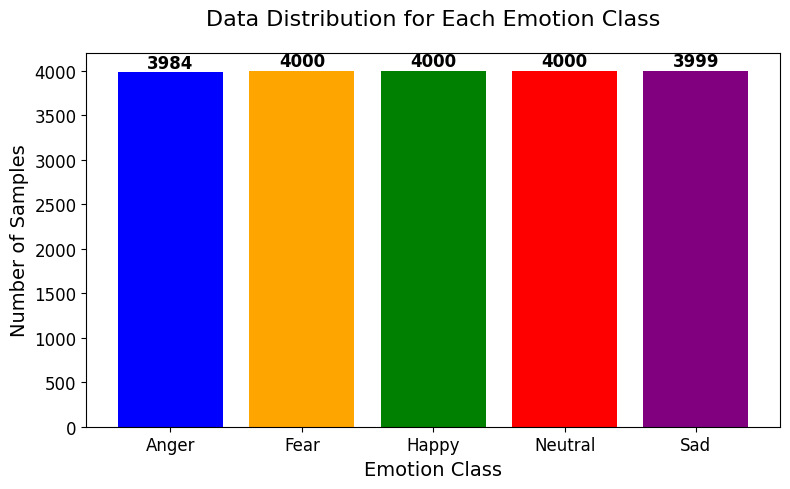

In [ ]:

encoded_labels = encoded_labels  # Reading encoded_label list in the variable
class_counts = np.bincount(encoded_labels)  # Counting the occurrences of each class label

# Defining the class names (from class 0 to 4 as 'Anger','Fear','Happy' ,'Neutral','Sad')
class_names = ['Anger','Fear','Happy' ,'Neutral','Sad' ]

# Creating a bar plot for data distribution among each emotion
plt.figure(figsize=(8, 5))
plt.bar(class_names, class_counts, color=['blue', 'orange', 'green', 'red', 'purple'])
plt.xlabel('Emotion Class', fontsize=14)
plt.ylabel('Number of Samples', fontsize=14)
plt.title('Data Distribution for Each Emotion Class', fontsize=16, pad=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Include class counts on labels above the bars.
for i, count in enumerate(class_counts):
    plt.text(i, count + 50, str(count), ha='center', fontsize=12, fontweight='bold')

plt.show()


## Pie Chart for Data Distribution

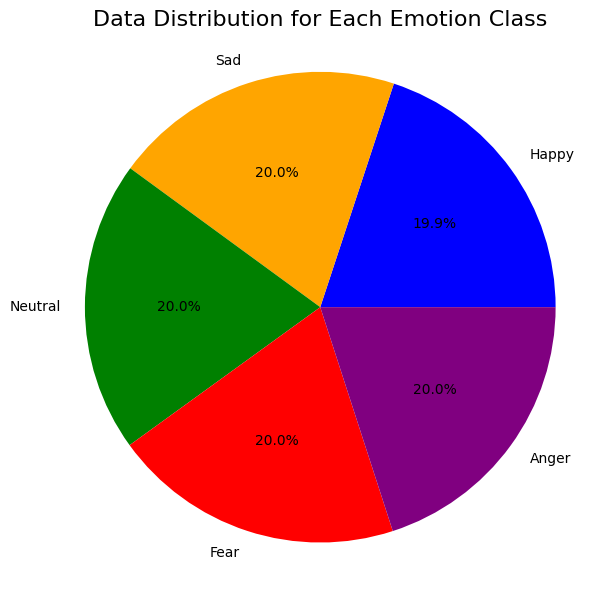

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

encoded_labels = encoded_labels  # encoded labels list

class_counts = np.bincount(encoded_labels)

# Define the class names (from class 0 to 4 as to 'Happy', 'Sad', 'Neutral', 'Fear', 'Anger')
class_names = ['Happy', 'Sad', 'Neutral', 'Fear', 'Anger']

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=class_names, autopct='%1.1f%%', colors=['blue', 'orange', 'green', 'red', 'purple'])
plt.title('Data Distribution for Each Emotion Class', fontsize=16)
plt.axis('equal')
plt.tight_layout()

plt.show()


## splits the data in each emotion into a batches of folders- HAP1, HAP2, etc

In [ ]:


source_dir = "/content/drive/MyDrive/Dissertation/zips/cropped_zips1/ANG/"
destination_dir = "/content/drive/MyDrive/dd/Dissertation/zips/subfolders/ANG1/"

# Getting list of all image files in the source directory
image_files = [f for f in os.listdir(source_dir) if f.startswith("frame")]

# Create sublists of 500 files each from the list of picture files.

image_batches = [image_files[i:i + 500] for i in range(0, len(image_files), 500)]

for i, batch in enumerate(image_batches, start=1):

    subfolder_path = os.path.join(destination_dir, f"ANG{i}")  # splits the data in each emotion into a batches of folders- HAP!, HAP2, etc
    os.makedirs(subfolder_path, exist_ok=True)

    # Moving the image files in the batch to the new subfolder
    for file_name in batch:
        source_path = os.path.join(source_dir, file_name)
        destination_path = os.path.join(subfolder_path, file_name)
        shutil.move(source_path, destination_path)

    print(f"Copied {len(batch)} files to {subfolder_path}")


## Cropping images to size 113 x 93

In [ ]:


def process_and_crop_face(image_file, desired_size=(93, 113)):
    mp_face_mesh = mp.solutions.face_mesh.FaceMesh(static_image_mode=True, max_num_faces=1)
    image_rgb = cv2.imread(image_file)
    results = mp_face_mesh.process(image_rgb)

    if results.multi_face_landmarks:
        face_landmark = results.multi_face_landmarks[0]
        face_boundary = []

        for landmark in face_landmark.landmark:
            x = int(landmark.x * image_rgb.shape[1])
            y = int(landmark.y * image_rgb.shape[0])
            face_boundary.append((x, y))

        x_min = min([x for x, _ in face_boundary])
        x_max = max([x for x, _ in face_boundary])
        y_min = min([y for _, y in face_boundary])
        y_max = max([y for _, y in face_boundary])

        cropped_image = image_rgb[y_min:y_max, x_min:x_max]
        resized_image = cv2.resize(cropped_image, desired_size)

        return resized_image
    else:
        return None

source_dir = "/content/drive/MyDrive/dd/Dissertation/zips/subfolders/SUR/HAP5/"
destination_dir = "/content/drive/MyDrive/dd/Dissertation/zips/final_process2/SUR/"

if not os.path.exists(destination_dir):
    os.makedirs(destination_dir)
ll = [1,600,1200,1800,2400,3000,3600,4200]
counter = ll[4]

for file_name in os.listdir(source_dir):
    if not file_name.startswith("frame"):
        continue
    image_path = os.path.join(source_dir, file_name)
    processed_image = process_and_crop_face(image_path)
    if processed_image is not None:
        final_img_name = "frame_" + str(counter) + ".jpg"
        destination_path = os.path.join(destination_dir, final_img_name)
        cv2.imwrite(destination_path, processed_image)
        print(f"Copied {file_name} to {destination_path}")
        counter += 1

print("Processing completed.")


Copied frame_4.jpg to /content/drive/MyDrive/dd/Dissertation/zips/final_process2/SUR/frame_2400.jpg
Copied frame_5.jpg to /content/drive/MyDrive/dd/Dissertation/zips/final_process2/SUR/frame_2401.jpg
Copied frame_6.jpg to /content/drive/MyDrive/dd/Dissertation/zips/final_process2/SUR/frame_2402.jpg
Copied frame_7.jpg to /content/drive/MyDrive/dd/Dissertation/zips/final_process2/SUR/frame_2403.jpg
Copied frame_8.jpg to /content/drive/MyDrive/dd/Dissertation/zips/final_process2/SUR/frame_2404.jpg
Copied frame_9.jpg to /content/drive/MyDrive/dd/Dissertation/zips/final_process2/SUR/frame_2405.jpg
Copied frame_10.jpg to /content/drive/MyDrive/dd/Dissertation/zips/final_process2/SUR/frame_2406.jpg
Copied frame_11.jpg to /content/drive/MyDrive/dd/Dissertation/zips/final_process2/SUR/frame_2407.jpg
Copied frame_12.jpg to /content/drive/MyDrive/dd/Dissertation/zips/final_process2/SUR/frame_2408.jpg
Copied frame_13.jpg to /content/drive/MyDrive/dd/Dissertation/zips/final_process2/SUR/frame_2409.

# Reading the pre-processed images folder

In [ ]:
import os
import cv2
import numpy as np
from sklearn.preprocessing import LabelEncoder

data_dir = "/content/drive/MyDrive/Dissertation/zips/final_process2"

emotion_folders = sorted(os.listdir(data_dir))  #list of emotion folders

# Initializing the label encoder
label_encoder = LabelEncoder()

# Fitting the label encoder to the emotion folder names
label_encoder.fit(emotion_folders)

# Loading the images
image_paths = []
images = []
labels = []

for folder_name in emotion_folders:
    folder_path = os.path.join(data_dir, folder_name)
    if os.path.isdir(folder_path):
        for file_name in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file_name)
            image_paths.append(file_path)
            image = cv2.imread(file_path)
            images.append(image)
            labels.append(folder_name)

# Use LabelEncoder to convert labels to numerical representation.
encoded_labels = label_encoder.transform(labels)

# Create a NumPy array from the encoded label data.
encoded_labels = np.array(encoded_labels)

# Check that the encoded_labels and image lengths are accurate.

print("Images length:", len(images))
print("Encoded labels length:", len(encoded_labels))


Images length: 19983
Encoded labels length: 19983


In [ ]:
print(encoded_labels)

[0 0 0 ... 4 4 4]


In [ ]:
print(emotion_folders)

['ANG', 'FEA', 'HAP', 'NEU', 'SAD']


## Saving Label Encoder object in a pickle file

In [ ]:
import pickle



#with open('/content/drive/MyDrive/Dissertation/zips/label_encoder_objlist/label_encoder_objlist0to4_1.pkl', 'wb') as f:
with open('/content/drive/MyDrive/Dissertation/zips/labelobj/label_encoder_objlist0to4.pkl', 'wb') as f:
    pickle.dump((label_encoder), f)

## Extracting Specific Landmarks from indexes 0, 1, 2, 13, 14, 15, 16, 17, 18 using Mediapipe Library

In [ ]:
import mediapipe as mp
import numpy as np
import cv2

# Initializing the Mediapipe's Face Mesh
mp_face_mesh = mp.solutions.face_mesh.FaceMesh(static_image_mode=True, max_num_faces=1)

# Use Face Mesh to preprocess images and extract certain face landmarks.

processed_images = []
specific_landmarks = []
counter = 0

# Landmarks of interest indices
landmark_indices_of_interest = [0, 1, 2, 13, 14, 15, 16, 17, 18]

for image in images:
    processed_images.append(image)
    # Converting BGR image to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Process the image with Mediapipe's Face Mesh
    results = mp_face_mesh.process(image_rgb)

    # Get the specific facial landmarks
    if results.multi_face_landmarks:
        face_landmark = results.multi_face_landmarks[0]
        landmark_values = []
        for index in landmark_indices_of_interest:
            landmark = face_landmark.landmark[index]
            landmark_values.extend([landmark.x, landmark.y, landmark.z])
        specific_landmarks.append(landmark_values)
    else:
        specific_landmarks.append(None)

    counter += 1
    print("counter: ", counter)

# Convert the processed images and specific facial landmarks to arrays
processed_images = np.array(processed_images)
specific_landmarks = np.array(specific_landmarks)


Streaming output truncated to the last 5000 lines.
counter:  14984
counter:  14985
counter:  14986
counter:  14987
counter:  14988
counter:  14989
counter:  14990
counter:  14991
counter:  14992
counter:  14993
counter:  14994
counter:  14995
counter:  14996
counter:  14997
counter:  14998
counter:  14999
counter:  15000
counter:  15001
counter:  15002
counter:  15003
counter:  15004
counter:  15005
counter:  15006
counter:  15007
counter:  15008
counter:  15009
counter:  15010
counter:  15011
counter:  15012
counter:  15013
counter:  15014
counter:  15015
counter:  15016
counter:  15017
counter:  15018
counter:  15019
counter:  15020
counter:  15021
counter:  15022
counter:  15023
counter:  15024
counter:  15025
counter:  15026
counter:  15027
counter:  15028
counter:  15029
counter:  15030
counter:  15031
counter:  15032
counter:  15033
counter:  15034
counter:  15035
counter:  15036
counter:  15037
counter:  15038
counter:  15039
counter:  15040
counter:  15041
counter:  15042
count

Save lists to a pickle file for Specific Landmarks

In [ ]:
import pickle

with open('/content/drive/MyDrive/Dissertation/zips/updated_list/updated_list_specific1.pkl', 'wb') as f:
    pickle.dump((processed_images, encoded_labels, specific_landmarks), f)

Load lists from a pickle file for Specific Landmarks

In [ ]:
import pickle

with open('/content/drive/MyDrive/Dissertation/zips/updated_list/updated_list_specific1.pkl', 'rb') as f:
    processed_images, encoded_labels, specific_landmarks = pickle.load(f)


Count of Specific landmarks

In [ ]:
count = len(specific_landmarks[0])
print(f"Number of landmarks: {count}")

Number of landmarks: 27


In [ ]:
encoded_labels.shape

(19983,)

Label encodings

In [ ]:
nn = set(list(encoded_labels))
print(nn)

{0, 1, 2, 3, 4}


Loading the label encoder object

In [ ]:
import pickle

with open('/content/drive/MyDrive/Dissertation/zips/labelobj/label_encoder_objlist0to4.pkl', 'rb') as f:
    #pickle.dump((label_encoder), f)
    label_encoder = pickle.load(f)

## Convolutional Neural Networks

### Training the Convolutional Neural Network without Early Stopping

With 5 folds and 60 Epochs

Training for fold 1...
Epoch 1/60
450/450 [==============================] - 25s 24ms/step - loss: 1.9554 - accuracy: 0.3759 - val_loss: 1.2490 - val_accuracy: 0.4622
Epoch 2/60
450/450 [==============================] - 7s 15ms/step - loss: 1.0011 - accuracy: 0.5953 - val_loss: 0.7927 - val_accuracy: 0.6723
Epoch 3/60
450/450 [==============================] - 6s 14ms/step - loss: 0.8679 - accuracy: 0.6558 - val_loss: 0.8273 - val_accuracy: 0.6685
Epoch 4/60
450/450 [==============================] - 6s 14ms/step - loss: 0.8242 - accuracy: 0.6748 - val_loss: 0.6912 - val_accuracy: 0.7111
Epoch 5/60
450/450 [==============================] - 6s 13ms/step - loss: 0.7844 - accuracy: 0.6871 - val_loss: 0.7302 - val_accuracy: 0.6929
Epoch 6/60
450/450 [==============================] - 6s 14ms/step - loss: 0.7506 - accuracy: 0.7017 - val_loss: 0.6673 - val_accuracy: 0.7173
Epoch 7/60
450/450 [==============================] - 6s 14ms/step - loss: 0.7351 - accuracy: 0.7103 - val_loss: 0.683

Training for fold 2...
Epoch 1/60
450/450 [==============================] - 9s 14ms/step - loss: 1.4777 - accuracy: 0.5081 - val_loss: 0.8108 - val_accuracy: 0.6742
Epoch 2/60
450/450 [==============================] - 7s 15ms/step - loss: 0.8829 - accuracy: 0.6515 - val_loss: 0.7348 - val_accuracy: 0.7004
Epoch 3/60
450/450 [==============================] - 6s 13ms/step - loss: 0.7972 - accuracy: 0.6851 - val_loss: 0.6779 - val_accuracy: 0.7336
Epoch 4/60
450/450 [==============================] - 6s 14ms/step - loss: 0.7579 - accuracy: 0.7058 - val_loss: 0.6346 - val_accuracy: 0.7473
Epoch 5/60
450/450 [==============================] - 7s 15ms/step - loss: 0.7189 - accuracy: 0.7176 - val_loss: 0.6081 - val_accuracy: 0.7536
Epoch 6/60
450/450 [==============================] - 6s 13ms/step - loss: 0.6976 - accuracy: 0.7252 - val_loss: 0.6460 - val_accuracy: 0.7517
Epoch 7/60
450/450 [==============================] - 6s 14ms/step - loss: 0.6816 - accuracy: 0.7374 - val_loss: 0.5993

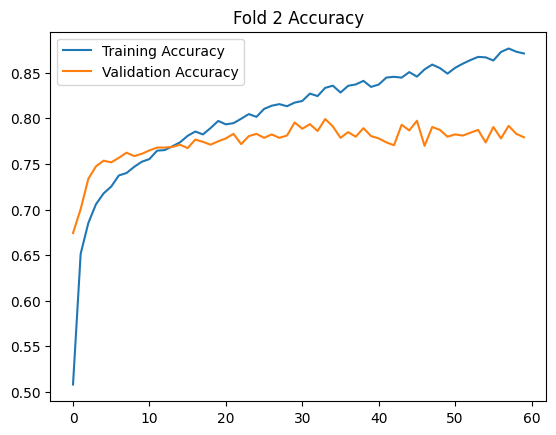

Training for fold 3...
Epoch 1/60
450/450 [==============================] - 10s 16ms/step - loss: 1.9764 - accuracy: 0.4982 - val_loss: 0.9046 - val_accuracy: 0.6391
Epoch 2/60
450/450 [==============================] - 7s 15ms/step - loss: 0.9224 - accuracy: 0.6320 - val_loss: 0.7944 - val_accuracy: 0.6754
Epoch 3/60
450/450 [==============================] - 6s 13ms/step - loss: 0.8561 - accuracy: 0.6610 - val_loss: 0.7422 - val_accuracy: 0.7017
Epoch 4/60
450/450 [==============================] - 6s 14ms/step - loss: 0.8155 - accuracy: 0.6792 - val_loss: 0.7229 - val_accuracy: 0.6961
Epoch 5/60
450/450 [==============================] - 8s 19ms/step - loss: 0.7908 - accuracy: 0.6858 - val_loss: 0.7004 - val_accuracy: 0.7073
Epoch 6/60
450/450 [==============================] - 7s 15ms/step - loss: 0.7605 - accuracy: 0.6979 - val_loss: 0.6942 - val_accuracy: 0.7211
Epoch 7/60
450/450 [==============================] - 7s 15ms/step - loss: 0.7507 - accuracy: 0.6992 - val_loss: 0.651

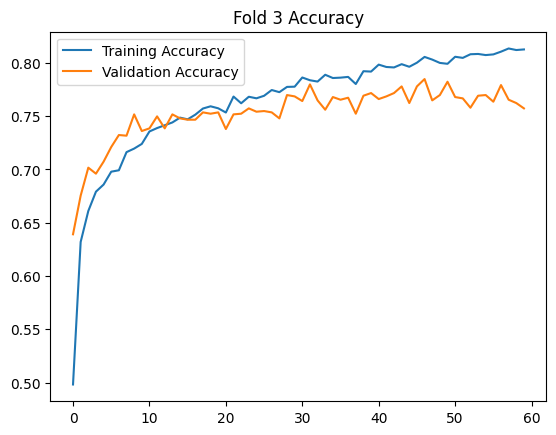

Training for fold 4...
Epoch 1/60
450/450 [==============================] - 10s 14ms/step - loss: 1.4657 - accuracy: 0.5172 - val_loss: 0.7822 - val_accuracy: 0.6929
Epoch 2/60
450/450 [==============================] - 6s 14ms/step - loss: 0.8492 - accuracy: 0.6638 - val_loss: 0.6889 - val_accuracy: 0.7286
Epoch 3/60
450/450 [==============================] - 7s 15ms/step - loss: 0.7849 - accuracy: 0.6885 - val_loss: 0.6618 - val_accuracy: 0.7261
Epoch 4/60
450/450 [==============================] - 6s 13ms/step - loss: 0.7374 - accuracy: 0.7120 - val_loss: 0.6190 - val_accuracy: 0.7461
Epoch 5/60
450/450 [==============================] - 6s 14ms/step - loss: 0.7071 - accuracy: 0.7252 - val_loss: 0.6209 - val_accuracy: 0.7573
Epoch 6/60
450/450 [==============================] - 7s 15ms/step - loss: 0.6803 - accuracy: 0.7305 - val_loss: 0.5832 - val_accuracy: 0.7736
Epoch 7/60
450/450 [==============================] - 6s 13ms/step - loss: 0.6664 - accuracy: 0.7418 - val_loss: 0.626

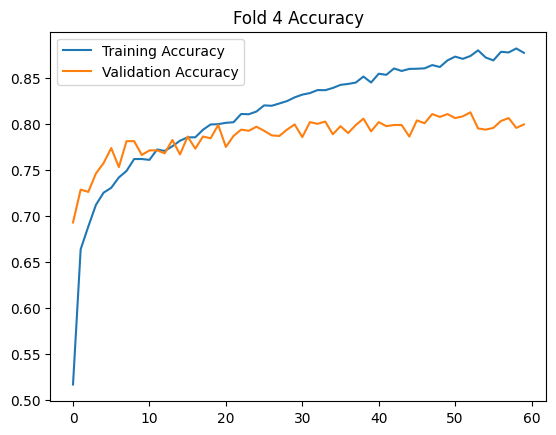

Training for fold 5...
Epoch 1/60
450/450 [==============================] - 11s 16ms/step - loss: 1.7865 - accuracy: 0.3884 - val_loss: 1.1468 - val_accuracy: 0.5335
Epoch 2/60
450/450 [==============================] - 6s 13ms/step - loss: 0.9591 - accuracy: 0.6175 - val_loss: 0.7689 - val_accuracy: 0.6936
Epoch 3/60
450/450 [==============================] - 6s 14ms/step - loss: 0.8241 - accuracy: 0.6746 - val_loss: 0.7163 - val_accuracy: 0.7098
Epoch 4/60
450/450 [==============================] - 7s 15ms/step - loss: 0.7742 - accuracy: 0.6938 - val_loss: 0.6913 - val_accuracy: 0.7079
Epoch 5/60
450/450 [==============================] - 6s 13ms/step - loss: 0.7412 - accuracy: 0.7062 - val_loss: 0.6655 - val_accuracy: 0.7261
Epoch 6/60
450/450 [==============================] - 6s 14ms/step - loss: 0.7326 - accuracy: 0.7122 - val_loss: 0.6686 - val_accuracy: 0.7255
Epoch 7/60
450/450 [==============================] - 7s 15ms/step - loss: 0.7156 - accuracy: 0.7168 - val_loss: 0.629

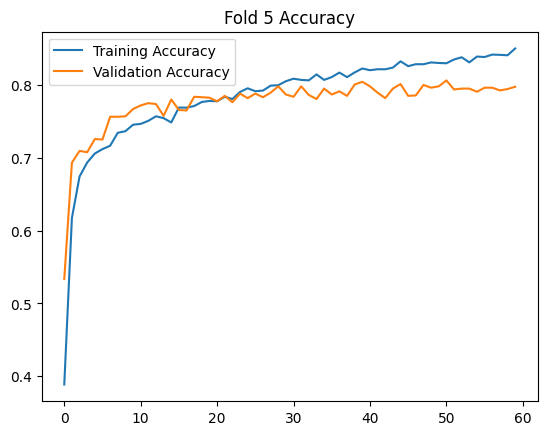

125/125 [==============================] - 1s 5ms/step
Confusion Matrix for last fold:
[[596  57   7  60  71]
 [ 74 501  34  42 139]
 [  9  23 750  10   4]
 [ 27   9  34 700   5]
 [ 78 117  10  32 607]]


In [ ]:


# Define=ing the function to convert landmarks
def convert_landmarks(raw_landmarks_list):
    all_landmarks = []
    valid_indices = []
    for i, each_image_landmarks in enumerate(raw_landmarks_list):
        if each_image_landmarks is not None:
            image_landmarks = np.array(each_image_landmarks).reshape(-1, 3)
            all_landmarks.append(image_landmarks)
            valid_indices.append(i)
    return np.array(all_landmarks), valid_indices

# Defining the function to convert the data to numpy arrays
def convert_to_numpy(processed_images, encoded_labels, raw_landmarks):
    valid_landmarks, valid_indices = convert_landmarks(raw_landmarks)
    valid_images = np.array([processed_images[i] for i in valid_indices])
    valid_labels = np.array([encoded_labels[i] for i in valid_indices])
    return valid_images, valid_labels, valid_landmarks

# my loaded lists
processed_images_list = processed_images
encoded_labels_list = encoded_labels
raw_landmarks_list = specific_landmarks

X_images, y_labels, X_landmarks = convert_to_numpy(processed_images_list, encoded_labels_list, raw_landmarks_list)

# K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold_no = 1

for train_index, test_index in kf.split(X_images, y_labels):
    X_images_train, X_images_test = X_images[train_index], X_images[test_index]
    X_landmarks_train, X_landmarks_test = X_landmarks[train_index], X_landmarks[test_index]
    y_train, y_test = y_labels[train_index], y_labels[test_index]

    # Splits for Validation
    X_images_train, X_images_val, X_landmarks_train, X_landmarks_val, y_train, y_val = train_test_split(
        X_images_train, X_landmarks_train, y_train, test_size=0.1, random_state=42)

    # Image Model
    image_input = layers.Input(shape=(X_images.shape[1], X_images.shape[2], X_images.shape[3]))
    x = layers.Conv2D(32, (3, 3), activation='relu')(image_input)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Conv2D(64, (3, 3), activation='relu')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Conv2D(128, (3, 3), activation='relu')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Flatten()(x)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    image_model = layers.Dense(128, activation='relu')(x)

    # Landmark Model
    landmark_input = layers.Input(shape=(X_landmarks.shape[1], X_landmarks.shape[2]))
    y = layers.Flatten()(landmark_input)
    y = layers.Dense(256, activation='relu')(y)
    y = layers.Dropout(0.5)(y)
    landmark_model = layers.Dense(128, activation='relu')(y)

    # Combined Model
    combined = layers.concatenate([image_model, landmark_model])
    z = layers.Dense(128, activation='relu')(combined)
    z = layers.Dropout(0.5)(z)
    output = layers.Dense(5, activation='softmax')(z)

    # Compiling the model
    model = keras.Model(inputs=[image_input, landmark_input], outputs=[output])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    print(f'Training for fold {fold_no}...')

    # Train the model and save training history
    history = model.fit([X_images_train, X_landmarks_train], y_train,
                        validation_data=([X_images_val, X_landmarks_val], y_val),
                        epochs=60,
                        batch_size=32)

     # Specify the directory path to save the file
    directory_path = '/content/drive/MyDrive/Dissertation/zips/latest_model_diff_folds/New_run/history_60ep_5folds'


    # Saving the training history for this fold using pickle

    history_filename = os.path.join(directory_path, f'history_fold_{fold_no}.pkl')
    with open(history_filename, 'wb') as file:
        pickle.dump(history.history, file)


    # Plotting training and validation accuracy
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Fold {fold_no} Accuracy')
    plt.legend()
    plt.show()

    fold_no += 1

# Confusion Matrix for the last fold
y_pred = np.argmax(model.predict([X_images_test, X_landmarks_test]), axis=-1)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix for last fold:")
print(cm)



Save Model

In [ ]:
model.save(f'/content/drive/MyDrive/Dissertation/zips/latest_model_diff_folds/New_run/60epochs5folds_model.h5')


### Calculate Evaluation Metrics for 60 Epochs and 5 Folds

In [ ]:
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, f1_score

# Predicting labels for the test set
y_pred = model.predict([X_images_test, X_landmarks_test])
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert one-hot encoding to class indices

#  Confusion Matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_classes, pos_label=1) # considering 1 is the positive label

#  ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_classes, pos_label=1)  # considering 1 is the positive label
roc_auc = auc(fpr, tpr)

# F1 Score
f1 = f1_score(y_test, y_pred_classes, average='weighted')

# Print or store these metrics as needed
print(f'F1 Score for 60 epochs and 5 folds: {f1}')
print("\n Precision for 60 epochs and 5 folds",precision)
print("\n Recall for 60 epochs and 5 folds", recall)
print("\n Confusion Matrix for 60 epochs and 5 folds: \n" ,cm)



125/125 [==============================] - 1s 4ms/step
F1 Score for 60 epochs and 5 folds: 0.7865870734796792

 Precision for 60 epochs and 5 folds [0.1976977  0.22291407 0.08582834 0.10838323 0.16828087 1.        ]

 Recall for 60 epochs and 5 folds [1.         0.90632911 0.2721519  0.22911392 0.17594937 0.        ]

 Confusion Matrix for 60 epochs and 5 folds: 
 [[596  57   7  60  71]
 [ 74 501  34  42 139]
 [  9  23 750  10   4]
 [ 27   9  34 700   5]
 [ 78 117  10  32 607]]


Load model - 60 epochs and 5 folds

In [ ]:
# Load the model
#loaded_model = tf.keras.models.load_model("/content/drive/MyDrive/Dissertation/zips/latest_model_diff_folds/60epochs5folds_model.h5")


# Total vs True Predicted Images by Emotion Visualization

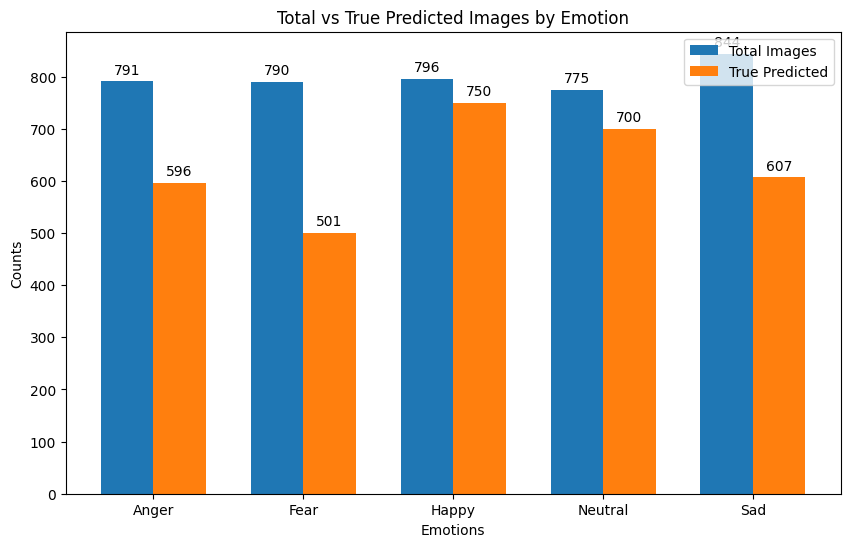

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Labels
labels = ['Anger', 'Fear', 'Happy', 'Neutral', 'Sad']

# confusion Matrix values
matrix = np.array([[596,  57,  7,  60,  71],
                  [ 74, 501,  34,  42,  139],
                  [  9,  23,  750,  10,   4],
                  [  27 , 9,   34,  700,   5],
                  [ 78,  117 ,  10,  32, 607]])

# Calculate total images for each emotion
total_images_count = np.sum(matrix, axis=1)

# Calculating the true predicted count for each emotion
true_predicted_count = np.diag(matrix)

# Setting the figure and axis
plt.figure(figsize=(10, 6))
x = np.arange(len(labels))

width = 0.35   #width of the bars

# Plotting the bars
rects1 = plt.bar(x - width/2, total_images_count, width, label='Total Images')
rects2 = plt.bar(x + width/2, true_predicted_count, width, label='True Predicted')

plt.xlabel('Emotions')
plt.ylabel('Counts')
plt.title('Total vs True Predicted Images by Emotion')
plt.xticks(x, labels)
plt.legend()

def annotate_bars(rects):
    for rect in rects:
        height = rect.get_height()
        plt.annotate('{}'.format(height),
                     xy=(rect.get_x() + rect.get_width() / 2, height),
                     xytext=(0, 3),  # 3 points vertical offset
                     textcoords="offset points",
                     ha='center', va='bottom')

annotate_bars(rects1)
annotate_bars(rects2)

plt.show()


### ROC Curve

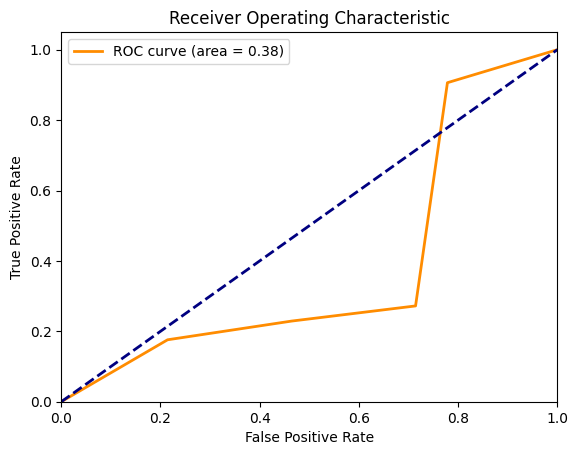

In [ ]:


plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="best")
plt.show()


### Confusion Matrix

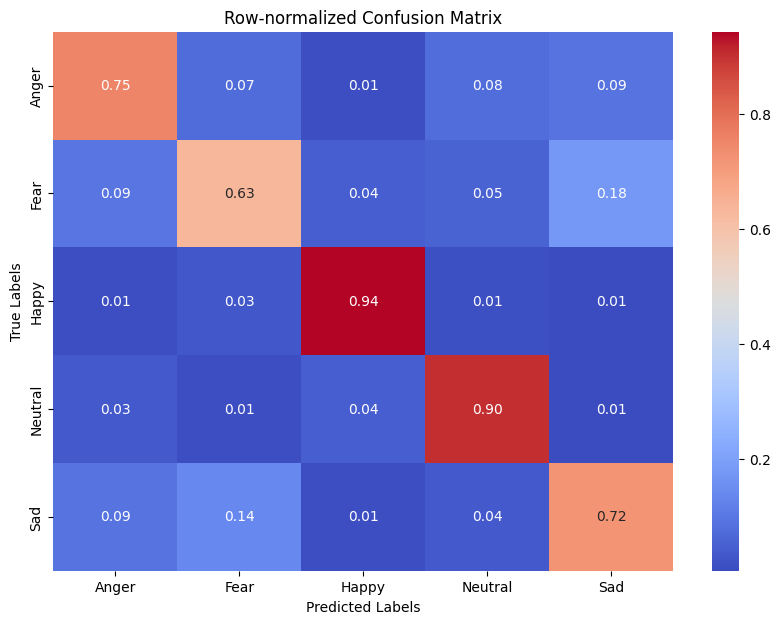

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = np.array([[596,  57,  7,  60,  71],
                        [ 74, 501,  34,  42,  139],
                        [  9,  23,  750,  10,   4],
                        [  27 , 9,   34,  700,   5],
                        [ 78,  117 ,  10,  32, 607]]
)

# Labels
labels = ['Anger', 'Fear', 'Happy', 'Neutral', 'Sad']

# Normalizing by row
row_sums = np.sum(conf_matrix, axis=1)
normalized_by_row = conf_matrix / row_sums[:, np.newaxis]

# Plotting
plt.figure(figsize=(10, 7))

sns.heatmap(normalized_by_row, annot=True, fmt='.2f', cmap='coolwarm', xticklabels=labels, yticklabels=labels)
plt.title('Row-normalized Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.show()



### Learning Curves Visualization among the 5-Folds



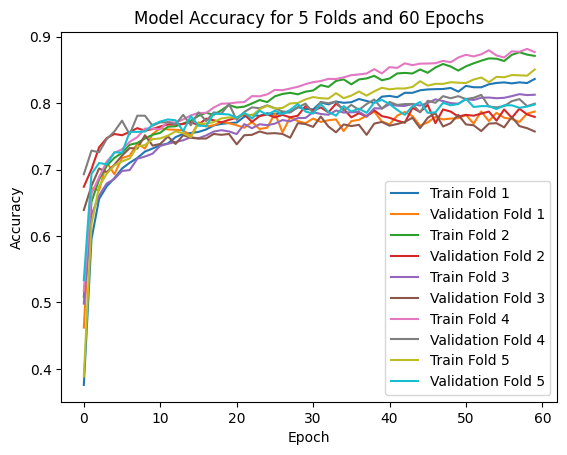

In [ ]:


# history folder path
history_folder_path = '/content/drive/MyDrive/Dissertation/zips/latest_model_diff_folds/New_run/history_60ep_5folds'

# Get a list of all pickle files in the folder
history_filenames = [filename for filename in os.listdir(history_folder_path) if filename.endswith('.pkl')]

# Loading the saved training histories
histories = []
for filename in history_filenames:
    history_path = os.path.join(history_folder_path, filename)
    with open(history_path, 'rb') as file:
        history = pickle.load(file)
        histories.append(history)

# Plotting the training and validation accuracy for each fold
for fold_no, history in enumerate(histories, start=1):
    plt.plot(history['accuracy'], label=f'Train Fold {fold_no}')
    plt.plot(history['val_accuracy'], label=f'Validation Fold {fold_no}')

plt.title('Model Accuracy for 5 Folds and 60 Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()



### Loss Plot among 5-Folds

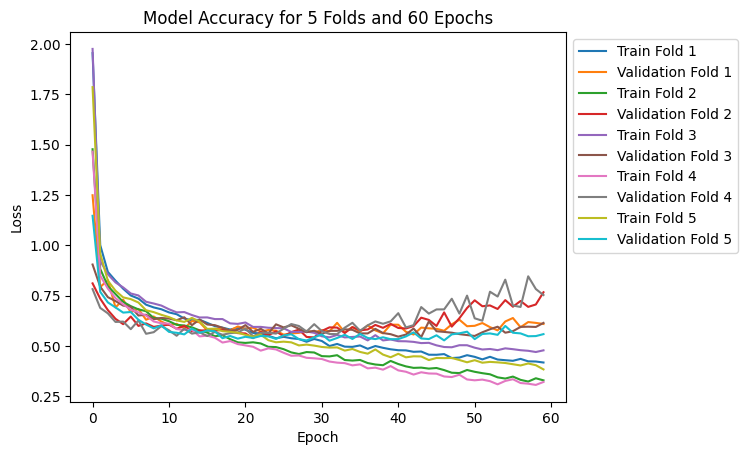

In [ ]:

import os
import pickle
import matplotlib.pyplot as plt

#history folder path
history_folder_path = '/content/drive/MyDrive/Dissertation/zips/latest_model_diff_folds/New_run/history_60ep_5folds'

# Getting a list of all pickle files in the folder
history_filenames = [filename for filename in os.listdir(history_folder_path) if filename.endswith('.pkl')]

# Loading the saved training histories
histories = []
for filename in history_filenames:
    history_path = os.path.join(history_folder_path, filename)
    with open(history_path, 'rb') as file:
        history = pickle.load(file)
        histories.append(history)

# Plot the training and validation accuracy for each fold
for fold_no, history in enumerate(histories, start=1):
    plt.plot(history['loss'], label=f'Train Fold {fold_no}')
    plt.plot(history['val_loss'], label=f'Validation Fold {fold_no}')

plt.title('Model Accuracy for 5 Folds and 60 Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()



### With 5 folds and 70 Epochs

Training for fold 1...
Epoch 1/70
450/450 [==============================] - 13s 16ms/step - loss: 2.2439 - accuracy: 0.3794 - val_loss: 1.1064 - val_accuracy: 0.5797
Epoch 2/70
450/450 [==============================] - 6s 13ms/step - loss: 1.0286 - accuracy: 0.5838 - val_loss: 0.9244 - val_accuracy: 0.6423
Epoch 3/70
450/450 [==============================] - 8s 17ms/step - loss: 0.8805 - accuracy: 0.6506 - val_loss: 0.7846 - val_accuracy: 0.6698
Epoch 4/70
450/450 [==============================] - 9s 20ms/step - loss: 0.8296 - accuracy: 0.6672 - val_loss: 0.6988 - val_accuracy: 0.7236
Epoch 5/70
450/450 [==============================] - 6s 12ms/step - loss: 0.7922 - accuracy: 0.6840 - val_loss: 0.6966 - val_accuracy: 0.7086
Epoch 6/70
450/450 [==============================] - 6s 13ms/step - loss: 0.7599 - accuracy: 0.6983 - val_loss: 0.6746 - val_accuracy: 0.7261
Epoch 7/70
450/450 [==============================] - 6s 14ms/step - loss: 0.7497 - accuracy: 0.6969 - val_loss: 0.691

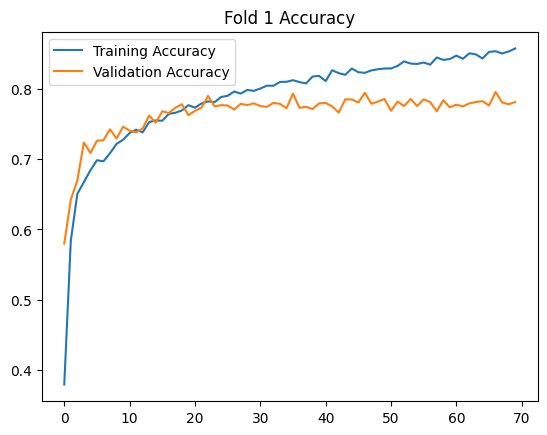

Training for fold 2...
Epoch 1/70
450/450 [==============================] - 10s 15ms/step - loss: 1.6447 - accuracy: 0.4620 - val_loss: 0.8523 - val_accuracy: 0.6629
Epoch 2/70
450/450 [==============================] - 6s 14ms/step - loss: 0.9133 - accuracy: 0.6383 - val_loss: 0.7552 - val_accuracy: 0.6998
Epoch 3/70
450/450 [==============================] - 6s 13ms/step - loss: 0.8398 - accuracy: 0.6667 - val_loss: 0.7185 - val_accuracy: 0.7092
Epoch 4/70
450/450 [==============================] - 6s 14ms/step - loss: 0.8026 - accuracy: 0.6815 - val_loss: 0.7746 - val_accuracy: 0.6917
Epoch 5/70
450/450 [==============================] - 6s 14ms/step - loss: 0.7643 - accuracy: 0.6946 - val_loss: 0.6812 - val_accuracy: 0.7248
Epoch 6/70
450/450 [==============================] - 6s 13ms/step - loss: 0.7377 - accuracy: 0.7106 - val_loss: 0.6703 - val_accuracy: 0.7223
Epoch 7/70
450/450 [==============================] - 7s 15ms/step - loss: 0.7241 - accuracy: 0.7121 - val_loss: 0.658

Training for fold 3...
Epoch 1/70
450/450 [==============================] - 11s 15ms/step - loss: 1.7447 - accuracy: 0.4730 - val_loss: 0.9485 - val_accuracy: 0.6204
Epoch 2/70
450/450 [==============================] - 6s 13ms/step - loss: 0.9405 - accuracy: 0.6265 - val_loss: 0.7805 - val_accuracy: 0.6836
Epoch 3/70
450/450 [==============================] - 7s 15ms/step - loss: 0.8646 - accuracy: 0.6554 - val_loss: 0.7583 - val_accuracy: 0.6929
Epoch 4/70
450/450 [==============================] - 6s 14ms/step - loss: 0.8125 - accuracy: 0.6773 - val_loss: 0.7424 - val_accuracy: 0.6898
Epoch 5/70
450/450 [==============================] - 6s 13ms/step - loss: 0.7942 - accuracy: 0.6796 - val_loss: 0.7221 - val_accuracy: 0.7029
Epoch 6/70
450/450 [==============================] - 7s 15ms/step - loss: 0.7651 - accuracy: 0.6921 - val_loss: 0.6944 - val_accuracy: 0.7205
Epoch 7/70
450/450 [==============================] - 6s 14ms/step - loss: 0.7418 - accuracy: 0.7000 - val_loss: 0.673

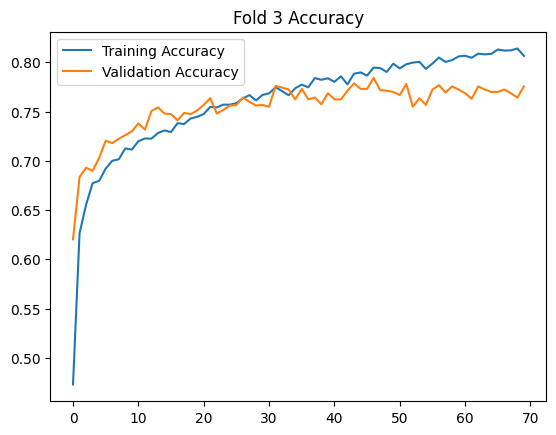

Training for fold 4...
Epoch 1/70
450/450 [==============================] - 10s 14ms/step - loss: 1.5481 - accuracy: 0.4437 - val_loss: 0.9106 - val_accuracy: 0.6235
Epoch 2/70
450/450 [==============================] - 6s 14ms/step - loss: 0.9628 - accuracy: 0.5984 - val_loss: 0.8314 - val_accuracy: 0.6667
Epoch 3/70
450/450 [==============================] - 6s 14ms/step - loss: 0.8800 - accuracy: 0.6368 - val_loss: 0.7322 - val_accuracy: 0.6998
Epoch 4/70
450/450 [==============================] - 6s 13ms/step - loss: 0.8278 - accuracy: 0.6655 - val_loss: 0.7069 - val_accuracy: 0.7192
Epoch 5/70
450/450 [==============================] - 6s 14ms/step - loss: 0.7808 - accuracy: 0.6840 - val_loss: 0.7092 - val_accuracy: 0.7104
Epoch 6/70
450/450 [==============================] - 7s 15ms/step - loss: 0.7639 - accuracy: 0.6949 - val_loss: 0.7447 - val_accuracy: 0.6873
Epoch 7/70
450/450 [==============================] - 6s 13ms/step - loss: 0.7331 - accuracy: 0.7065 - val_loss: 0.661

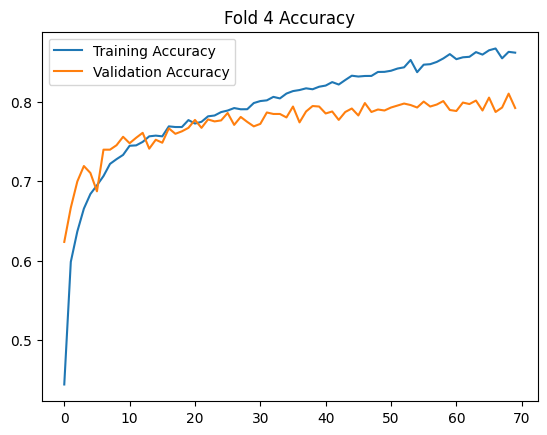

Training for fold 5...
Epoch 1/70
450/450 [==============================] - 12s 15ms/step - loss: 1.6037 - accuracy: 0.4574 - val_loss: 0.8904 - val_accuracy: 0.6660
Epoch 2/70
450/450 [==============================] - 6s 13ms/step - loss: 0.9361 - accuracy: 0.6310 - val_loss: 0.7358 - val_accuracy: 0.6992
Epoch 3/70
450/450 [==============================] - 7s 15ms/step - loss: 0.8415 - accuracy: 0.6684 - val_loss: 0.7058 - val_accuracy: 0.7192
Epoch 4/70
450/450 [==============================] - 6s 14ms/step - loss: 0.8258 - accuracy: 0.6741 - val_loss: 0.6886 - val_accuracy: 0.7192
Epoch 5/70
450/450 [==============================] - 6s 14ms/step - loss: 0.7760 - accuracy: 0.6922 - val_loss: 0.6744 - val_accuracy: 0.7311
Epoch 6/70
450/450 [==============================] - 7s 15ms/step - loss: 0.7778 - accuracy: 0.6936 - val_loss: 0.6528 - val_accuracy: 0.7236
Epoch 7/70
450/450 [==============================] - 6s 13ms/step - loss: 0.7490 - accuracy: 0.7038 - val_loss: 0.632

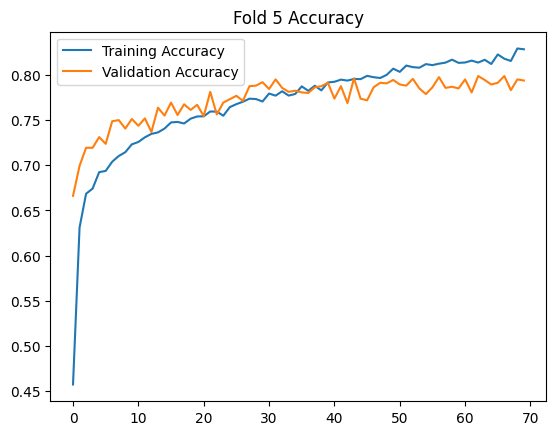

125/125 [==============================] - 1s 5ms/step
Confusion Matrix for last fold:
[[540  55   4  97  95]
 [ 69 482  25  37 177]
 [  6  43 714  22  11]
 [ 15  23  20 711   6]
 [ 73 101   7  30 633]]


In [ ]:


# function to convert landmarks
def convert_landmarks(raw_landmarks_list):
    all_landmarks = []
    valid_indices = []
    for i, each_image_landmarks in enumerate(raw_landmarks_list):
        if each_image_landmarks is not None:
            image_landmarks = np.array(each_image_landmarks).reshape(-1, 3)
            all_landmarks.append(image_landmarks)
            valid_indices.append(i)
    return np.array(all_landmarks), valid_indices

# function to convert data to numpy arrays
def convert_to_numpy(processed_images, encoded_labels, raw_landmarks):
    valid_landmarks, valid_indices = convert_landmarks(raw_landmarks)
    valid_images = np.array([processed_images[i] for i in valid_indices])
    valid_labels = np.array([encoded_labels[i] for i in valid_indices])
    return valid_images, valid_labels, valid_landmarks

# my lists
processed_images_list = processed_images
encoded_labels_list = encoded_labels
raw_landmarks_list = specific_landmarks

X_images, y_labels, X_landmarks = convert_to_numpy(processed_images_list, encoded_labels_list, raw_landmarks_list)

# K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold_no = 1

for train_index, test_index in kf.split(X_images, y_labels):
    X_images_train, X_images_test = X_images[train_index], X_images[test_index]
    X_landmarks_train, X_landmarks_test = X_landmarks[train_index], X_landmarks[test_index]
    y_train, y_test = y_labels[train_index], y_labels[test_index]

    # Further split for validation
    X_images_train, X_images_val, X_landmarks_train, X_landmarks_val, y_train, y_val = train_test_split(
        X_images_train, X_landmarks_train, y_train, test_size=0.1, random_state=42)

    # Image Model
    image_input = layers.Input(shape=(X_images.shape[1], X_images.shape[2], X_images.shape[3]))
    x = layers.Conv2D(32, (3, 3), activation='relu')(image_input)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Conv2D(64, (3, 3), activation='relu')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Conv2D(128, (3, 3), activation='relu')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Flatten()(x)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    image_model = layers.Dense(128, activation='relu')(x)

    # Landmark Model
    landmark_input = layers.Input(shape=(X_landmarks.shape[1], X_landmarks.shape[2]))
    y = layers.Flatten()(landmark_input)
    y = layers.Dense(256, activation='relu')(y)
    y = layers.Dropout(0.5)(y)
    landmark_model = layers.Dense(128, activation='relu')(y)

    # Combined Model
    combined = layers.concatenate([image_model, landmark_model])
    z = layers.Dense(128, activation='relu')(combined)
    z = layers.Dropout(0.5)(z)
    output = layers.Dense(5, activation='softmax')(z)

    # Compile the model
    model = keras.Model(inputs=[image_input, landmark_input], outputs=[output])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    print(f'Training for fold {fold_no}...')

    # Train the model and save training history
    history = model.fit([X_images_train, X_landmarks_train], y_train,
                        validation_data=([X_images_val, X_landmarks_val], y_val),
                        epochs=70,
                        batch_size=32)

    directory_path = '/content/drive/MyDrive/Dissertation/zips/latest_model_diff_folds/New_run/history_70ep_5folds'


    history_filename = os.path.join(directory_path, f'history_fold_{fold_no}.pkl')
    with open(history_filename, 'wb') as file:
        pickle.dump(history.history, file)

    # Plot training and validation accuracy
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Fold {fold_no} Accuracy')
    plt.legend()
    plt.show()

    fold_no += 1

# Confusion Matrix for the last fold
y_pred = np.argmax(model.predict([X_images_test, X_landmarks_test]), axis=-1)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix for last fold:")
print(cm)



Save Model

In [ ]:
model.save(f'/content/drive/MyDrive/Dissertation/zips/latest_model_diff_folds/New_run/70epochs5folds_model.h5')


### Calculate Evaluation Metrics for 5 Folds and 70 Epochs

In [ ]:
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, f1_score

# Predicting labels for the test set
y_pred = model.predict([X_images_test, X_landmarks_test])
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert one-hot encoding to class indices

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_classes, pos_label=1) # Assuming 1 is the positive label

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_classes, pos_label=1)  # Assuming 1 is the positive label
roc_auc = auc(fpr, tpr)

# F1 Score
f1 = f1_score(y_test, y_pred_classes, average='weighted')

print(f'F1 Score for 70 epochs and 5 folds: {f1}')
print("\n Precision for 70 epochs and 5 folds \n",precision)
print("\n Recall for 70 epochs and 5 folds \n", recall)
print("\n Confusion Matrix for 70 epochs and 5 folds\n", cm)



125/125 [==============================] - 1s 5ms/step
F1 Score for 70 epochs and 5 folds: 0.7686611612391236

 Precision for 70 epochs and 5 folds 
 [0.1976977  0.21894929 0.09231363 0.11764706 0.19197397 1.        ]

 Recall for 70 epochs and 5 folds 
 [1.         0.91265823 0.30253165 0.27088608 0.22405063 0.        ]

 Confusion Matrix for 70 epochs and 5 folds
 [[540  55   4  97  95]
 [ 69 482  25  37 177]
 [  6  43 714  22  11]
 [ 15  23  20 711   6]
 [ 73 101   7  30 633]]


## Total vs True Predicted Images by Emotion Visualization

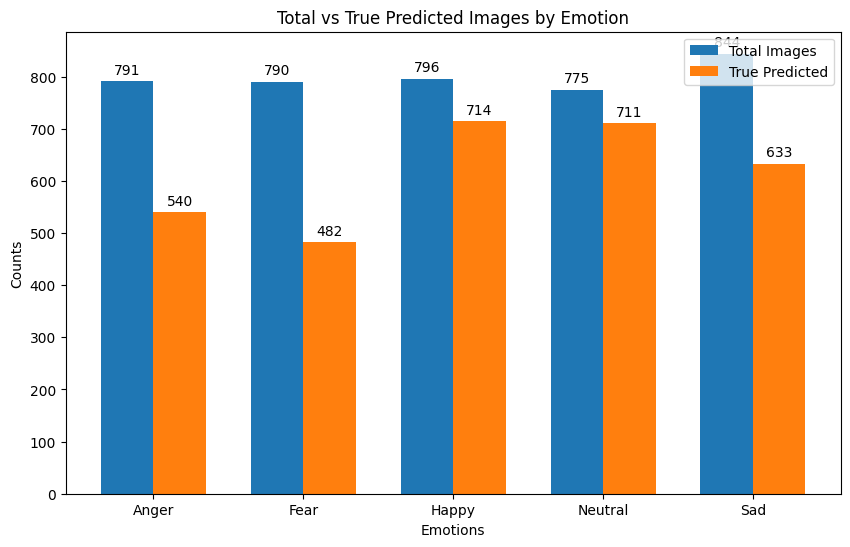

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Labels
labels = ['Anger', 'Fear', 'Happy', 'Neutral', 'Sad']


matrix = np.array([[540, 55 ,  4,  97,  95],
                  [ 69, 482,  25,  37, 177],
                  [  6,  43, 714,  22,  11],
                  [ 15,  23,  20, 711,   6],
                  [ 73, 101, 7,  30, 633]])

total_images_count = np.sum(matrix, axis=1)


true_predicted_count = np.diag(matrix)
plt.figure(figsize=(10, 6))

x = np.arange(len(labels)
width = 0.35   # width of the bars

# Plotting the bars
rects1 = plt.bar(x - width/2, total_images_count, width, label='Total Images')
rects2 = plt.bar(x + width/2, true_predicted_count, width, label='True Predicted')


plt.xlabel('Emotions')
plt.ylabel('Counts')
plt.title('Total vs True Predicted Images by Emotion')
plt.xticks(x, labels)
plt.legend()


def annotate_bars(rects):
    for rect in rects:
        height = rect.get_height()
        plt.annotate('{}'.format(height),
                     xy=(rect.get_x() + rect.get_width() / 2, height),
                     xytext=(0, 3),  # 3 points vertical offset
                     textcoords="offset points",
                     ha='center', va='bottom')

annotate_bars(rects1)
annotate_bars(rects2)

plt.show()


### Confusion Matrix for 70 epochs with 5 folds






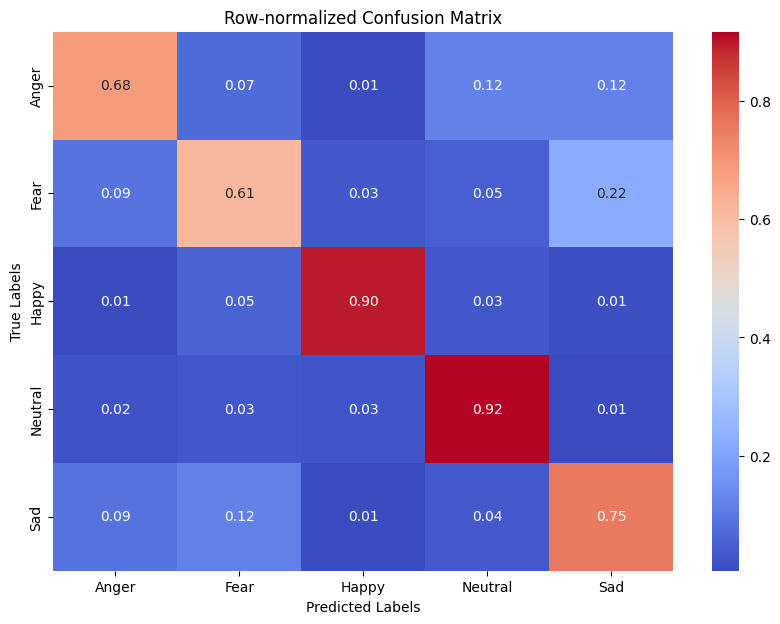

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = np.array([[540, 55 ,  4,  97,  95],
                        [ 69, 482,  25,  37, 177],
                        [  6,  43, 714,  22,  11],
                        [ 15,  23,  20, 711,   6],
                        [ 73, 101, 7,  30, 633]]
)

# Labels
labels = ['Anger', 'Fear', 'Happy', 'Neutral', 'Sad']

row_sums = np.sum(conf_matrix, axis=1)
normalized_by_row = conf_matrix / row_sums[:, np.newaxis]

plt.figure(figsize=(10, 7))

sns.heatmap(normalized_by_row, annot=True, fmt='.2f', cmap='coolwarm', xticklabels=labels, yticklabels=labels)
plt.title('Row-normalized Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.show()



### ROC curve for 70 Epochs with 5 folds


In [ ]:

# Plotting ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="best")
plt.show()


### Learning Curves Visualization among the 5-Folds

In [ ]:


import os
import pickle
import matplotlib.pyplot as plt

#  history files saved path
history_folder_path = '/content/drive/MyDrive/Dissertation/zips/latest_model_diff_folds/New_run/history_70ep_5folds'

history_filenames = [filename for filename in os.listdir(history_folder_path) if filename.endswith('.pkl')]

# Loading the saved training histories
histories = []
for filename in history_filenames:
    history_path = os.path.join(history_folder_path, filename)
    with open(history_path, 'rb') as file:
        history = pickle.load(file)
        histories.append(history)

# Plotting the training and validation accuracy for each fold
for fold_no, history in enumerate(histories, start=1):
    plt.plot(history['accuracy'], label=f'Train Fold {fold_no}')
    plt.plot(history['val_accuracy'], label=f'Validation Fold {fold_no}')

plt.title('Model Accuracy for 5 Folds and 70 Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()



### Loss Plot among the 5-folds

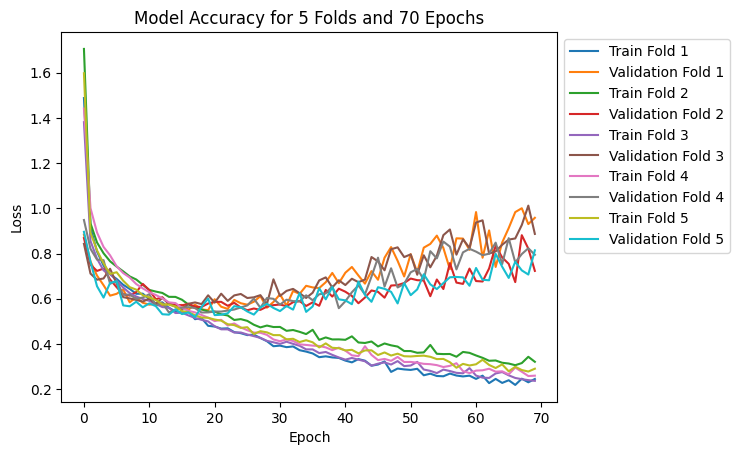

In [ ]:

import os
import pickle
import matplotlib.pyplot as plt

#history folder path
history_folder_path = '/content/drive/MyDrive/Dissertation/zips/latest_model_diff_folds/history_70ep_5folds'

# Get a list of all pickle files in the folder
history_filenames = [filename for filename in os.listdir(history_folder_path) if filename.endswith('.pkl')]

# Load the saved training histories
histories = []
for filename in history_filenames:
    history_path = os.path.join(history_folder_path, filename)
    with open(history_path, 'rb') as file:
        history = pickle.load(file)
        histories.append(history)

# Plotting the training and validation accuracy for each fold
for fold_no, history in enumerate(histories, start=1):
    plt.plot(history['loss'], label=f'Train Fold {fold_no}')
    plt.plot(history['val_loss'], label=f'Validation Fold {fold_no}')

plt.title('Model Accuracy for 5 Folds and 70 Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()



10 K-folds with 50 Epochs - list-  updated_list_specific

Training for fold 1 ...
Epoch 1/50
506/506 [==============================] - 16s 18ms/step - loss: 1.9145 - accuracy: 0.4090 - val_loss: 0.8926 - val_accuracy: 0.6137
Epoch 2/50
506/506 [==============================] - 7s 14ms/step - loss: 0.9329 - accuracy: 0.6270 - val_loss: 0.7826 - val_accuracy: 0.6726
Epoch 3/50
506/506 [==============================] - 7s 13ms/step - loss: 0.8343 - accuracy: 0.6644 - val_loss: 0.7143 - val_accuracy: 0.7026
Epoch 4/50
506/506 [==============================] - 8s 15ms/step - loss: 0.7860 - accuracy: 0.6880 - val_loss: 0.6784 - val_accuracy: 0.7265
Epoch 5/50
506/506 [==============================] - 7s 13ms/step - loss: 0.7504 - accuracy: 0.7020 - val_loss: 0.6704 - val_accuracy: 0.7210
Epoch 6/50
506/506 [==============================] - 8s 16ms/step - loss: 0.7227 - accuracy: 0.7137 - val_loss: 0.6436 - val_accuracy: 0.7293
Epoch 7/50
506/506 [==============================] - 7s 14ms/step - loss: 0.7017 - accuracy: 0.7246 - val_loss: 0.64

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Training for fold 2 ...
Epoch 1/50
506/506 [==============================] - 11s 15ms/step - loss: 1.5537 - accuracy: 0.4517 - val_loss: 0.8331 - val_accuracy: 0.6593
Epoch 2/50
506/506 [==============================] - 8s 16ms/step - loss: 0.9134 - accuracy: 0.6359 - val_loss: 0.7900 - val_accuracy: 0.6843
Epoch 3/50
506/506 [==============================] - 7s 13ms/step - loss: 0.8273 - accuracy: 0.6750 - val_loss: 0.7177 - val_accuracy: 0.7015
Epoch 4/50
506/506 [==============================] - 8s 16ms/step - loss: 0.7790 - accuracy: 0.6925 - val_loss: 0.7043 - val_accuracy: 0.7065
Epoch 5/50
506/506 [==============================] - 8s 16ms/step - loss: 0.7451 - accuracy: 0.7054 - val_loss: 0.6832 - val_accuracy: 0.7160
Epoch 6/50
506/506 [==============================] - 7s 13ms/step - loss: 0.7207 - accuracy: 0.7110 - val_loss: 0.6638 - val_accuracy: 0.7349
Epoch 7/50
506/506 [==============================] - 8s 15ms/step - loss: 0.7086 - accuracy: 0.7208 - val_loss: 0.65

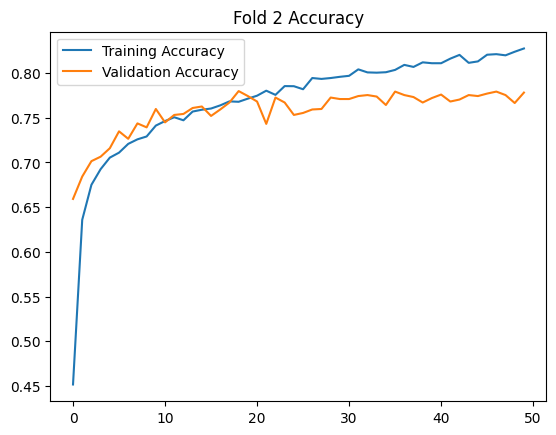

Training for fold 3 ...
Epoch 1/50
506/506 [==============================] - 12s 16ms/step - loss: 1.6614 - accuracy: 0.4530 - val_loss: 0.8461 - val_accuracy: 0.6481
Epoch 2/50
506/506 [==============================] - 7s 13ms/step - loss: 0.9485 - accuracy: 0.6244 - val_loss: 0.8103 - val_accuracy: 0.6793
Epoch 3/50
506/506 [==============================] - 7s 13ms/step - loss: 0.8426 - accuracy: 0.6652 - val_loss: 0.7578 - val_accuracy: 0.6843
Epoch 4/50
506/506 [==============================] - 8s 15ms/step - loss: 0.7925 - accuracy: 0.6809 - val_loss: 0.6972 - val_accuracy: 0.7110
Epoch 5/50
506/506 [==============================] - 7s 14ms/step - loss: 0.7653 - accuracy: 0.6939 - val_loss: 0.6900 - val_accuracy: 0.7115
Epoch 6/50
506/506 [==============================] - 8s 16ms/step - loss: 0.7392 - accuracy: 0.7060 - val_loss: 0.6863 - val_accuracy: 0.7165
Epoch 7/50
506/506 [==============================] - 7s 14ms/step - loss: 0.7309 - accuracy: 0.7095 - val_loss: 0.67

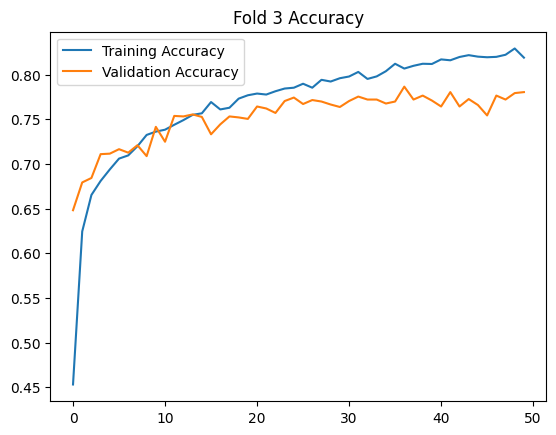

Training for fold 4 ...
Epoch 1/50
506/506 [==============================] - 12s 14ms/step - loss: 1.7308 - accuracy: 0.4562 - val_loss: 0.9447 - val_accuracy: 0.6537
Epoch 2/50
506/506 [==============================] - 7s 14ms/step - loss: 0.9311 - accuracy: 0.6324 - val_loss: 0.7576 - val_accuracy: 0.6987
Epoch 3/50
506/506 [==============================] - 7s 14ms/step - loss: 0.8124 - accuracy: 0.6789 - val_loss: 0.6940 - val_accuracy: 0.7248
Epoch 4/50
506/506 [==============================] - 7s 14ms/step - loss: 0.7639 - accuracy: 0.6935 - val_loss: 0.6452 - val_accuracy: 0.7543
Epoch 5/50
506/506 [==============================] - 8s 15ms/step - loss: 0.7352 - accuracy: 0.7103 - val_loss: 0.6537 - val_accuracy: 0.7504
Epoch 6/50
506/506 [==============================] - 7s 13ms/step - loss: 0.7041 - accuracy: 0.7185 - val_loss: 0.6231 - val_accuracy: 0.7560
Epoch 7/50
506/506 [==============================] - 7s 15ms/step - loss: 0.6852 - accuracy: 0.7289 - val_loss: 0.63

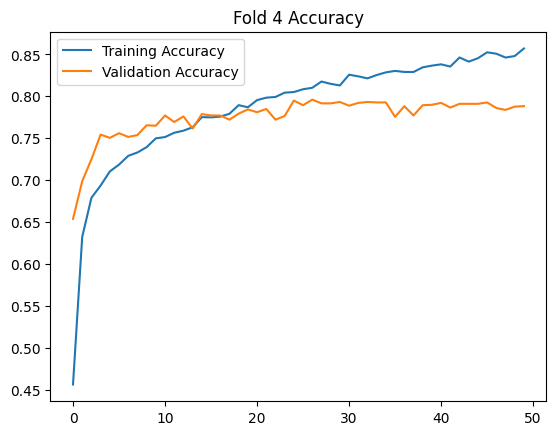

Training for fold 5 ...
Epoch 1/50
506/506 [==============================] - 11s 16ms/step - loss: 1.5205 - accuracy: 0.4672 - val_loss: 0.8511 - val_accuracy: 0.6526
Epoch 2/50
506/506 [==============================] - 7s 14ms/step - loss: 0.8641 - accuracy: 0.6556 - val_loss: 0.7949 - val_accuracy: 0.6809
Epoch 3/50
506/506 [==============================] - 7s 14ms/step - loss: 0.7826 - accuracy: 0.6958 - val_loss: 0.7256 - val_accuracy: 0.7048
Epoch 4/50
506/506 [==============================] - 7s 14ms/step - loss: 0.7275 - accuracy: 0.7119 - val_loss: 0.7073 - val_accuracy: 0.7015
Epoch 5/50
506/506 [==============================] - 7s 14ms/step - loss: 0.6927 - accuracy: 0.7293 - val_loss: 0.6732 - val_accuracy: 0.7337
Epoch 6/50
506/506 [==============================] - 8s 15ms/step - loss: 0.6654 - accuracy: 0.7375 - val_loss: 0.6546 - val_accuracy: 0.7304
Epoch 7/50
506/506 [==============================] - 7s 14ms/step - loss: 0.6563 - accuracy: 0.7430 - val_loss: 0.66

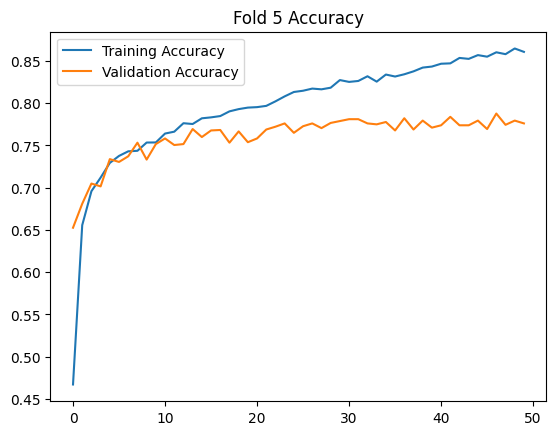

Training for fold 6 ...
Epoch 1/50
506/506 [==============================] - 12s 16ms/step - loss: 1.9692 - accuracy: 0.3906 - val_loss: 0.9524 - val_accuracy: 0.6231
Epoch 2/50
506/506 [==============================] - 7s 14ms/step - loss: 0.9631 - accuracy: 0.6115 - val_loss: 0.8065 - val_accuracy: 0.6882
Epoch 3/50
506/506 [==============================] - 7s 14ms/step - loss: 0.8611 - accuracy: 0.6558 - val_loss: 0.7548 - val_accuracy: 0.7026
Epoch 4/50
506/506 [==============================] - 8s 15ms/step - loss: 0.8071 - accuracy: 0.6787 - val_loss: 0.7262 - val_accuracy: 0.7110
Epoch 5/50
506/506 [==============================] - 7s 14ms/step - loss: 0.7817 - accuracy: 0.6884 - val_loss: 0.7011 - val_accuracy: 0.7176
Epoch 6/50
506/506 [==============================] - 7s 15ms/step - loss: 0.7575 - accuracy: 0.6964 - val_loss: 0.6707 - val_accuracy: 0.7426
Epoch 7/50
506/506 [==============================] - 7s 13ms/step - loss: 0.7343 - accuracy: 0.7065 - val_loss: 0.65

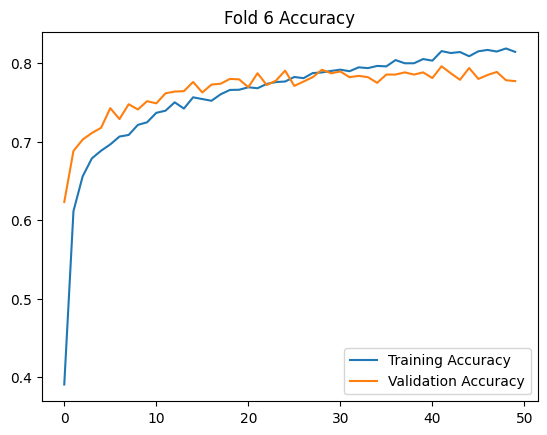

Training for fold 7 ...
Epoch 1/50
506/506 [==============================] - 13s 15ms/step - loss: 1.5657 - accuracy: 0.5071 - val_loss: 0.8167 - val_accuracy: 0.6732
Epoch 2/50
506/506 [==============================] - 7s 14ms/step - loss: 0.8807 - accuracy: 0.6494 - val_loss: 0.7081 - val_accuracy: 0.7082
Epoch 3/50
506/506 [==============================] - 7s 15ms/step - loss: 0.8167 - accuracy: 0.6720 - val_loss: 0.6976 - val_accuracy: 0.7110
Epoch 4/50
506/506 [==============================] - 7s 13ms/step - loss: 0.7722 - accuracy: 0.6956 - val_loss: 0.6754 - val_accuracy: 0.7221
Epoch 5/50
506/506 [==============================] - 7s 15ms/step - loss: 0.7491 - accuracy: 0.6983 - val_loss: 0.6709 - val_accuracy: 0.7232
Epoch 6/50
506/506 [==============================] - 7s 14ms/step - loss: 0.7135 - accuracy: 0.7148 - val_loss: 0.6566 - val_accuracy: 0.7332
Epoch 7/50
506/506 [==============================] - 7s 14ms/step - loss: 0.6971 - accuracy: 0.7243 - val_loss: 0.65

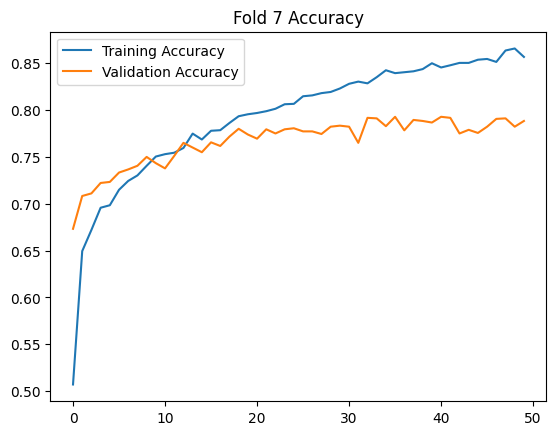

Training for fold 8 ...
Epoch 1/50
506/506 [==============================] - 12s 15ms/step - loss: 1.9430 - accuracy: 0.3631 - val_loss: 1.2042 - val_accuracy: 0.4992
Epoch 2/50
506/506 [==============================] - 7s 13ms/step - loss: 1.0165 - accuracy: 0.5978 - val_loss: 0.7956 - val_accuracy: 0.6832
Epoch 3/50
506/506 [==============================] - 9s 17ms/step - loss: 0.8679 - accuracy: 0.6643 - val_loss: 0.7659 - val_accuracy: 0.6870
Epoch 4/50
506/506 [==============================] - 7s 13ms/step - loss: 0.8208 - accuracy: 0.6790 - val_loss: 0.6975 - val_accuracy: 0.7154
Epoch 5/50
506/506 [==============================] - 7s 14ms/step - loss: 0.7895 - accuracy: 0.6871 - val_loss: 0.7014 - val_accuracy: 0.7187
Epoch 6/50
506/506 [==============================] - 7s 14ms/step - loss: 0.7696 - accuracy: 0.6950 - val_loss: 0.6945 - val_accuracy: 0.7221
Epoch 7/50
506/506 [==============================] - 7s 14ms/step - loss: 0.7533 - accuracy: 0.7022 - val_loss: 0.68

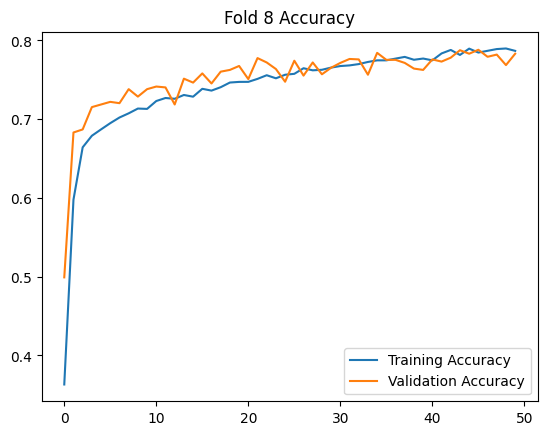

Training for fold 9 ...
Epoch 1/50
506/506 [==============================] - 11s 14ms/step - loss: 1.7209 - accuracy: 0.4581 - val_loss: 0.8802 - val_accuracy: 0.6509
Epoch 2/50
506/506 [==============================] - 7s 14ms/step - loss: 0.9234 - accuracy: 0.6359 - val_loss: 0.8359 - val_accuracy: 0.6631
Epoch 3/50
506/506 [==============================] - 7s 14ms/step - loss: 0.8234 - accuracy: 0.6767 - val_loss: 0.6914 - val_accuracy: 0.7148
Epoch 4/50
506/506 [==============================] - 7s 14ms/step - loss: 0.7657 - accuracy: 0.6988 - val_loss: 0.7035 - val_accuracy: 0.7276
Epoch 5/50
506/506 [==============================] - 7s 14ms/step - loss: 0.7342 - accuracy: 0.7091 - val_loss: 0.6608 - val_accuracy: 0.7282
Epoch 6/50
506/506 [==============================] - 7s 13ms/step - loss: 0.7308 - accuracy: 0.7116 - val_loss: 0.6898 - val_accuracy: 0.7276
Epoch 7/50
506/506 [==============================] - 7s 14ms/step - loss: 0.6955 - accuracy: 0.7285 - val_loss: 0.63

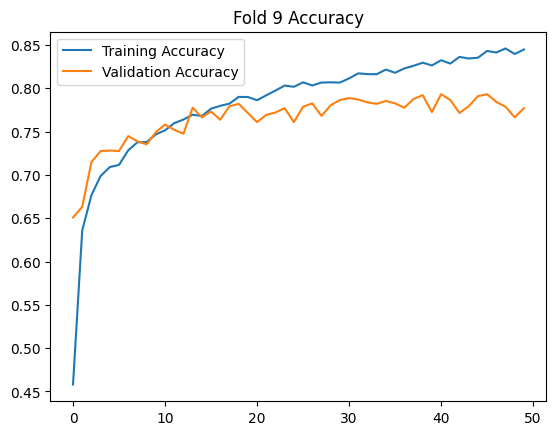

Training for fold 10 ...
Epoch 1/50
506/506 [==============================] - 11s 15ms/step - loss: 2.3539 - accuracy: 0.3618 - val_loss: 1.2633 - val_accuracy: 0.4597
Epoch 2/50
506/506 [==============================] - 7s 14ms/step - loss: 1.1447 - accuracy: 0.5264 - val_loss: 0.8232 - val_accuracy: 0.6776
Epoch 3/50
506/506 [==============================] - 7s 14ms/step - loss: 0.8900 - accuracy: 0.6449 - val_loss: 0.7488 - val_accuracy: 0.6954
Epoch 4/50
506/506 [==============================] - 7s 15ms/step - loss: 0.8682 - accuracy: 0.6618 - val_loss: 0.7710 - val_accuracy: 0.6937
Epoch 5/50
506/506 [==============================] - 7s 14ms/step - loss: 0.8278 - accuracy: 0.6667 - val_loss: 0.7222 - val_accuracy: 0.7293
Epoch 6/50
506/506 [==============================] - 7s 14ms/step - loss: 0.7677 - accuracy: 0.6882 - val_loss: 0.6792 - val_accuracy: 0.7282
Epoch 7/50
506/506 [==============================] - 8s 15ms/step - loss: 0.7432 - accuracy: 0.7023 - val_loss: 0.6

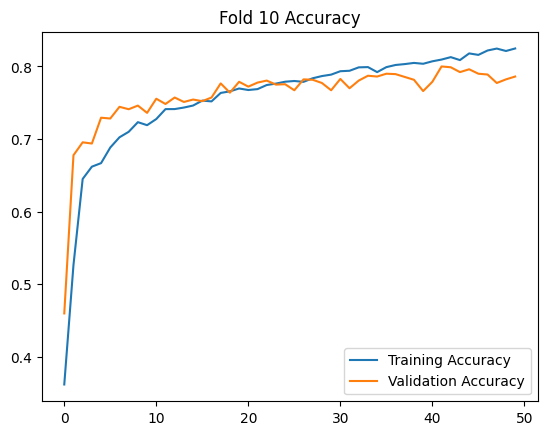

63/63 [==============================] - 1s 8ms/step
Confusion Matrix for last fold:
[[287  27   5  36  34]
 [ 36 241  16  49  66]
 [  5  19 365  10   5]
 [  7   7  10 356   2]
 [ 27  64   2  24 298]]


In [ ]:


def convert_landmarks(raw_landmarks_list):
    all_landmarks = []
    valid_indices = []
    for i, each_image_landmarks in enumerate(raw_landmarks_list):
        image_landmarks = []
        if each_image_landmarks is not None:
            for landmark in each_image_landmarks.landmark:
                x = landmark.x
                y = landmark.y
                z = landmark.z
                image_landmarks.append([x, y, z])
            all_landmarks.append(image_landmarks)
            valid_indices.append(i)
    return np.array(all_landmarks), valid_indices

def convert_to_numpy(processed_images, encoded_labels, raw_landmarks):
    valid_landmarks, valid_indices = convert_landmarks(raw_landmarks)
    valid_images = np.array([processed_images[i] for i in valid_indices])
    valid_labels = np.array([encoded_labels[i] for i in valid_indices])
    return valid_images, valid_labels, valid_landmarks


processed_images_list = processed_images
encoded_labels_list = encoded_labels
raw_landmarks_list = specific_landmarks

X_images, y_labels, X_landmarks = convert_to_numpy(processed_images_list, encoded_labels_list, raw_landmarks_list)

# K-Fold Cross Validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
fold_no = 1

for train_index, test_index in kf.split(X_images, y_labels):
    X_images_train, X_images_test = X_images[train_index], X_images[test_index]
    X_landmarks_train, X_landmarks_test = X_landmarks[train_index], X_landmarks[test_index]
    y_train, y_test = y_labels[train_index], y_labels[test_index]

    #  split for validation
    X_images_train, X_images_val, X_landmarks_train, X_landmarks_val, y_train, y_val = train_test_split(
        X_images_train, X_landmarks_train, y_train, test_size=0.1, random_state=42)

    # Image Model
    image_input = layers.Input(shape=(X_images.shape[1], X_images.shape[2], X_images.shape[3]))
    x = layers.Conv2D(32, (3, 3), activation='relu')(image_input)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Conv2D(64, (3, 3), activation='relu')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Conv2D(128, (3, 3), activation='relu')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Flatten()(x)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    image_model = layers.Dense(128, activation='relu')(x)

    # Landmark Model
    landmark_input = layers.Input(shape=(X_landmarks.shape[1], X_landmarks.shape[2]))
    y = layers.Flatten()(landmark_input)
    y = layers.Dense(256, activation='relu')(y)
    y = layers.Dropout(0.5)(y)
    y = layers.Dense(128, activation='relu')(y)

    # Combined Model
    concat = layers.concatenate([image_model, y])
    z = layers.Dense(128, activation='relu')(concat)
    z = layers.Dropout(0.5)(z)
    output = layers.Dense(5, activation='softmax')(z)

    # Compile
    model = keras.Model(inputs=[image_input, landmark_input], outputs=output)
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    # Train
    print(f'Training for fold {fold_no} ...')
    history = model.fit([X_images_train, X_landmarks_train], y_train,
                        epochs=50, batch_size=32,
                        validation_data=([X_images_val, X_landmarks_val], y_val))

    # Save the model
    model.save(f'/content/drive/MyDrive/Dissertation/zips/models_specific/50epochs10folds/model_fold_{fold_no}.h5')

    # Plot training and validation accuracy
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Fold {fold_no} Accuracy')
    plt.legend()
    plt.show()

    fold_no += 1

# Confusion Matrix for the last fold
y_pred = np.argmax(model.predict([X_images_test, X_landmarks_test]), axis=-1)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix for last fold:")
print(cm)



5 K-folds with 30 Epochs

Training for fold 1...
Epoch 1/30
506/506 [==============================] - 14s 15ms/step - loss: 1.7253 - accuracy: 0.4294 - val_loss: 0.9055 - val_accuracy: 0.6342
Epoch 2/30
506/506 [==============================] - 7s 13ms/step - loss: 0.9564 - accuracy: 0.6134 - val_loss: 0.7950 - val_accuracy: 0.6648
Epoch 3/30
506/506 [==============================] - 6s 12ms/step - loss: 0.8788 - accuracy: 0.6476 - val_loss: 0.7426 - val_accuracy: 0.6898
Epoch 4/30
506/506 [==============================] - 7s 14ms/step - loss: 0.8389 - accuracy: 0.6682 - val_loss: 0.7476 - val_accuracy: 0.7043
Epoch 5/30
506/506 [==============================] - 6s 13ms/step - loss: 0.7881 - accuracy: 0.6890 - val_loss: 0.7172 - val_accuracy: 0.7137
Epoch 6/30
506/506 [==============================] - 6s 12ms/step - loss: 0.7609 - accuracy: 0.7004 - val_loss: 0.6664 - val_accuracy: 0.7337
Epoch 7/30
506/506 [==============================] - 8s 16ms/step - loss: 0.7279 - accuracy: 0.7152 - val_loss: 0.634

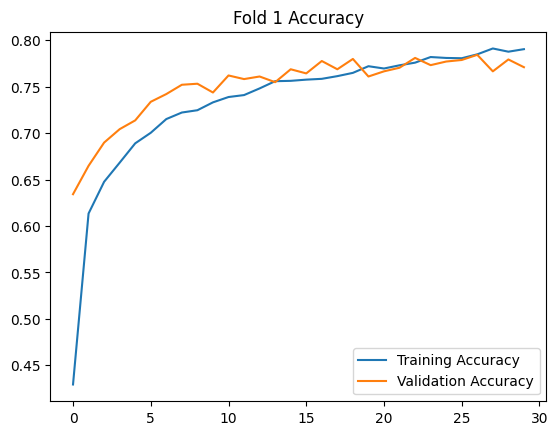

Training for fold 2...
Epoch 1/30
506/506 [==============================] - 13s 19ms/step - loss: 1.4521 - accuracy: 0.4995 - val_loss: 0.7641 - val_accuracy: 0.6932
Epoch 2/30
506/506 [==============================] - 6s 12ms/step - loss: 0.8593 - accuracy: 0.6565 - val_loss: 0.7331 - val_accuracy: 0.7093
Epoch 3/30
506/506 [==============================] - 7s 13ms/step - loss: 0.7883 - accuracy: 0.6853 - val_loss: 0.6456 - val_accuracy: 0.7349
Epoch 4/30
506/506 [==============================] - 7s 13ms/step - loss: 0.7575 - accuracy: 0.7012 - val_loss: 0.6679 - val_accuracy: 0.7293
Epoch 5/30
506/506 [==============================] - 6s 12ms/step - loss: 0.7343 - accuracy: 0.7063 - val_loss: 0.6312 - val_accuracy: 0.7365
Epoch 6/30
506/506 [==============================] - 7s 13ms/step - loss: 0.7076 - accuracy: 0.7195 - val_loss: 0.6181 - val_accuracy: 0.7415
Epoch 7/30
506/506 [==============================] - 7s 13ms/step - loss: 0.6973 - accuracy: 0.7251 - val_loss: 0.650

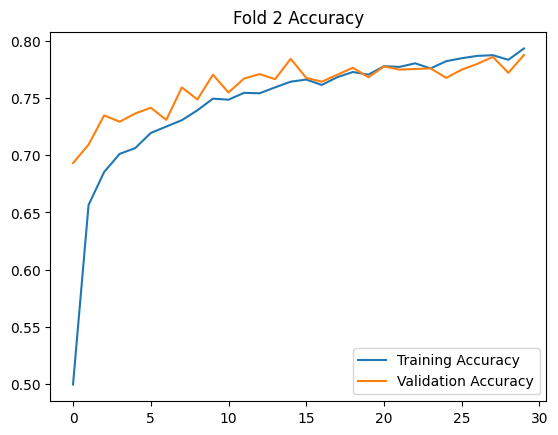

Training for fold 3...
Epoch 1/30
506/506 [==============================] - 11s 13ms/step - loss: 1.7320 - accuracy: 0.4279 - val_loss: 0.9017 - val_accuracy: 0.6298
Epoch 2/30
506/506 [==============================] - 7s 14ms/step - loss: 0.9221 - accuracy: 0.6298 - val_loss: 0.7764 - val_accuracy: 0.6971
Epoch 3/30
506/506 [==============================] - 7s 13ms/step - loss: 0.8279 - accuracy: 0.6672 - val_loss: 0.7054 - val_accuracy: 0.7076
Epoch 4/30
506/506 [==============================] - 6s 13ms/step - loss: 0.7799 - accuracy: 0.6926 - val_loss: 0.6898 - val_accuracy: 0.7315
Epoch 5/30
506/506 [==============================] - 10s 19ms/step - loss: 0.7333 - accuracy: 0.7110 - val_loss: 0.6412 - val_accuracy: 0.7471
Epoch 6/30
506/506 [==============================] - 6s 12ms/step - loss: 0.7166 - accuracy: 0.7190 - val_loss: 0.6497 - val_accuracy: 0.7404
Epoch 7/30
506/506 [==============================] - 8s 15ms/step - loss: 0.6983 - accuracy: 0.7231 - val_loss: 0.61

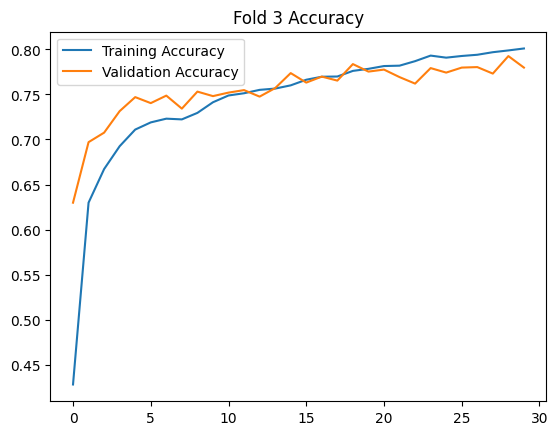

Training for fold 4...
Epoch 1/30
506/506 [==============================] - 10s 14ms/step - loss: 1.7663 - accuracy: 0.3528 - val_loss: 1.3026 - val_accuracy: 0.4175
Epoch 2/30
506/506 [==============================] - 7s 14ms/step - loss: 1.3406 - accuracy: 0.4112 - val_loss: 1.2959 - val_accuracy: 0.4603
Epoch 3/30
506/506 [==============================] - 6s 13ms/step - loss: 1.2457 - accuracy: 0.4719 - val_loss: 0.8810 - val_accuracy: 0.6465
Epoch 4/30
506/506 [==============================] - 7s 13ms/step - loss: 0.9454 - accuracy: 0.6279 - val_loss: 0.8749 - val_accuracy: 0.6837
Epoch 5/30
506/506 [==============================] - 7s 13ms/step - loss: 0.8595 - accuracy: 0.6586 - val_loss: 0.7427 - val_accuracy: 0.7043
Epoch 6/30
506/506 [==============================] - 6s 13ms/step - loss: 0.8053 - accuracy: 0.6800 - val_loss: 0.7467 - val_accuracy: 0.6993
Epoch 7/30
506/506 [==============================] - 7s 14ms/step - loss: 0.7686 - accuracy: 0.6943 - val_loss: 0.696

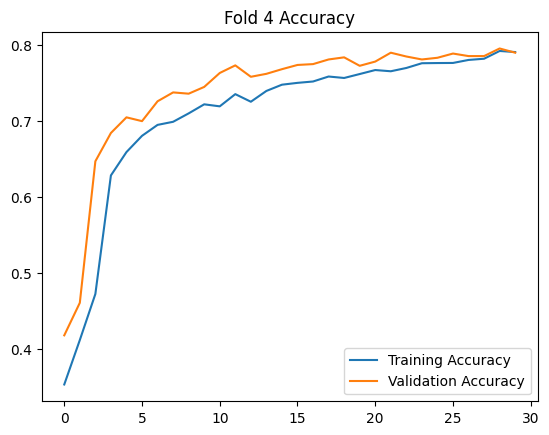

Training for fold 5...
Epoch 1/30
506/506 [==============================] - 11s 14ms/step - loss: 1.5911 - accuracy: 0.5017 - val_loss: 0.7718 - val_accuracy: 0.6848
Epoch 2/30
506/506 [==============================] - 6s 13ms/step - loss: 0.8696 - accuracy: 0.6540 - val_loss: 0.7055 - val_accuracy: 0.7132
Epoch 3/30
506/506 [==============================] - 7s 14ms/step - loss: 0.7852 - accuracy: 0.6882 - val_loss: 0.6651 - val_accuracy: 0.7376
Epoch 4/30
506/506 [==============================] - 6s 12ms/step - loss: 0.7489 - accuracy: 0.7081 - val_loss: 0.6307 - val_accuracy: 0.7343
Epoch 5/30
506/506 [==============================] - 7s 13ms/step - loss: 0.7110 - accuracy: 0.7179 - val_loss: 0.6354 - val_accuracy: 0.7371
Epoch 6/30
506/506 [==============================] - 7s 13ms/step - loss: 0.6881 - accuracy: 0.7278 - val_loss: 0.6092 - val_accuracy: 0.7526
Epoch 7/30
506/506 [==============================] - 6s 12ms/step - loss: 0.6604 - accuracy: 0.7369 - val_loss: 0.595

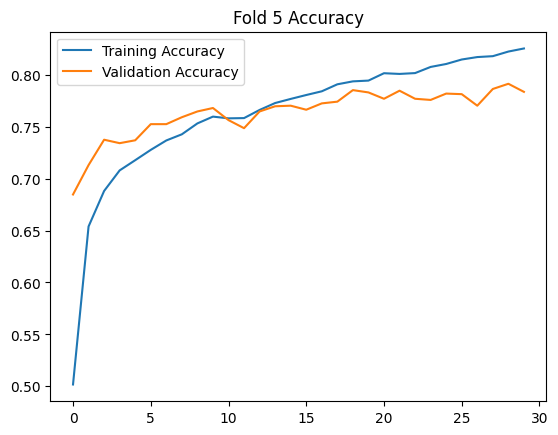

Training for fold 6...
Epoch 1/30
506/506 [==============================] - 10s 14ms/step - loss: 1.6720 - accuracy: 0.4402 - val_loss: 0.8944 - val_accuracy: 0.6398
Epoch 2/30
506/506 [==============================] - 7s 14ms/step - loss: 0.9437 - accuracy: 0.6130 - val_loss: 0.7809 - val_accuracy: 0.6787
Epoch 3/30
506/506 [==============================] - 6s 13ms/step - loss: 0.8435 - accuracy: 0.6578 - val_loss: 0.7084 - val_accuracy: 0.7009
Epoch 4/30
506/506 [==============================] - 7s 14ms/step - loss: 0.7900 - accuracy: 0.6851 - val_loss: 0.6968 - val_accuracy: 0.7093
Epoch 5/30
506/506 [==============================] - 7s 13ms/step - loss: 0.7572 - accuracy: 0.7004 - val_loss: 0.6718 - val_accuracy: 0.7276
Epoch 6/30
506/506 [==============================] - 6s 13ms/step - loss: 0.7353 - accuracy: 0.7100 - val_loss: 0.6659 - val_accuracy: 0.7237
Epoch 7/30
506/506 [==============================] - 7s 14ms/step - loss: 0.7128 - accuracy: 0.7174 - val_loss: 0.628

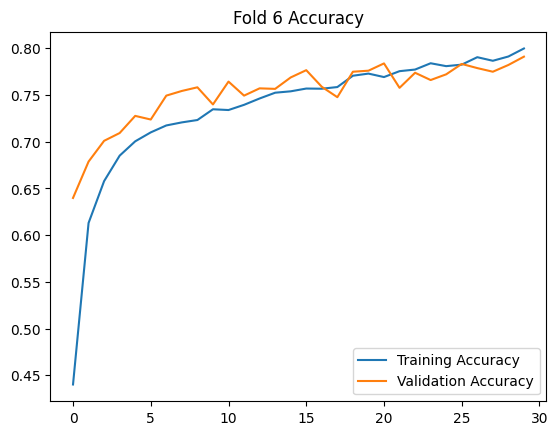

Training for fold 7...
Epoch 1/30
506/506 [==============================] - 12s 16ms/step - loss: 1.6573 - accuracy: 0.4725 - val_loss: 0.8505 - val_accuracy: 0.6526
Epoch 2/30
506/506 [==============================] - 7s 13ms/step - loss: 0.9186 - accuracy: 0.6431 - val_loss: 0.7581 - val_accuracy: 0.7032
Epoch 3/30
506/506 [==============================] - 7s 14ms/step - loss: 0.8418 - accuracy: 0.6709 - val_loss: 0.6957 - val_accuracy: 0.7165
Epoch 4/30
506/506 [==============================] - 6s 13ms/step - loss: 0.7952 - accuracy: 0.6861 - val_loss: 0.6810 - val_accuracy: 0.7282
Epoch 5/30
506/506 [==============================] - 7s 13ms/step - loss: 0.7711 - accuracy: 0.6981 - val_loss: 0.6555 - val_accuracy: 0.7387
Epoch 6/30
506/506 [==============================] - 7s 14ms/step - loss: 0.7456 - accuracy: 0.7063 - val_loss: 0.6542 - val_accuracy: 0.7371
Epoch 7/30
506/506 [==============================] - 6s 13ms/step - loss: 0.7322 - accuracy: 0.7081 - val_loss: 0.608

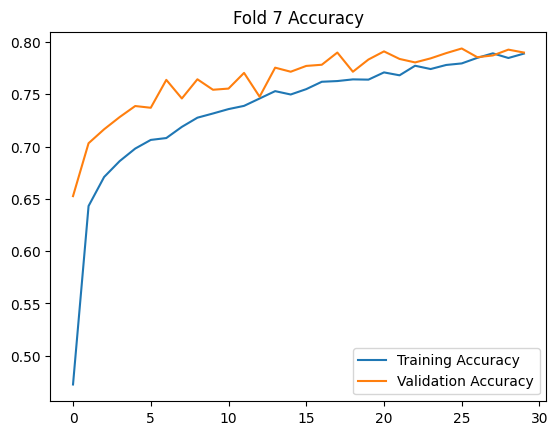

Training for fold 8...
Epoch 1/30
506/506 [==============================] - 10s 14ms/step - loss: 1.4460 - accuracy: 0.5285 - val_loss: 0.7756 - val_accuracy: 0.6948
Epoch 2/30
506/506 [==============================] - 7s 14ms/step - loss: 0.8496 - accuracy: 0.6710 - val_loss: 0.6999 - val_accuracy: 0.7098
Epoch 3/30
506/506 [==============================] - 7s 13ms/step - loss: 0.7634 - accuracy: 0.7086 - val_loss: 0.6638 - val_accuracy: 0.7360
Epoch 4/30
506/506 [==============================] - 7s 14ms/step - loss: 0.7150 - accuracy: 0.7233 - val_loss: 0.6754 - val_accuracy: 0.7298
Epoch 5/30
506/506 [==============================] - 7s 13ms/step - loss: 0.7068 - accuracy: 0.7257 - val_loss: 0.6160 - val_accuracy: 0.7532
Epoch 6/30
506/506 [==============================] - 7s 13ms/step - loss: 0.6675 - accuracy: 0.7438 - val_loss: 0.5885 - val_accuracy: 0.7538
Epoch 7/30
506/506 [==============================] - 7s 14ms/step - loss: 0.6503 - accuracy: 0.7467 - val_loss: 0.610

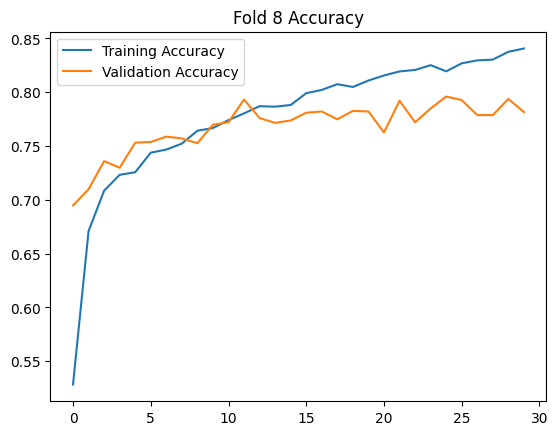

Training for fold 9...
Epoch 1/30
506/506 [==============================] - 11s 14ms/step - loss: 1.3730 - accuracy: 0.5228 - val_loss: 0.8559 - val_accuracy: 0.6715
Epoch 2/30
506/506 [==============================] - 7s 14ms/step - loss: 0.8745 - accuracy: 0.6475 - val_loss: 0.6958 - val_accuracy: 0.7143
Epoch 3/30
506/506 [==============================] - 7s 13ms/step - loss: 0.8040 - accuracy: 0.6814 - val_loss: 0.7256 - val_accuracy: 0.7043
Epoch 4/30
506/506 [==============================] - 6s 13ms/step - loss: 0.7530 - accuracy: 0.7003 - val_loss: 0.6254 - val_accuracy: 0.7599
Epoch 5/30
506/506 [==============================] - 7s 14ms/step - loss: 0.7291 - accuracy: 0.7102 - val_loss: 0.6270 - val_accuracy: 0.7499
Epoch 6/30
506/506 [==============================] - 7s 13ms/step - loss: 0.7061 - accuracy: 0.7222 - val_loss: 0.5957 - val_accuracy: 0.7626
Epoch 7/30
506/506 [==============================] - 7s 13ms/step - loss: 0.6864 - accuracy: 0.7291 - val_loss: 0.599

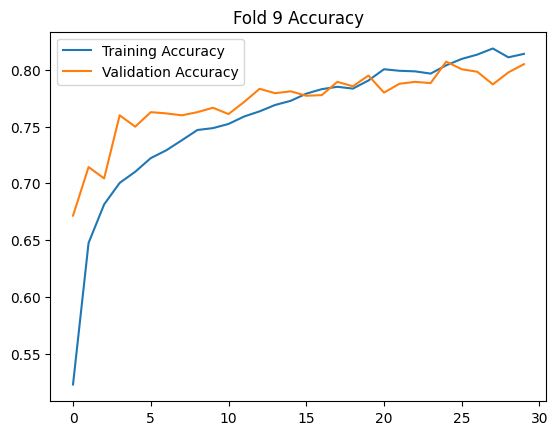

Training for fold 10...
Epoch 1/30
506/506 [==============================] - 10s 15ms/step - loss: 1.5633 - accuracy: 0.4857 - val_loss: 0.8678 - val_accuracy: 0.6248
Epoch 2/30
506/506 [==============================] - 7s 13ms/step - loss: 0.9021 - accuracy: 0.6388 - val_loss: 0.7237 - val_accuracy: 0.7076
Epoch 3/30
506/506 [==============================] - 7s 13ms/step - loss: 0.8178 - accuracy: 0.6769 - val_loss: 0.6851 - val_accuracy: 0.7254
Epoch 4/30
506/506 [==============================] - 7s 14ms/step - loss: 0.7659 - accuracy: 0.7014 - val_loss: 0.6573 - val_accuracy: 0.7298
Epoch 5/30
506/506 [==============================] - 7s 13ms/step - loss: 0.7492 - accuracy: 0.7100 - val_loss: 0.6603 - val_accuracy: 0.7265
Epoch 6/30
506/506 [==============================] - 7s 13ms/step - loss: 0.7191 - accuracy: 0.7224 - val_loss: 0.6266 - val_accuracy: 0.7371
Epoch 7/30
506/506 [==============================] - 7s 14ms/step - loss: 0.7044 - accuracy: 0.7230 - val_loss: 0.60

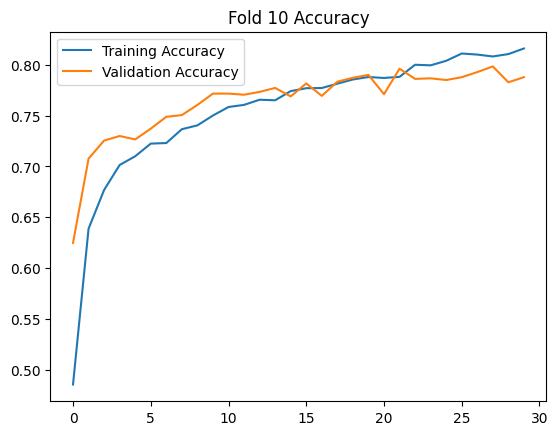

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


# This function assumes that every image includes nine landmarks, each with an x, y, and z coordinate.
#Therefore, a list of 27 digits should make up the raw_landmarks_list for each picture.

def convert_landmarks(raw_landmarks_list):

    all_landmarks = []
    valid_indices = []
    for i, each_image_landmarks in enumerate(raw_landmarks_list):
        if each_image_landmarks is not None:
            image_landmarks = np.array(each_image_landmarks).reshape(-1, 3)  # Reshape
            all_landmarks.append(image_landmarks)
            valid_indices.append(i)
    return np.array(all_landmarks), valid_indices

def convert_to_numpy(processed_images, encoded_labels, raw_landmarks):
    valid_landmarks, valid_indices = convert_landmarks(raw_landmarks)
    valid_images = np.array([processed_images[i] for i in valid_indices])
    valid_labels = np.array([encoded_labels[i] for i in valid_indices])
    return valid_images, valid_labels, valid_landmarks


processed_images_list = processed_images
encoded_labels_list = encoded_labels
raw_landmarks_list = specific_landmarks


X_images, y_labels, X_landmarks = convert_to_numpy(processed_images_list, encoded_labels_list, raw_landmarks_list)

# K-Fold Cross Validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
fold_no = 1

for train_index, test_index in kf.split(X_images, y_labels):
    X_images_train, X_images_test = X_images[train_index], X_images[test_index]
    X_landmarks_train, X_landmarks_test = X_landmarks[train_index], X_landmarks[test_index]
    y_train, y_test = y_labels[train_index], y_labels[test_index]

    #  split for validation
    X_images_train, X_images_val, X_landmarks_train, X_landmarks_val, y_train, y_val = train_test_split(
        X_images_train, X_landmarks_train, y_train, test_size=0.1, random_state=42)

    # Image Model
    image_input = layers.Input(shape=(X_images.shape[1], X_images.shape[2], X_images.shape[3]))
    x = layers.Conv2D(32, (3, 3), activation='relu')(image_input)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Conv2D(64, (3, 3), activation='relu')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Conv2D(128, (3, 3), activation='relu')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Flatten()(x)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    image_model = layers.Dense(128, activation='relu')(x)

    landmark_input = layers.Input(shape=(X_landmarks.shape[1], X_landmarks.shape[2]))  # This should now be (9, 3) if you have 9 landmarks
    y = layers.Flatten()(landmark_input)
    y = layers.Dense(256, activation='relu')(y)
    y = layers.Dropout(0.5)(y)
    landmark_model = layers.Dense(128, activation='relu')(y)

    # Combined Model
    combined = layers.concatenate([image_model, landmark_model])
    z = layers.Dense(128, activation='relu')(combined)
    z = layers.Dropout(0.5)(z)
    output = layers.Dense(5, activation='softmax')(z)

    model = keras.Model(inputs=[image_input, landmark_input], outputs=[output])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    print(f'Training for fold {fold_no}...')

    history = model.fit([X_images_train, X_landmarks_train], y_train,
                        validation_data=([X_images_val, X_landmarks_val], y_val),
                        epochs=30,
                        batch_size=32)

    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Fold {fold_no} Accuracy')
    plt.legend()
    plt.show()



    fold_no += 1



In [ ]:
# Save the model
#model.save(f'/content/drive/MyDrive/Dissertation/zips/models_specific/30epochs5folds_specific/30epochs5folds_specific.h5')

model.save(f'/content/drive/MyDrive/Dissertation/zips/model_Revati/30epochs10folds_metrics.h5')

In [ ]:
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, f1_score

# Predict labels for the test set
y_pred = model.predict([X_images_test, X_landmarks_test])
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert one-hot encoding to class indices

#  Confusion Matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_classes, pos_label=1) # Assuming 1 is the positive label

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_classes, pos_label=1)  # Assuming 1 is the positive label
roc_auc = auc(fpr, tpr)

# F1 Score
f1 = f1_score(y_test, y_pred_classes, average='weighted')


print(f'F1 Score: {f1}')
print("precision",precision)
print("recall", recall)
print(cm)


63/63 [==============================] - 0s 4ms/step
F1 Score: 0.7734370895931517
precision [0.2042042  0.22646007 0.09672506 0.11856823 0.17353579 1.        ]
recall [1.         0.93137255 0.31127451 0.25980392 0.19607843 0.        ]


In [ ]:
print(cm)

[[260  29   7  34  59]
 [ 28 253  21  26  80]
 [  0  11 378  14   1]
 [  4  12   9 348   9]
 [ 28  60   4  11 312]]


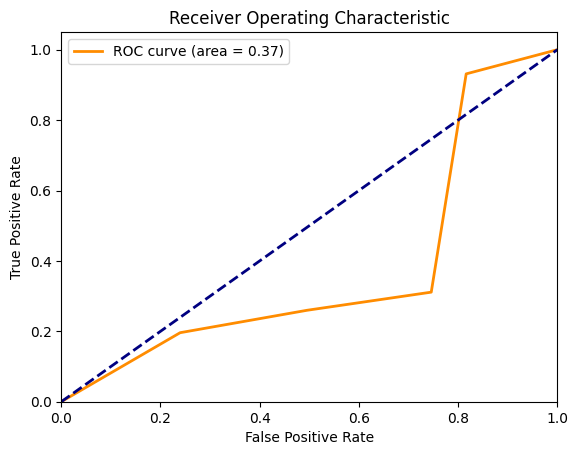

In [ ]:

# Plotting ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="best")
plt.show()


In [ ]:
print("precision",precision)
print("recall", recall)

precision [0.2042042  0.22646007 0.09672506 0.11856823 0.17353579 1.        ]
recall [1.         0.93137255 0.31127451 0.25980392 0.19607843 0.        ]


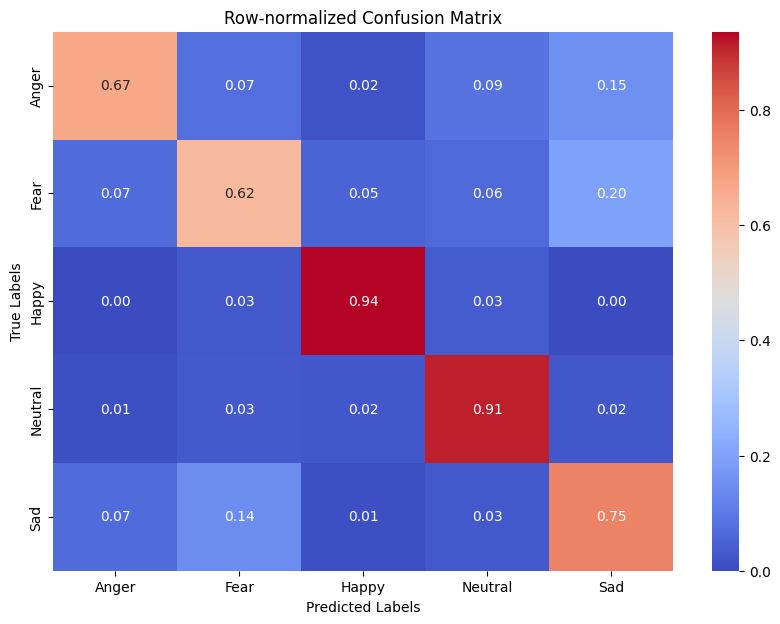

In [ ]:



conf_matrix = np.array([[260,  29,  7,  34,  59],
                        [ 28, 253,  21,  26,  80],
                        [  0,  11,  378,  14,   1],
                        [  4 , 12,   9,  348,   9],
                        [ 28,  60 ,  4,  11, 312]]
)

# Labels
labels = ['Anger', 'Fear', 'Happy', 'Neutral', 'Sad']


row_sums = np.sum(conf_matrix, axis=1)
normalized_by_row = conf_matrix / row_sums[:, np.newaxis]

plt.figure(figsize=(10, 7))

sns.heatmap(normalized_by_row, annot=True, fmt='.2f', cmap='coolwarm', xticklabels=labels, yticklabels=labels)
plt.title('Row-normalized Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.show()



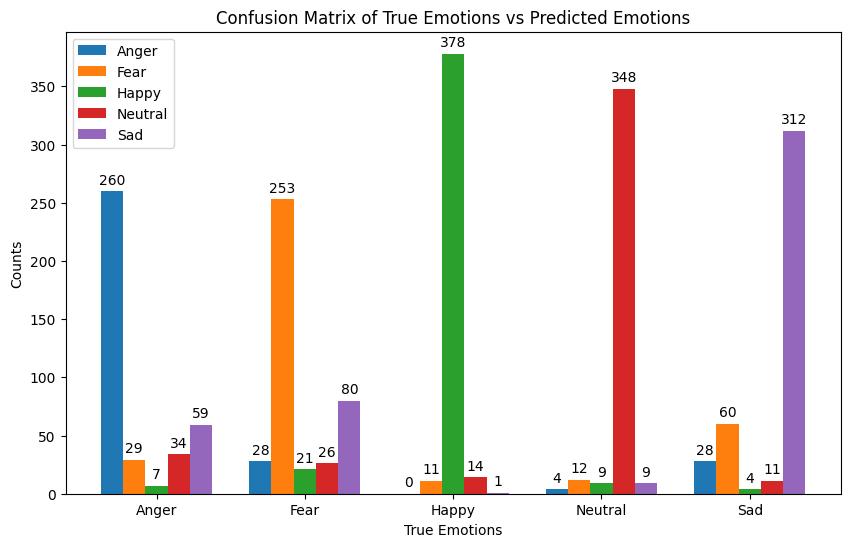

In [ ]:


# Labels
labels = ['Anger', 'Fear', 'Happy', 'Neutral', 'Sad']


conf_matrix = np.array([[260, 29, 7, 34, 59],
                        [28, 253, 21, 26, 80],
                        [0, 11, 378, 14, 1],
                        [4, 12, 9, 348, 9],
                        [28, 60, 4, 11, 312]])


plt.figure(figsize=(10, 6))

x = np.arange(len(labels))
width = 0.15


rects = []
for i in range(len(labels)):
    rect = plt.bar(x + (i - 2) * width, conf_matrix[:, i], width, label=labels[i])
    rects.append(rect)

plt.xlabel('True Emotions')
plt.ylabel('Counts')
plt.title('Confusion Matrix of True Emotions vs Predicted Emotions')
plt.xticks(x, labels)
plt.legend()

def annotate_bars(rects):
    for rect in rects:
        for bar in rect:
            height = bar.get_height()
            plt.annotate('{}'.format(height),
                         xy=(bar.get_x() + bar.get_width() / 2, height),
                         xytext=(0, 3),  # 3 points vertical offset
                         textcoords="offset points",
                         ha='center', va='bottom')

annotate_bars(rects)

plt.show()


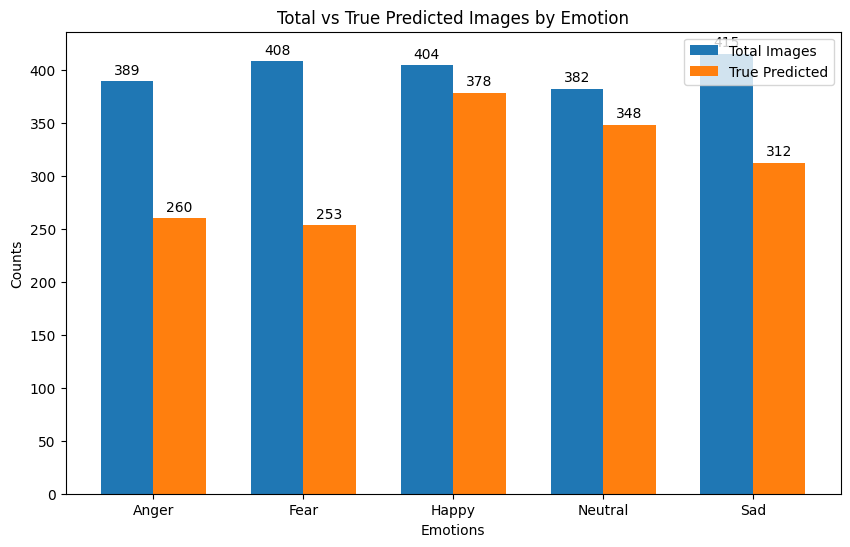

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Labels
labels = ['Anger', 'Fear', 'Happy', 'Neutral', 'Sad']


matrix = np.array([[260, 29, 7, 34, 59],
                   [28, 253, 21, 26, 80],
                   [0, 11, 378, 14, 1],
                   [4, 12, 9, 348, 9],
                   [28, 60, 4, 11, 312]])

# Calculating the total images for each emotion
total_images_count = np.sum(matrix, axis=1)

# Calculate true predicted count for each emotion
true_predicted_count = np.diag(matrix)

# Set up the figure and axis
plt.figure(figsize=(10, 6))

x = np.arange(len(labels))
width = 0.35  #width of the bars

# Plotting the bars
rects1 = plt.bar(x - width/2, total_images_count, width, label='Total Images')
rects2 = plt.bar(x + width/2, true_predicted_count, width, label='True Predicted')

plt.xlabel('Emotions')
plt.ylabel('Counts')
plt.title('Total vs True Predicted Images by Emotion')
plt.xticks(x, labels)
plt.legend()


def annotate_bars(rects):
    for rect in rects:
        height = rect.get_height()
        plt.annotate('{}'.format(height),
                     xy=(rect.get_x() + rect.get_width() / 2, height),
                     xytext=(0, 3),  # 3 points vertical offset
                     textcoords="offset points",
                     ha='center', va='bottom')

annotate_bars(rects1)
annotate_bars(rects2)

plt.show()


In [ ]:
# Load the model
loaded_model = tf.keras.models.load_model("/content/drive/MyDrive/Dissertation/zips/models_specific/30epochs5folds_specific/30epochs5folds_specific.h5")


latest:
location: Dissertation/zips/test_images/

Correct predictions- hap, angry3, angry5,  fear3, fear5, sad2, sad5

In [ ]:
from tensorflow import keras
import cv2
import numpy as np
import mediapipe as mp
from sklearn.preprocessing import LabelEncoder  # Make sure to import this if you are using a LabelEncoder

# Assuming that 'model' is the trained model
# and 'label_encoder' is the LabelEncoder used for training

# Landmarks of interest indices
landmark_indices_of_interest = [0, 1, 2, 13, 14, 15, 16, 17, 18]

def predict_single_image(image_path, model, label_encoder):

    image = cv2.imread(image_path)
    image = cv2.resize(image, (93, 113))

    # Convert BGR image to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Initialize the Mediapipe Face Mesh
    mp_face_mesh = mp.solutions.face_mesh.FaceMesh(static_image_mode=True, max_num_faces=1)

    # Process the image with Mediapipe's Face Mesh
    results = mp_face_mesh.process(image_rgb)

    # Extracting specific facial landmarks
    if results.multi_face_landmarks:
        face_landmark = results.multi_face_landmarks[0]
        landmark_values = []
        for index in landmark_indices_of_interest:
            landmark = face_landmark.landmark[index]
            landmark_values.extend([landmark.x, landmark.y, landmark.z])
        landmarks = np.array([landmark_values]).reshape(-1, 9, 3)  # or reshape it as per your model's expected input shape
    else:
        print("No face detected!")
        return None

    # Reshape the image array
    image = np.expand_dims(image, axis=0)

    #  model for prediction
    pred = model.predict([image, landmarks])


    pred_label = np.argmax(pred, axis=1)
    decoded_label = label_encoder.inverse_transform(pred_label)[0]

    confidence = np.max(pred) * 100

    return decoded_label, confidence


if __name__ == "__main__":

    model = keras.models.load_model("/content/drive/MyDrive/Dissertation/zips/models_specific/30epochs5folds_specific/30epochs5folds_specific.h5")

   # model = keras.models.load_model("/content/drive/MyDrive/Dissertation/zips/latest_model_diff_folds/60epochs5folds_model.h5")
    label_encoder = label_encoder  # initialize label encoder

    image_path = "/content/drive/MyDrive/Dissertation/zips/test_images/hap.jpg"

    predicted_label, confidence = predict_single_image(image_path, model, label_encoder)
    print(f"Predicted Label: {predicted_label}, Confidence: {confidence}%")



1/1 [==============================] - 0s 406ms/step
Predicted Label: HAP, Confidence: 99.57494735717773%


### Training the Convolutional Neural Network with Early Stopping

5 folds 60 epochs with ES

Training for fold 1...
Epoch 1/60
450/450 [==============================] - 23s 21ms/step - loss: 1.7800 - accuracy: 0.3917 - val_loss: 1.0319 - val_accuracy: 0.5947
Epoch 2/60
450/450 [==============================] - 7s 16ms/step - loss: 0.9820 - accuracy: 0.6095 - val_loss: 0.8145 - val_accuracy: 0.6654
Epoch 3/60
450/450 [==============================] - 6s 13ms/step - loss: 0.8724 - accuracy: 0.6435 - val_loss: 0.7830 - val_accuracy: 0.6779
Epoch 4/60
450/450 [==============================] - 7s 15ms/step - loss: 0.8189 - accuracy: 0.6738 - val_loss: 0.7820 - val_accuracy: 0.6767
Epoch 5/60
450/450 [==============================] - 6s 13ms/step - loss: 0.7704 - accuracy: 0.6903 - val_loss: 0.6632 - val_accuracy: 0.7273
Epoch 6/60
450/450 [==============================] - 6s 13ms/step - loss: 0.7437 - accuracy: 0.7017 - val_loss: 0.6583 - val_accuracy: 0.7348
Epoch 7/60
450/450 [==============================] - 8s 17ms/step - loss: 0.7303 - accuracy: 0.7091 - val_loss: 0.680

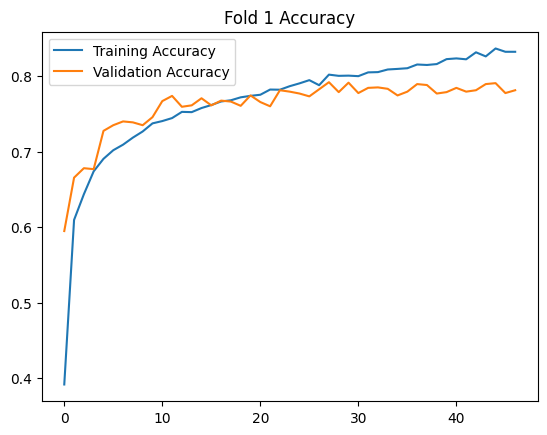

Training for fold 2...
Epoch 1/60
450/450 [==============================] - 10s 16ms/step - loss: 1.4267 - accuracy: 0.4707 - val_loss: 0.8596 - val_accuracy: 0.6585
Epoch 2/60
450/450 [==============================] - 6s 14ms/step - loss: 0.8982 - accuracy: 0.6403 - val_loss: 0.7202 - val_accuracy: 0.7111
Epoch 3/60
450/450 [==============================] - 6s 13ms/step - loss: 0.8263 - accuracy: 0.6722 - val_loss: 0.6935 - val_accuracy: 0.7136
Epoch 4/60
450/450 [==============================] - 7s 15ms/step - loss: 0.7753 - accuracy: 0.6892 - val_loss: 0.6790 - val_accuracy: 0.7267
Epoch 5/60
450/450 [==============================] - 6s 13ms/step - loss: 0.7486 - accuracy: 0.7011 - val_loss: 0.6875 - val_accuracy: 0.7154
Epoch 6/60
450/450 [==============================] - 6s 13ms/step - loss: 0.7305 - accuracy: 0.7095 - val_loss: 0.6690 - val_accuracy: 0.7261
Epoch 7/60
450/450 [==============================] - 7s 15ms/step - loss: 0.7131 - accuracy: 0.7163 - val_loss: 0.675

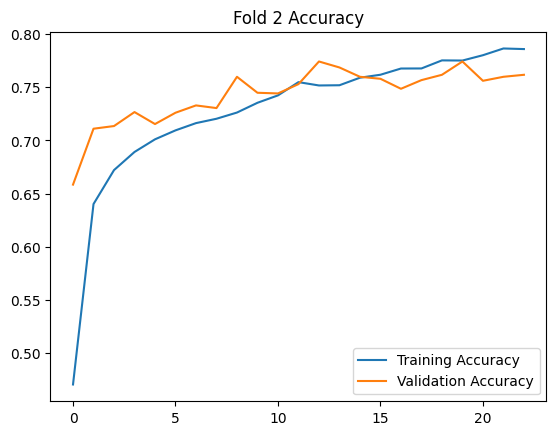

Training for fold 3...
Epoch 1/60
450/450 [==============================] - 11s 15ms/step - loss: 1.5741 - accuracy: 0.4971 - val_loss: 0.8886 - val_accuracy: 0.6510
Epoch 2/60
450/450 [==============================] - 6s 13ms/step - loss: 0.9305 - accuracy: 0.6231 - val_loss: 0.7523 - val_accuracy: 0.6998
Epoch 3/60
450/450 [==============================] - 7s 15ms/step - loss: 0.8602 - accuracy: 0.6506 - val_loss: 0.7475 - val_accuracy: 0.7023
Epoch 4/60
450/450 [==============================] - 6s 13ms/step - loss: 0.8276 - accuracy: 0.6663 - val_loss: 0.7198 - val_accuracy: 0.6961
Epoch 5/60
450/450 [==============================] - 6s 14ms/step - loss: 0.8240 - accuracy: 0.6718 - val_loss: 0.7024 - val_accuracy: 0.7067
Epoch 6/60
450/450 [==============================] - 7s 15ms/step - loss: 0.7833 - accuracy: 0.6846 - val_loss: 0.7635 - val_accuracy: 0.6811
Epoch 7/60
450/450 [==============================] - 6s 13ms/step - loss: 0.7605 - accuracy: 0.6919 - val_loss: 0.679

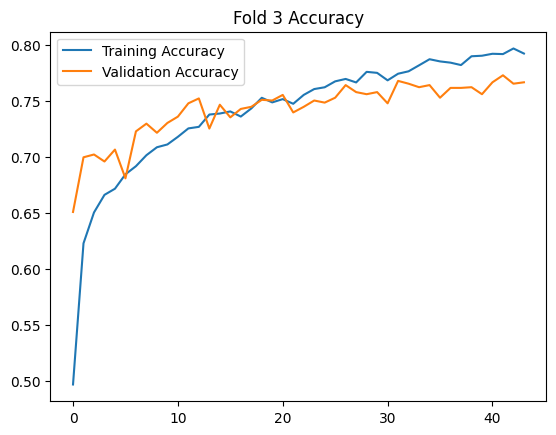

Training for fold 4...
Epoch 1/60
450/450 [==============================] - 11s 15ms/step - loss: 1.6284 - accuracy: 0.4740 - val_loss: 0.8132 - val_accuracy: 0.6829
Epoch 2/60
450/450 [==============================] - 6s 13ms/step - loss: 0.8882 - accuracy: 0.6520 - val_loss: 0.7140 - val_accuracy: 0.7142
Epoch 3/60
450/450 [==============================] - 6s 14ms/step - loss: 0.8066 - accuracy: 0.6828 - val_loss: 0.6910 - val_accuracy: 0.7136
Epoch 4/60
450/450 [==============================] - 6s 14ms/step - loss: 0.7656 - accuracy: 0.6983 - val_loss: 0.6596 - val_accuracy: 0.7361
Epoch 5/60
450/450 [==============================] - 6s 13ms/step - loss: 0.7364 - accuracy: 0.7132 - val_loss: 0.6274 - val_accuracy: 0.7480
Epoch 6/60
450/450 [==============================] - 7s 15ms/step - loss: 0.7146 - accuracy: 0.7228 - val_loss: 0.6517 - val_accuracy: 0.7430
Epoch 7/60
450/450 [==============================] - 6s 13ms/step - loss: 0.6871 - accuracy: 0.7330 - val_loss: 0.614

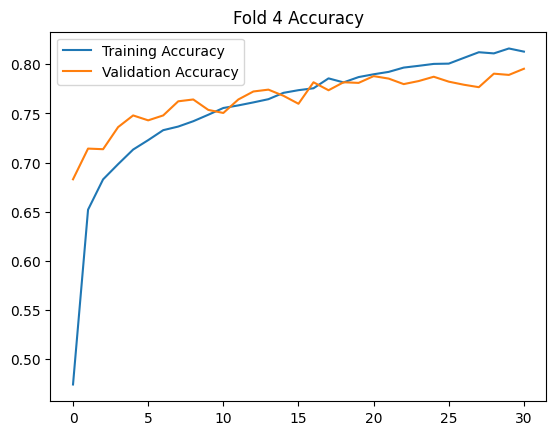

Training for fold 5...
Epoch 1/60
450/450 [==============================] - 11s 16ms/step - loss: 1.6874 - accuracy: 0.4169 - val_loss: 0.9327 - val_accuracy: 0.6304
Epoch 2/60
450/450 [==============================] - 6s 14ms/step - loss: 0.9381 - accuracy: 0.6243 - val_loss: 0.8100 - val_accuracy: 0.6773
Epoch 3/60
450/450 [==============================] - 7s 15ms/step - loss: 0.8321 - accuracy: 0.6727 - val_loss: 0.7090 - val_accuracy: 0.7111
Epoch 4/60
450/450 [==============================] - 6s 14ms/step - loss: 0.7826 - accuracy: 0.6966 - val_loss: 0.6532 - val_accuracy: 0.7286
Epoch 5/60
450/450 [==============================] - 6s 14ms/step - loss: 0.7396 - accuracy: 0.7056 - val_loss: 0.7346 - val_accuracy: 0.7048
Epoch 6/60
450/450 [==============================] - 7s 15ms/step - loss: 0.7120 - accuracy: 0.7187 - val_loss: 0.6907 - val_accuracy: 0.7317
Epoch 7/60
450/450 [==============================] - 6s 14ms/step - loss: 0.6983 - accuracy: 0.7191 - val_loss: 0.615

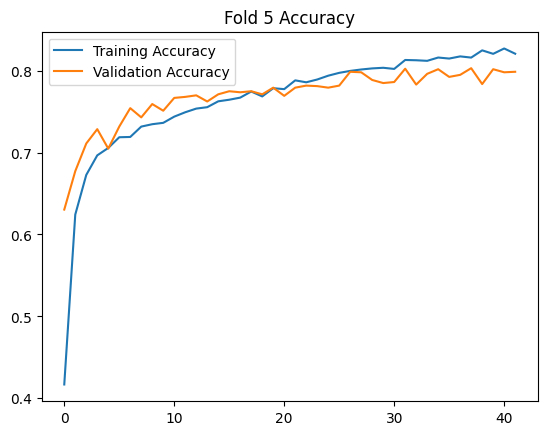

125/125 [==============================] - 1s 5ms/step
Confusion Matrix for last fold:
[[550  83   3  73  82]
 [ 54 535  24  51 126]
 [  4  41 724  22   5]
 [ 16   8  16 728   7]
 [ 73 141  11  35 584]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

# Define the function to convert landmarks
def convert_landmarks(raw_landmarks_list):
    all_landmarks = []
    valid_indices = []
    for i, each_image_landmarks in enumerate(raw_landmarks_list):
        if each_image_landmarks is not None:
            image_landmarks = np.array(each_image_landmarks).reshape(-1, 3)
            all_landmarks.append(image_landmarks)
            valid_indices.append(i)
    return np.array(all_landmarks), valid_indices

# Define the function to convert data to numpy arrays
def convert_to_numpy(processed_images, encoded_labels, raw_landmarks):
    valid_landmarks, valid_indices = convert_landmarks(raw_landmarks)
    valid_images = np.array([processed_images[i] for i in valid_indices])
    valid_labels = np.array([encoded_labels[i] for i in valid_indices])
    return valid_images, valid_labels, valid_landmarks

# Replace with your lists
processed_images_list = processed_images
encoded_labels_list = encoded_labels
raw_landmarks_list = specific_landmarks

X_images, y_labels, X_landmarks = convert_to_numpy(processed_images_list, encoded_labels_list, raw_landmarks_list)

# K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold_no = 1

for train_index, test_index in kf.split(X_images, y_labels):
    X_images_train, X_images_test = X_images[train_index], X_images[test_index]
    X_landmarks_train, X_landmarks_test = X_landmarks[train_index], X_landmarks[test_index]
    y_train, y_test = y_labels[train_index], y_labels[test_index]

    # Further split for validation
    X_images_train, X_images_val, X_landmarks_train, X_landmarks_val, y_train, y_val = train_test_split(
        X_images_train, X_landmarks_train, y_train, test_size=0.1, random_state=42)

    # Image Model
    image_input = layers.Input(shape=(X_images.shape[1], X_images.shape[2], X_images.shape[3]))
    x = layers.Conv2D(32, (3, 3), activation='relu')(image_input)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Conv2D(64, (3, 3), activation='relu')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Conv2D(128, (3, 3), activation='relu')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Flatten()(x)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    image_model = layers.Dense(128, activation='relu')(x)

    # Landmark Model
    landmark_input = layers.Input(shape=(X_landmarks.shape[1], X_landmarks.shape[2]))
    y = layers.Flatten()(landmark_input)
    y = layers.Dense(256, activation='relu')(y)
    y = layers.Dropout(0.5)(y)
    landmark_model = layers.Dense(128, activation='relu')(y)

    # Combined Model
    combined = layers.concatenate([image_model, landmark_model])
    z = layers.Dense(128, activation='relu')(combined)
    z = layers.Dropout(0.5)(z)
    output = layers.Dense(5, activation='softmax')(z)

    # Compile the model
    model = keras.Model(inputs=[image_input, landmark_input], outputs=[output])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    # Create Early Stopping callback
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    print(f'Training for fold {fold_no}...')

    # Train the model and save training history
    history = model.fit([X_images_train, X_landmarks_train], y_train,
                        validation_data=([X_images_val, X_landmarks_val], y_val),
                        epochs=60,
                        batch_size=32,
                        callbacks=[early_stopping])

     # Specify the directory path where you want to save the file
    directory_path = '/content/drive/MyDrive/Revati/EarlyStopping/history_60ep_5foldsES'


    # Save the training history for this fold using pickle

    history_filename = os.path.join(directory_path, f'history_fold_{fold_no}.pkl')
    with open(history_filename, 'wb') as file:
        pickle.dump(history.history, file)


    # Plot training and validation accuracy
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Fold {fold_no} Accuracy')
    plt.legend()
    plt.show()

    fold_no += 1

# Confusion Matrix for the last fold
y_pred = np.argmax(model.predict([X_images_test, X_landmarks_test]), axis=-1)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix for last fold:")
print(cm)






model.save(f'/content/drive/MyDrive/Revati/EarlyStopping/60epochs5folds_modelES.h5')


### Calculate Evaluation Metrics for 60 Epochs with 5 folds

In [ ]:

from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, f1_score

# Predict labels for the test set
y_pred = model.predict([X_images_test, X_landmarks_test])
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert one-hot encoding to class indices

# 1. Confusion Matrix
cm = confusion_matrix(y_test, y_pred_classes)

# 2. Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_classes, pos_label=1) # Assuming 1 is the positive label

# 3. ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_classes, pos_label=1)  # Assuming 1 is the positive label
roc_auc = auc(fpr, tpr)

# 4. F1 Score
f1 = f1_score(y_test, y_pred_classes, average='weighted')

# Print or store these metrics as needed
print(f'F1 Score for 60 epochs and 5 folds: {f1}')
print("\n Precision for 60 epochs and 5 folds",precision)
print("\n Recall for 60 epochs and 5 folds", recall)
print("\n Confusion Matrix for 60 epochs and 5 folds: \n" ,cm)


#print("Classification Report: ",classification_report(y_test, y_pred, target_names=['Anger', 'Fear', 'Happy', 'Neutral', 'Sad']))


125/125 [==============================] - 1s 4ms/step
F1 Score for 60 epochs and 5 folds: 0.779340315204698

 Precision for 60 epochs and 5 folds [0.1976977  0.22309791 0.08069049 0.1033275  0.15671642 1.        ]

 Recall for 60 epochs and 5 folds [1.         0.93164557 0.25443038 0.22405063 0.15949367 0.        ]

 Confusion Matrix for 60 epochs and 5 folds: 
 [[550  83   3  73  82]
 [ 54 535  24  51 126]
 [  4  41 724  22   5]
 [ 16   8  16 728   7]
 [ 73 141  11  35 584]]


## Plotting Confusion Matrix for 60 Epochs and 5 folds

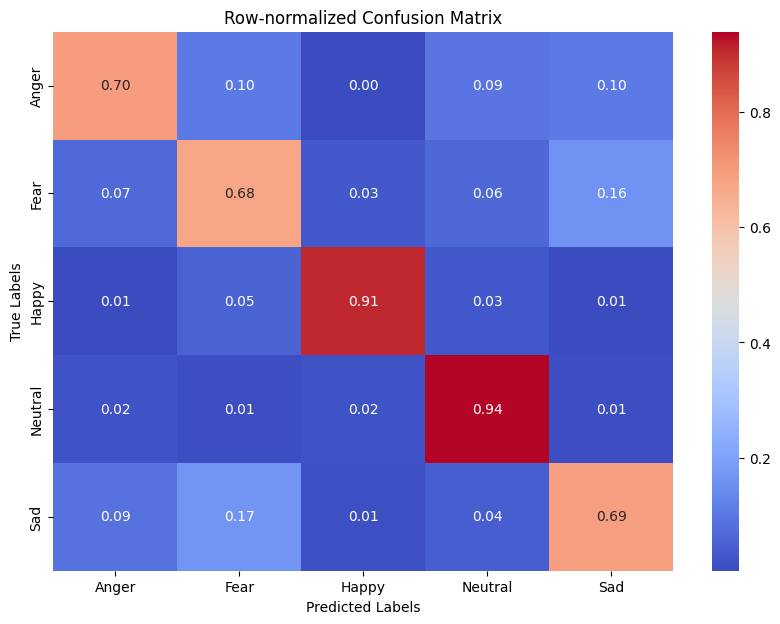

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


conf_matrix = np.array([[550,  83,   3,  73 , 82],
                        [ 54, 535,  24,  51, 126],
                        [  4,  41, 724,  22,   5],
                        [ 16,   8,  16, 728,   7],
                        [ 73, 141,  11,  35, 584]]
)

# Labels
labels = ['Anger', 'Fear', 'Happy', 'Neutral', 'Sad']

# Normalize by row
row_sums = np.sum(conf_matrix, axis=1)
normalized_by_row = conf_matrix / row_sums[:, np.newaxis]

# Plotting
plt.figure(figsize=(10, 7))

sns.heatmap(normalized_by_row, annot=True, fmt='.2f', cmap='coolwarm', xticklabels=labels, yticklabels=labels)
plt.title('Row-normalized Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.show()


### True Predictions Vs Total images for each emotion

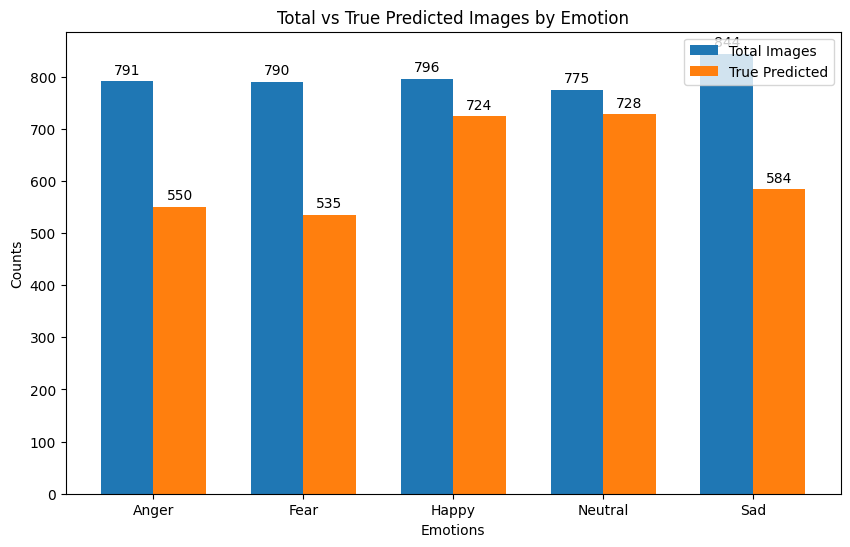

In [ ]:


# Labels
labels = ['Anger', 'Fear', 'Happy', 'Neutral', 'Sad']

# Matrix values
matrix = np.array([[550,  83,   3,  73 , 82],
                    [ 54, 535,  24,  51, 126],
                    [  4,  41, 724,  22,   5],
                    [ 16,   8,  16, 728,   7],
                    [ 73, 141,  11,  35, 584]])

# Calculate total images for each emotion
total_images_count = np.sum(matrix, axis=1)

# Calculate true predicted count for each emotion
true_predicted_count = np.diag(matrix)
plt.figure(figsize=(10, 6))
x = np.arange(len(labels))
width = 0.35

# Plotting the bars
rects1 = plt.bar(x - width/2, total_images_count, width, label='Total Images')
rects2 = plt.bar(x + width/2, true_predicted_count, width, label='True Predicted')


plt.xlabel('Emotions')
plt.ylabel('Counts')
plt.title('Total vs True Predicted Images by Emotion')
plt.xticks(x, labels)
plt.legend()


def annotate_bars(rects):
    for rect in rects:
        height = rect.get_height()
        plt.annotate('{}'.format(height),
                     xy=(rect.get_x() + rect.get_width() / 2, height),
                     xytext=(0, 3),  # 3 points vertical offset
                     textcoords="offset points",
                     ha='center', va='bottom')

annotate_bars(rects1)
annotate_bars(rects2)

plt.show()






### Plotting ROC Curve for 60 Epochs and 5 folds

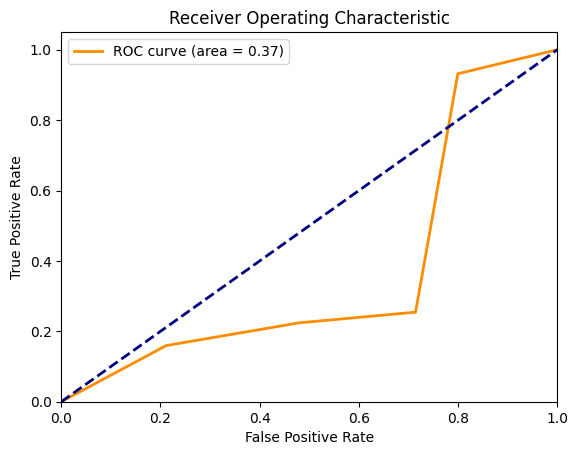

In [ ]:
# Plotting ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="best")
plt.show()

### Learning curves among each fold for 60 Epcohs and 5 folds

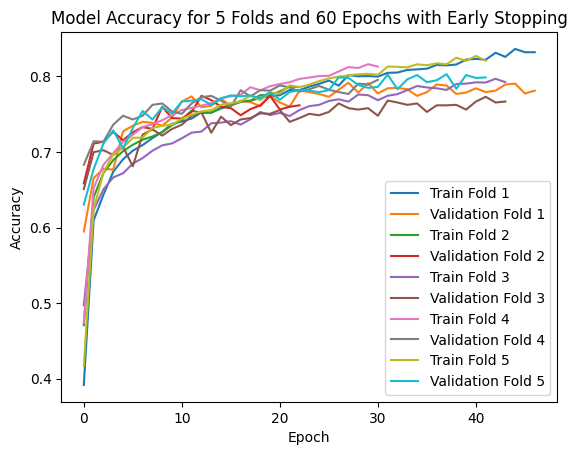

In [ ]:

import os
import pickle
import matplotlib.pyplot as plt


history_folder_path = '/content/drive/MyDrive/Revati/EarlyStopping/history_60ep_5foldsES'


history_filenames = [filename for filename in os.listdir(history_folder_path) if filename.endswith('.pkl')]

# Load the saved training histories
histories = []
for filename in history_filenames:
    history_path = os.path.join(history_folder_path, filename)
    with open(history_path, 'rb') as file:
        history = pickle.load(file)
        histories.append(history)

# Plot the training and validation accuracy for each fold
for fold_no, history in enumerate(histories, start=1):
    plt.plot(history['accuracy'], label=f'Train Fold {fold_no}')
    plt.plot(history['val_accuracy'], label=f'Validation Fold {fold_no}')

plt.title('Model Accuracy for 5 Folds and 60 Epochs with Early Stopping')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()





### Loss curves among each fold for 60 Epochs and 5 folds

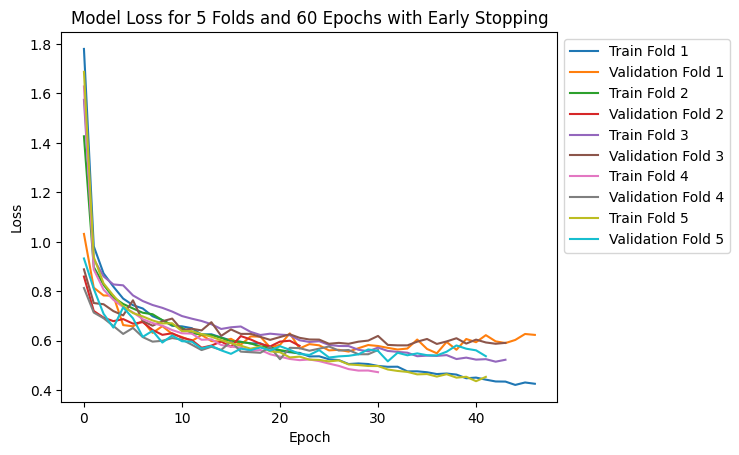

In [ ]:

history_folder_path = '/content/drive/MyDrive/Revati/EarlyStopping/history_60ep_5foldsES'


history_filenames = [filename for filename in os.listdir(history_folder_path) if filename.endswith('.pkl')]

histories = []
for filename in history_filenames:
    history_path = os.path.join(history_folder_path, filename)
    with open(history_path, 'rb') as file:
        history = pickle.load(file)
        histories.append(history)

# Plot the training and validation accuracy for each fold
for fold_no, history in enumerate(histories, start=1):
    plt.plot(history['loss'], label=f'Train Fold {fold_no}')
    plt.plot(history['val_loss'], label=f'Validation Fold {fold_no}')

plt.title('Model Loss for 5 Folds and 60 Epochs with Early Stopping')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()




### Model Training for 10 folds and 60 epochs with Early Stopping

Training for fold 1...
Epoch 1/60
506/506 [==============================] - 12s 17ms/step - loss: 1.7952 - accuracy: 0.4596 - val_loss: 0.8571 - val_accuracy: 0.6620
Epoch 2/60
506/506 [==============================] - 7s 13ms/step - loss: 0.9059 - accuracy: 0.6453 - val_loss: 0.7611 - val_accuracy: 0.6921
Epoch 3/60
506/506 [==============================] - 9s 18ms/step - loss: 0.8494 - accuracy: 0.6640 - val_loss: 0.7010 - val_accuracy: 0.7132
Epoch 4/60
506/506 [==============================] - 10s 20ms/step - loss: 0.7785 - accuracy: 0.6932 - val_loss: 0.6749 - val_accuracy: 0.7321
Epoch 5/60
506/506 [==============================] - 8s 15ms/step - loss: 0.7412 - accuracy: 0.7067 - val_loss: 0.6801 - val_accuracy: 0.7243
Epoch 6/60
506/506 [==============================] - 7s 13ms/step - loss: 0.7214 - accuracy: 0.7197 - val_loss: 0.7478 - val_accuracy: 0.6898
Epoch 7/60
506/506 [==============================] - 9s 18ms/step - loss: 0.7072 - accuracy: 0.7214 - val_loss: 0.62

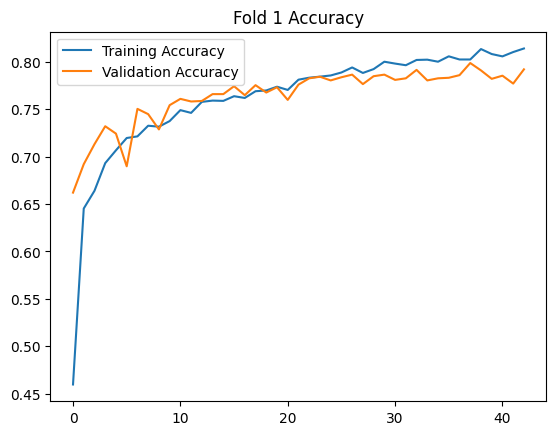

Training for fold 2...
Epoch 1/60
506/506 [==============================] - 12s 15ms/step - loss: 1.6470 - accuracy: 0.5029 - val_loss: 0.7813 - val_accuracy: 0.6832
Epoch 2/60
506/506 [==============================] - 7s 15ms/step - loss: 0.8851 - accuracy: 0.6503 - val_loss: 0.7310 - val_accuracy: 0.6854
Epoch 3/60
506/506 [==============================] - 7s 14ms/step - loss: 0.8139 - accuracy: 0.6789 - val_loss: 0.6991 - val_accuracy: 0.7276
Epoch 4/60
506/506 [==============================] - 7s 13ms/step - loss: 0.7662 - accuracy: 0.6974 - val_loss: 0.6442 - val_accuracy: 0.7576
Epoch 5/60
506/506 [==============================] - 8s 15ms/step - loss: 0.7308 - accuracy: 0.7135 - val_loss: 0.6364 - val_accuracy: 0.7432
Epoch 6/60
506/506 [==============================] - 7s 13ms/step - loss: 0.7112 - accuracy: 0.7231 - val_loss: 0.6155 - val_accuracy: 0.7476
Epoch 7/60
506/506 [==============================] - 7s 15ms/step - loss: 0.6920 - accuracy: 0.7241 - val_loss: 0.590

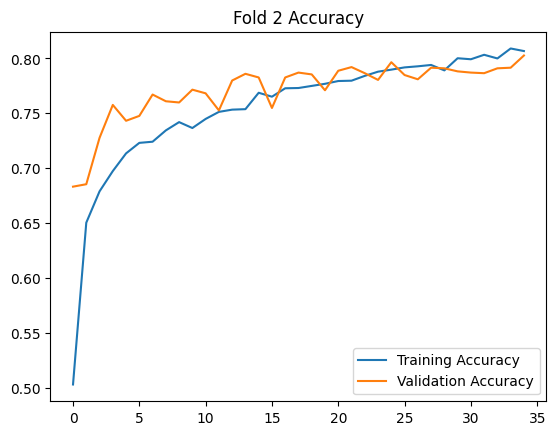

Training for fold 3...
Epoch 1/60
506/506 [==============================] - 11s 15ms/step - loss: 1.8704 - accuracy: 0.4342 - val_loss: 0.8565 - val_accuracy: 0.6648
Epoch 2/60
506/506 [==============================] - 7s 15ms/step - loss: 0.9137 - accuracy: 0.6363 - val_loss: 0.7579 - val_accuracy: 0.7043
Epoch 3/60
506/506 [==============================] - 7s 14ms/step - loss: 0.8319 - accuracy: 0.6682 - val_loss: 0.7195 - val_accuracy: 0.7260
Epoch 4/60
506/506 [==============================] - 7s 14ms/step - loss: 0.7793 - accuracy: 0.6895 - val_loss: 0.6797 - val_accuracy: 0.7349
Epoch 5/60
506/506 [==============================] - 7s 14ms/step - loss: 0.7605 - accuracy: 0.6995 - val_loss: 0.6868 - val_accuracy: 0.7226
Epoch 6/60
506/506 [==============================] - 7s 13ms/step - loss: 0.7383 - accuracy: 0.7071 - val_loss: 0.7050 - val_accuracy: 0.7154
Epoch 7/60
506/506 [==============================] - 8s 15ms/step - loss: 0.7235 - accuracy: 0.7176 - val_loss: 0.664

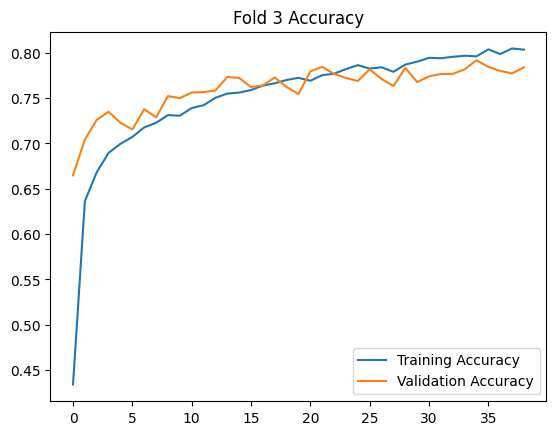

Training for fold 4...
Epoch 1/60
506/506 [==============================] - 12s 14ms/step - loss: 2.0280 - accuracy: 0.3864 - val_loss: 0.9356 - val_accuracy: 0.6559
Epoch 2/60
506/506 [==============================] - 8s 15ms/step - loss: 0.9697 - accuracy: 0.6137 - val_loss: 0.7779 - val_accuracy: 0.6998
Epoch 3/60
506/506 [==============================] - 7s 14ms/step - loss: 0.8625 - accuracy: 0.6566 - val_loss: 0.7312 - val_accuracy: 0.7093
Epoch 4/60
506/506 [==============================] - 7s 15ms/step - loss: 0.8115 - accuracy: 0.6773 - val_loss: 0.6833 - val_accuracy: 0.7237
Epoch 5/60
506/506 [==============================] - 8s 15ms/step - loss: 0.7642 - accuracy: 0.6937 - val_loss: 0.6687 - val_accuracy: 0.7349
Epoch 6/60
506/506 [==============================] - 7s 13ms/step - loss: 0.7593 - accuracy: 0.6966 - val_loss: 0.6443 - val_accuracy: 0.7504
Epoch 7/60
506/506 [==============================] - 8s 15ms/step - loss: 0.7292 - accuracy: 0.7113 - val_loss: 0.629

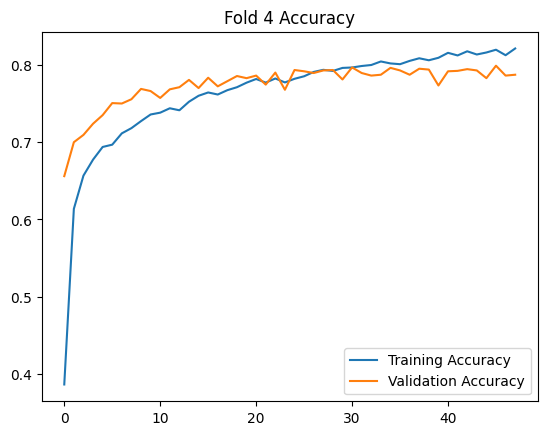

Training for fold 5...
Epoch 1/60
506/506 [==============================] - 12s 15ms/step - loss: 1.5672 - accuracy: 0.4888 - val_loss: 0.8317 - val_accuracy: 0.6676
Epoch 2/60
506/506 [==============================] - 7s 14ms/step - loss: 0.8816 - accuracy: 0.6445 - val_loss: 0.7275 - val_accuracy: 0.6971
Epoch 3/60
506/506 [==============================] - 8s 15ms/step - loss: 0.8080 - accuracy: 0.6759 - val_loss: 0.6867 - val_accuracy: 0.7054
Epoch 4/60
506/506 [==============================] - 7s 14ms/step - loss: 0.7642 - accuracy: 0.6935 - val_loss: 0.6972 - val_accuracy: 0.7343
Epoch 5/60
506/506 [==============================] - 8s 16ms/step - loss: 0.7239 - accuracy: 0.7158 - val_loss: 0.6620 - val_accuracy: 0.7254
Epoch 6/60
506/506 [==============================] - 7s 14ms/step - loss: 0.6946 - accuracy: 0.7278 - val_loss: 0.6322 - val_accuracy: 0.7510
Epoch 7/60
506/506 [==============================] - 7s 15ms/step - loss: 0.6759 - accuracy: 0.7313 - val_loss: 0.622

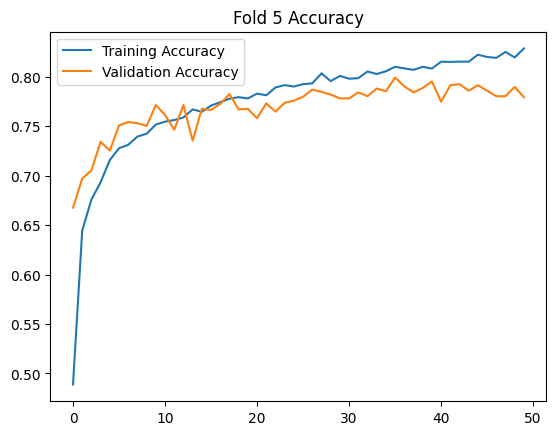

Training for fold 6...
Epoch 1/60
506/506 [==============================] - 11s 15ms/step - loss: 1.5266 - accuracy: 0.4927 - val_loss: 0.8513 - val_accuracy: 0.6681
Epoch 2/60
506/506 [==============================] - 7s 14ms/step - loss: 0.8885 - accuracy: 0.6395 - val_loss: 0.7717 - val_accuracy: 0.6859
Epoch 3/60
506/506 [==============================] - 7s 14ms/step - loss: 0.7964 - accuracy: 0.6814 - val_loss: 0.6677 - val_accuracy: 0.7271
Epoch 4/60
506/506 [==============================] - 8s 15ms/step - loss: 0.7387 - accuracy: 0.7075 - val_loss: 0.6289 - val_accuracy: 0.7410
Epoch 5/60
506/506 [==============================] - 7s 14ms/step - loss: 0.7097 - accuracy: 0.7246 - val_loss: 0.6310 - val_accuracy: 0.7504
Epoch 6/60
506/506 [==============================] - 8s 15ms/step - loss: 0.6857 - accuracy: 0.7348 - val_loss: 0.6029 - val_accuracy: 0.7621
Epoch 7/60
506/506 [==============================] - 7s 14ms/step - loss: 0.6572 - accuracy: 0.7432 - val_loss: 0.583

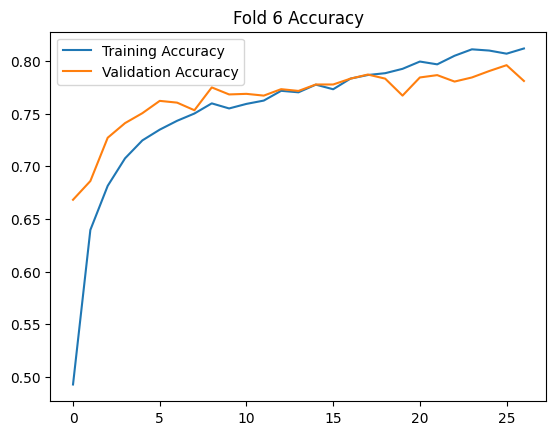

Training for fold 7...
Epoch 1/60
506/506 [==============================] - 11s 17ms/step - loss: 1.6855 - accuracy: 0.4839 - val_loss: 0.8871 - val_accuracy: 0.6415
Epoch 2/60
506/506 [==============================] - 7s 14ms/step - loss: 0.8952 - accuracy: 0.6517 - val_loss: 0.7263 - val_accuracy: 0.7115
Epoch 3/60
506/506 [==============================] - 8s 15ms/step - loss: 0.8175 - accuracy: 0.6756 - val_loss: 0.6850 - val_accuracy: 0.7243
Epoch 4/60
506/506 [==============================] - 7s 14ms/step - loss: 0.7642 - accuracy: 0.6969 - val_loss: 0.6561 - val_accuracy: 0.7482
Epoch 5/60
506/506 [==============================] - 7s 15ms/step - loss: 0.7536 - accuracy: 0.7064 - val_loss: 0.6780 - val_accuracy: 0.7354
Epoch 6/60
506/506 [==============================] - 8s 15ms/step - loss: 0.7324 - accuracy: 0.7126 - val_loss: 0.6123 - val_accuracy: 0.7538
Epoch 7/60
506/506 [==============================] - 7s 14ms/step - loss: 0.7113 - accuracy: 0.7218 - val_loss: 0.687

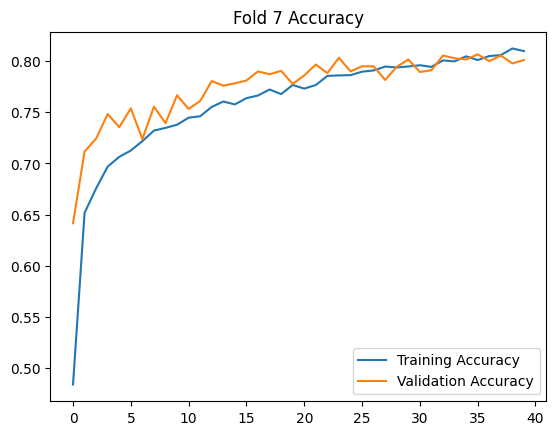

Training for fold 8...
Epoch 1/60
506/506 [==============================] - 11s 16ms/step - loss: 1.8306 - accuracy: 0.3823 - val_loss: 1.0549 - val_accuracy: 0.5570
Epoch 2/60
506/506 [==============================] - 7s 15ms/step - loss: 0.9958 - accuracy: 0.6032 - val_loss: 0.7817 - val_accuracy: 0.6887
Epoch 3/60
506/506 [==============================] - 7s 13ms/step - loss: 0.8306 - accuracy: 0.6707 - val_loss: 0.7165 - val_accuracy: 0.7104
Epoch 4/60
506/506 [==============================] - 8s 15ms/step - loss: 0.7785 - accuracy: 0.6899 - val_loss: 0.6880 - val_accuracy: 0.7232
Epoch 5/60
506/506 [==============================] - 7s 14ms/step - loss: 0.7592 - accuracy: 0.6930 - val_loss: 0.6862 - val_accuracy: 0.7265
Epoch 6/60
506/506 [==============================] - 8s 15ms/step - loss: 0.7307 - accuracy: 0.7065 - val_loss: 0.6415 - val_accuracy: 0.7476
Epoch 7/60
506/506 [==============================] - 7s 15ms/step - loss: 0.6912 - accuracy: 0.7280 - val_loss: 0.631

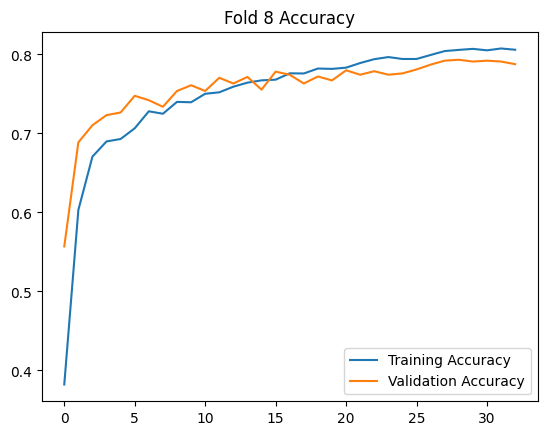

Training for fold 9...
Epoch 1/60
506/506 [==============================] - 11s 15ms/step - loss: 1.5888 - accuracy: 0.4914 - val_loss: 0.8021 - val_accuracy: 0.6765
Epoch 2/60
506/506 [==============================] - 8s 16ms/step - loss: 0.8880 - accuracy: 0.6473 - val_loss: 0.7293 - val_accuracy: 0.7026
Epoch 3/60
506/506 [==============================] - 7s 14ms/step - loss: 0.8116 - accuracy: 0.6758 - val_loss: 0.6394 - val_accuracy: 0.7521
Epoch 4/60
506/506 [==============================] - 8s 15ms/step - loss: 0.7564 - accuracy: 0.7031 - val_loss: 0.6581 - val_accuracy: 0.7449
Epoch 5/60
506/506 [==============================] - 7s 14ms/step - loss: 0.7355 - accuracy: 0.7123 - val_loss: 0.6265 - val_accuracy: 0.7426
Epoch 6/60
506/506 [==============================] - 7s 15ms/step - loss: 0.7040 - accuracy: 0.7239 - val_loss: 0.5966 - val_accuracy: 0.7588
Epoch 7/60
506/506 [==============================] - 8s 15ms/step - loss: 0.6749 - accuracy: 0.7333 - val_loss: 0.580

Training for fold 10...
Epoch 1/60
506/506 [==============================] - 13s 17ms/step - loss: 1.5255 - accuracy: 0.4974 - val_loss: 0.7864 - val_accuracy: 0.6737
Epoch 2/60
506/506 [==============================] - 7s 14ms/step - loss: 0.8898 - accuracy: 0.6485 - val_loss: 0.7234 - val_accuracy: 0.7098
Epoch 3/60
506/506 [==============================] - 8s 15ms/step - loss: 0.8113 - accuracy: 0.6801 - val_loss: 0.6987 - val_accuracy: 0.7276
Epoch 4/60
506/506 [==============================] - 7s 14ms/step - loss: 0.7667 - accuracy: 0.6948 - val_loss: 0.6460 - val_accuracy: 0.7287
Epoch 5/60
506/506 [==============================] - 8s 15ms/step - loss: 0.7370 - accuracy: 0.7093 - val_loss: 0.6274 - val_accuracy: 0.7521
Epoch 6/60
506/506 [==============================] - 7s 15ms/step - loss: 0.7143 - accuracy: 0.7179 - val_loss: 0.6500 - val_accuracy: 0.7343
Epoch 7/60
506/506 [==============================] - 8s 15ms/step - loss: 0.6983 - accuracy: 0.7272 - val_loss: 0.60

63/63 [==============================] - 1s 7ms/step
Confusion Matrix for last fold:
[[249  38   8  31  63]
 [ 14 240  18  32 104]
 [  0   7 390   5   2]
 [  5   6  20 350   1]
 [ 15  45  10  13 332]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

#  function to convert landmarks
def convert_landmarks(raw_landmarks_list):
    all_landmarks = []
    valid_indices = []
    for i, each_image_landmarks in enumerate(raw_landmarks_list):
        if each_image_landmarks is not None:
            image_landmarks = np.array(each_image_landmarks).reshape(-1, 3)
            all_landmarks.append(image_landmarks)
            valid_indices.append(i)
    return np.array(all_landmarks), valid_indices

# function to convert data to numpy arrays
def convert_to_numpy(processed_images, encoded_labels, raw_landmarks):
    valid_landmarks, valid_indices = convert_landmarks(raw_landmarks)
    valid_images = np.array([processed_images[i] for i in valid_indices])
    valid_labels = np.array([encoded_labels[i] for i in valid_indices])
    return valid_images, valid_labels, valid_landmarks


processed_images_list = processed_images
encoded_labels_list = encoded_labels
raw_landmarks_list = specific_landmarks

X_images, y_labels, X_landmarks = convert_to_numpy(processed_images_list, encoded_labels_list, raw_landmarks_list)

# K-Fold Cross Validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
fold_no = 1

for train_index, test_index in kf.split(X_images, y_labels):
    X_images_train, X_images_test = X_images[train_index], X_images[test_index]
    X_landmarks_train, X_landmarks_test = X_landmarks[train_index], X_landmarks[test_index]
    y_train, y_test = y_labels[train_index], y_labels[test_index]

    # split for validation
    X_images_train, X_images_val, X_landmarks_train, X_landmarks_val, y_train, y_val = train_test_split(
        X_images_train, X_landmarks_train, y_train, test_size=0.1, random_state=42)

    # Image Model
    image_input = layers.Input(shape=(X_images.shape[1], X_images.shape[2], X_images.shape[3]))
    x = layers.Conv2D(32, (3, 3), activation='relu')(image_input)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Conv2D(64, (3, 3), activation='relu')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Conv2D(128, (3, 3), activation='relu')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Flatten()(x)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    image_model = layers.Dense(128, activation='relu')(x)

    # Landmark Model
    landmark_input = layers.Input(shape=(X_landmarks.shape[1], X_landmarks.shape[2]))
    y = layers.Flatten()(landmark_input)
    y = layers.Dense(256, activation='relu')(y)
    y = layers.Dropout(0.5)(y)
    landmark_model = layers.Dense(128, activation='relu')(y)

    # Combined Model
    combined = layers.concatenate([image_model, landmark_model])
    z = layers.Dense(128, activation='relu')(combined)
    z = layers.Dropout(0.5)(z)
    output = layers.Dense(5, activation='softmax')(z)

    # Compile the model
    model = keras.Model(inputs=[image_input, landmark_input], outputs=[output])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    # Creating Early Stopping callback
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    print(f'Training for fold {fold_no}...')

    # Train the model and save training history
    history = model.fit([X_images_train, X_landmarks_train], y_train,
                        validation_data=([X_images_val, X_landmarks_val], y_val),
                        epochs=60,
                        batch_size=32,
                        callbacks=[early_stopping])


    directory_path = '/content/drive/MyDrive/Revati/EarlyStopping/history_60ep_10foldsES'




    history_filename = os.path.join(directory_path, f'history_fold_{fold_no}.pkl')
    with open(history_filename, 'wb') as file:
        pickle.dump(history.history, file)


    # Plot training and validation accuracy
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Fold {fold_no} Accuracy')
    plt.legend()
    plt.show()

    fold_no += 1

# Confusion Matrix for the last fold
y_pred = np.argmax(model.predict([X_images_test, X_landmarks_test]), axis=-1)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix for last fold:")
print(cm)


model.save(f'/content/drive/MyDrive/Revati/EarlyStopping/60epochs10folds_modelES.h5')


## Calculate Evaluation Metrics for 10 folds and 60 epochs

In [ ]:

from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, f1_score

# Predict labels for the test set
y_pred = model.predict([X_images_test, X_landmarks_test])
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert one-hot encoding to class indices

#  Confusion Matrix
cm = confusion_matrix(y_test, y_pred_classes)

#  Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_classes, pos_label=1) # Assuming 1 is the positive label

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_classes, pos_label=1)  # Assuming 1 is the positive label
roc_auc = auc(fpr, tpr)

#  F1 Score
f1 = f1_score(y_test, y_pred_classes, average='weighted')

# Print or store these metrics as needed
print(f'F1 Score for 60 epochs and 10 folds with Early stopping: {f1}')
print("\n Precision for 60 epochs and 10 folds with Early stopping",precision)
print("\n Recall for 60 epochs and 10 folds with Early stopping", recall)
print("\n Confusion Matrix for 60 epochs and 10 folds with Early stopping: \n" ,cm)



63/63 [==============================] - 0s 4ms/step
F1 Score for 60 epochs and 10 folds with Early stopping: 0.7765960604365897

 Precision for 60 epochs and 10 folds with Early stopping [0.2042042  0.22973761 0.11167513 0.14576635 0.20717131 1.        ]

 Recall for 60 epochs and 10 folds with Early stopping [1.         0.96568627 0.37745098 0.33333333 0.25490196 0.        ]

 Confusion Matrix for 60 epochs and 10 folds with Early stopping: 
 [[249  38   8  31  63]
 [ 14 240  18  32 104]
 [  0   7 390   5   2]
 [  5   6  20 350   1]
 [ 15  45  10  13 332]]


## Confusion Matrix for 10 Folds and 60 epochs

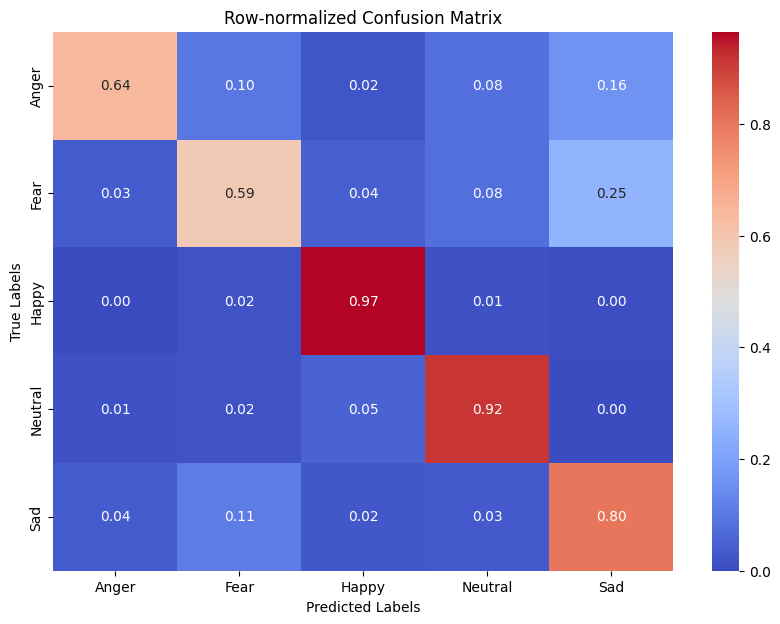

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = np.array([
[249,  38,   8,  31,  63],
 [ 14, 240,  18,  32, 104],
 [  0,   7, 390,   5,   2],
 [  5,   6,  20, 350,   1],
 [ 15,  45,  10,  13, 332]]
)

# Labels
labels = ['Anger', 'Fear', 'Happy', 'Neutral', 'Sad']

row_sums = np.sum(conf_matrix, axis=1)
normalized_by_row = conf_matrix / row_sums[:, np.newaxis]

# Plotting
plt.figure(figsize=(10, 7))

sns.heatmap(normalized_by_row, annot=True, fmt='.2f', cmap='coolwarm', xticklabels=labels, yticklabels=labels)
plt.title('Row-normalized Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.show()


### True Predictions VS Total images for each emotion

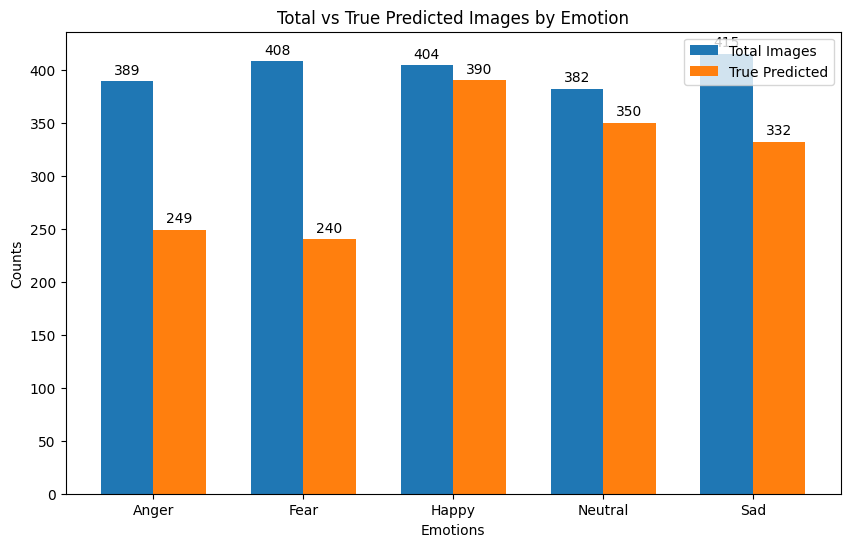

In [ ]:

import matplotlib.pyplot as plt
import numpy as np

# Labels
labels = ['Anger', 'Fear', 'Happy', 'Neutral', 'Sad']


matrix = np.array([
                    [249,  38,   8,  31,  63],
                    [ 14, 240,  18,  32, 104],
                    [  0,   7, 390,   5,   2],
                    [  5,   6,  20, 350,   1],
                    [ 15,  45,  10,  13, 332]])


total_images_count = np.sum(matrix, axis=1)

true_predicted_count = np.diag(matrix)
plt.figure(figsize=(10, 6))

x = np.arange(len(labels))

width = 0.35   #width of the bars

# Plotting the bars
rects1 = plt.bar(x - width/2, total_images_count, width, label='Total Images')
rects2 = plt.bar(x + width/2, true_predicted_count, width, label='True Predicted')


plt.xlabel('Emotions')
plt.ylabel('Counts')
plt.title('Total vs True Predicted Images by Emotion')
plt.xticks(x, labels)
plt.legend()


def annotate_bars(rects):
    for rect in rects:
        height = rect.get_height()
        plt.annotate('{}'.format(height),
                     xy=(rect.get_x() + rect.get_width() / 2, height),
                     xytext=(0, 3),  # 3 points vertical offset
                     textcoords="offset points",
                     ha='center', va='bottom')

annotate_bars(rects1)
annotate_bars(rects2)

plt.show()






### ROC curve for 10 Folds and 60 epochs

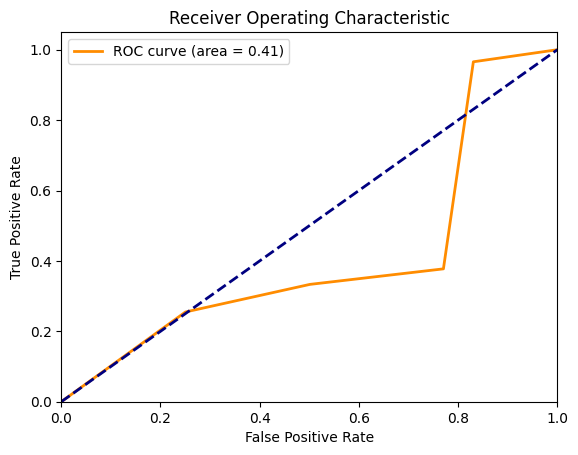

In [ ]:
# Plotting ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="best")
plt.show()

### Learning Curves among 10 folds

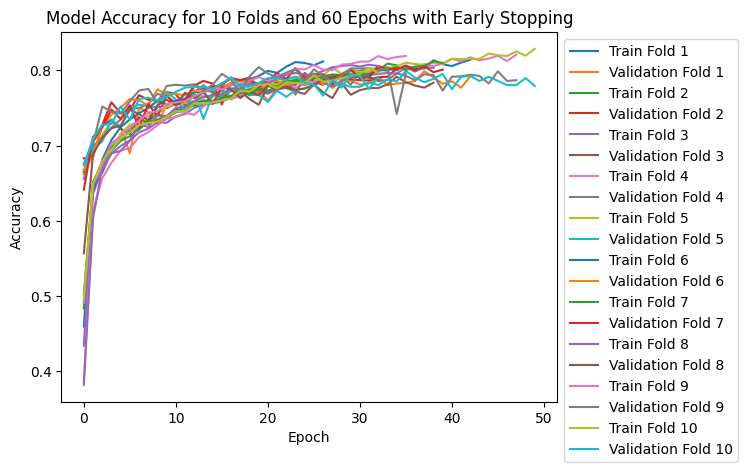

In [ ]:


history_folder_path = '/content/drive/MyDrive/Revati/EarlyStopping/history_60ep_10foldsES'

history_filenames = [filename for filename in os.listdir(history_folder_path) if filename.endswith('.pkl')]


histories = []
for filename in history_filenames:
    history_path = os.path.join(history_folder_path, filename)
    with open(history_path, 'rb') as file:
        history = pickle.load(file)
        histories.append(history)

for fold_no, history in enumerate(histories, start=1):
    plt.plot(history['accuracy'], label=f'Train Fold {fold_no}')
    plt.plot(history['val_accuracy'], label=f'Validation Fold {fold_no}')

plt.title('Model Accuracy for 10 Folds and 60 Epochs with Early Stopping')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()





### Loss Curves among 10 folds

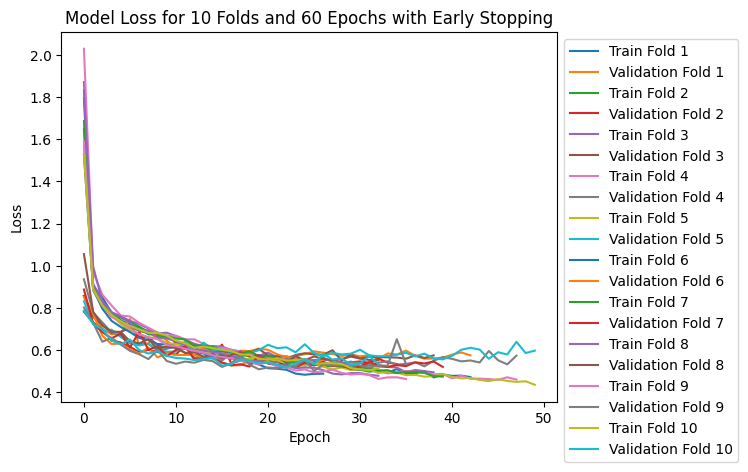

In [ ]:


history_folder_path = '/content/drive/MyDrive/Revati/EarlyStopping/history_60ep_10foldsES'


history_filenames = [filename for filename in os.listdir(history_folder_path) if filename.endswith('.pkl')]


histories = []
for filename in history_filenames:
    history_path = os.path.join(history_folder_path, filename)
    with open(history_path, 'rb') as file:
        history = pickle.load(file)
        histories.append(history)

for fold_no, history in enumerate(histories, start=1):
    plt.plot(history['loss'], label=f'Train Fold {fold_no}')
    plt.plot(history['val_loss'], label=f'Validation Fold {fold_no}')

plt.title('Model Loss for 10 Folds and 60 Epochs with Early Stopping')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()




## Testing on Seen Data

In [ ]:
# Load the model
#loaded_model = tf.keras.models.load_model("/content/drive/MyDrive/Dissertation/zips/models_specific/30epochs5folds_specific/30epochs5folds_specific.h5")




# Landmarks of interest indices
landmark_indices_of_interest = [0, 1, 2, 13, 14, 15, 16, 17, 18]

def predict_single_image(image_path, model, label_encoder):
    image = cv2.imread(image_path)
    image = cv2.resize(image, (93, 113))

    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    mp_face_mesh = mp.solutions.face_mesh.FaceMesh(static_image_mode=True, max_num_faces=1)


    results = mp_face_mesh.process(image_rgb)


    if results.multi_face_landmarks:
        face_landmark = results.multi_face_landmarks[0]
        landmark_values = []
        for index in landmark_indices_of_interest:
            landmark = face_landmark.landmark[index]
            landmark_values.extend([landmark.x, landmark.y, landmark.z])
        landmarks = np.array([landmark_values]).reshape(-1, 9, 3)  # or reshape
    else:
        print("No face detected!")
        return None


    image = np.expand_dims(image, axis=0)

    pred = model.predict([image, landmarks])


    pred_label = np.argmax(pred, axis=1)
    decoded_label = label_encoder.inverse_transform(pred_label)[0]


    confidence = np.max(pred) * 100

    return decoded_label, confidence

if __name__ == "__main__":

    model = keras.models.load_model("/content/drive/MyDrive/Dissertation/zips/latest_model_diff_folds/Revati/EarlyStopping/60epochs10folds_modelES.h5")
    label_encoder = label_encoder

    image_path = "/content/drive/MyDrive/Dissertation/zips/final_process2/ANG/frame_1060.jpg"

    predicted_label, confidence = predict_single_image(image_path, model, label_encoder)
    print(f"Predicted Label: {predicted_label}, Confidence: {confidence}%")



1/1 [==============================] - 1s 597ms/step
Predicted Label: ANG, Confidence: 92.14479923248291%


## Testing on Unseen Data

In [ ]:
# Load the model
#loaded_model = tf.keras.models.load_model("/content/drive/MyDrive/Dissertation/zips/models_specific/30epochs5folds_specific/30epochs5folds_specific.h5")

# Landmarks of interest indices
landmark_indices_of_interest = [0, 1, 2, 13, 14, 15, 16, 17, 18]

def predict_single_image(image_path, model, label_encoder):

    image = cv2.imread(image_path)
    image = cv2.resize(image, (93, 113))

    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    mp_face_mesh = mp.solutions.face_mesh.FaceMesh(static_image_mode=True, max_num_faces=1)

    results = mp_face_mesh.process(image_rgb)
    if results.multi_face_landmarks:
        face_landmark = results.multi_face_landmarks[0]
        landmark_values = []
        for index in landmark_indices_of_interest:
            landmark = face_landmark.landmark[index]
            landmark_values.extend([landmark.x, landmark.y, landmark.z])
        landmarks = np.array([landmark_values]).reshape(-1, 9, 3)  #  reshape
    else:
        print("No face detected!")
        return None

    image = np.expand_dims(image, axis=0)
    pred = model.predict([image, landmarks])

    pred_label = np.argmax(pred, axis=1)
    decoded_label = label_encoder.inverse_transform(pred_label)[0]

    confidence = np.max(pred) * 100

    return decoded_label, confidence


if __name__ == "__main__":

    model = keras.models.load_model("/content/drive/MyDrive/Dissertation/zips/latest_model_diff_folds/Revati/EarlyStopping/60epochs10folds_modelES.h5")
    label_encoder = label_encoder

    image_path = "/content/drive/MyDrive/Dissertation/zips/latest_model_diff_folds/Testing_unseen_crema/neu_frame70.jpg"

    predicted_label, confidence = predict_single_image(image_path, model, label_encoder)
    print(f"Predicted Label: {predicted_label}, Confidence: {confidence}%")


1/1 [==============================] - 1s 561ms/step
Predicted Label: ANG, Confidence: 55.008888244628906%


L2 reg

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
def convert_landmarks(raw_landmarks_list):

    all_landmarks = []
    valid_indices = []
    for i, each_image_landmarks in enumerate(raw_landmarks_list):
        if each_image_landmarks is not None:
            image_landmarks = np.array(each_image_landmarks).reshape(-1, 3)  # Reshape
            all_landmarks.append(image_landmarks)
            valid_indices.append(i)
    return np.array(all_landmarks), valid_indices

def convert_to_numpy(processed_images, encoded_labels, raw_landmarks):
    valid_landmarks, valid_indices = convert_landmarks(raw_landmarks)
    valid_images = np.array([processed_images[i] for i in valid_indices])
    valid_labels = np.array([encoded_labels[i] for i in valid_indices])
    return valid_images, valid_labels, valid_landmarks


processed_images_list = processed_images
encoded_labels_list = encoded_labels
raw_landmarks_list = specific_landmarks

X_images, y_labels, X_landmarks = convert_to_numpy(processed_images_list, encoded_labels_list, raw_landmarks_list)

# K-Fold Cross Validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
fold_no = 1

for train_index, test_index in kf.split(X_images, y_labels):
    X_images_train, X_images_test = X_images[train_index], X_images[test_index]
    X_landmarks_train, X_landmarks_test = X_landmarks[train_index], X_landmarks[test_index]
    y_train, y_test = y_labels[train_index], y_labels[test_index]

    # Further split for validation
    X_images_train, X_images_val, X_landmarks_train, X_landmarks_val, y_train, y_val = train_test_split(
        X_images_train, X_landmarks_train, y_train, test_size=0.1, random_state=42)

    # Image Model
    image_input = layers.Input(shape=(X_images.shape[1], X_images.shape[2], X_images.shape[3]))
    x = layers.Conv2D(32, (3, 3), activation='relu')(image_input)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Conv2D(64, (3, 3), activation='relu')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Conv2D(128, (3, 3), activation='relu')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Flatten()(x)
    x = layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
    x = layers.Dropout(0.6)(x)
    image_model = layers.Dense(128, activation='relu')(x)

    # Landmark Model
    landmark_input = layers.Input(shape=(X_landmarks.shape[1], X_landmarks.shape[2]))
    y = layers.Flatten()(landmark_input)
    y = layers.Dense(256, activation='relu')(y)
    y = layers.Dropout(0.5)(y)
    landmark_model = layers.Dense(128, activation='relu')(y)

    # Combined Model
    combined = layers.concatenate([image_model, landmark_model])
    z = layers.Dense(128, activation='relu')(combined)
    z = layers.Dropout(0.5)(z)
    output = layers.Dense(5, activation='softmax')(z)

    # Compile the model
    model = keras.Model(inputs=[image_input, landmark_input], outputs=[output])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    # Early Stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    print(f'Training for fold {fold_no}...')
    history = model.fit([X_images_train, X_landmarks_train], y_train,
                        validation_data=([X_images_val, X_landmarks_val], y_val),
                        epochs=60,
                        batch_size=32,
                        callbacks=[early_stopping])

    # Save the training history for this fold
    directory_path = '/content/drive/MyDrive/Dissertation/zips/latest_model_diff_folds/030923/history_60ep_10foldsES_L2reg'
    history_filename = os.path.join(directory_path, f'history_fold_{fold_no}.pkl')
    with open(history_filename, 'wb') as file:
        pickle.dump(history.history, file)

    # Plot training and validation accuracy
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Fold {fold_no} Accuracy')
    plt.legend()
    plt.show()

    fold_no += 1

# Confusion Matrix for the last fold
y_pred = np.argmax(model.predict([X_images_test, X_landmarks_test]), axis=-1)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix for last fold:")
print(cm)

# Save the model
model.save(f'/content/drive/MyDrive/Dissertation/zips/latest_model_diff_folds/030923/60epochs10folds_modelES_L2reg.h5')



Training for fold 1...
Epoch 1/60
506/506 [==============================] - 20s 15ms/step - loss: 2.3744 - accuracy: 0.3873 - val_loss: 1.3143 - val_accuracy: 0.5681
Epoch 2/60
506/506 [==============================] - 7s 14ms/step - loss: 1.3085 - accuracy: 0.5686 - val_loss: 1.0215 - val_accuracy: 0.6926
Epoch 3/60
506/506 [==============================] - 6s 13ms/step - loss: 1.1158 - accuracy: 0.6458 - val_loss: 0.9382 - val_accuracy: 0.6870
Epoch 4/60
506/506 [==============================] - 7s 15ms/step - loss: 1.0112 - accuracy: 0.6696 - val_loss: 0.8822 - val_accuracy: 0.7148
Epoch 5/60
506/506 [==============================] - 7s 14ms/step - loss: 0.9611 - accuracy: 0.6820 - val_loss: 0.8392 - val_accuracy: 0.7182
Epoch 6/60
506/506 [==============================] - 7s 13ms/step - loss: 0.9210 - accuracy: 0.6922 - val_loss: 0.8758 - val_accuracy: 0.7065
Epoch 7/60
506/506 [==============================] - 7s 14ms/step - loss: 0.8900 - accuracy: 0.6948 - val_loss: 0.810

FileNotFoundError: ignored